In [20]:
%load_ext autoreload
%autoreload 2
import numpy as np
from astropy import units as u
import emcee
from matplotlib import pyplot as plt
import corner

from load_galweight_data import load_clusters
from cluster import temp_from_vdisp
from statistics_functions import log_likelihood, chi_squared

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# get dataset
clusters, variances = load_clusters(nrows=20)

In [3]:
T_data = [c.baryon_temp for c in clusters]

In [92]:
ndim, nwalkers = 2, 10
log_sigma0 = np.random.uniform(low=-40, high=-10, size=(nwalkers, 1)).astype(dtype=np.float128)
log_mchi = np.random.uniform(low=-10, high=0, size=(nwalkers, 1)).astype(dtype=np.float128)

p0=np.zeros((nwalkers, ndim ))
p0[:,0] = log_sigma0.reshape((nwalkers,))
p0[:,1]= log_mchi.reshape((nwalkers,))
p0

array([[-25.7928786 ,  -8.26203761],
       [-30.95890079,  -5.78874991],
       [-10.67883756,  -9.38643993],
       [-10.55060411,  -5.6167522 ],
       [-36.03487036,  -1.05386851],
       [-21.66007477,  -5.31118725],
       [-29.35855489,  -0.82764662],
       [-31.90887561,  -2.35052976],
       [-23.16911428,  -1.27644263],
       [-28.92363077,  -0.12963958]])

In [93]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_likelihood, args=[T_data, variances, clusters])

In [95]:
state = sampler.run_mcmc(p0, 100, progress=True)
sampler.reset()

[-25.7928786   -8.26203761]
[-30.95890079  -5.78874991]
[-10.67883756  -9.38643993]


[-10.55060411  -5.6167522 ]
[-36.03487036  -1.05386851]
[-21.66007477  -5.31118725]
[-29.35855489  -0.82764662]
[-31.90887561  -2.35052976]
[-23.16911428  -1.27644263]
[-28.92363077  -0.12963958]
[-34.22684515  -2.63540038]
[-30.65330976  -6.89476789]
[-15.17969195  -4.23427305]
[-21.43194316  -5.47392776]
[-21.73926467  -1.10071895]
[-40.75249184  -7.14912388]
[-35.58276264  -7.65430438]
[-25.39684065  -0.69340694]
[-22.5982809   -0.69036084]
[-19.71582514  -5.01420435]
[-36.00240508  -1.05397491]
[-21.60429025  -5.58411573]
[-35.89736602  -3.36548415]
[-38.85654073  -1.4266635 ]
[-19.02056852  -7.19411174]
[-36.51653042  -3.52304342]
[-18.27093997  -1.56951724]
[-24.04381556  -6.70583773]
[-19.83268531  -5.034297  ]
[-24.64808985  -0.50287172]
[-19.49598972  -5.70347625]
[-26.36109465  -3.08824633]
[-22.94351756  -8.18863519]
[-34.64256563  -6.39713685]
[-34.26780978  -0.82747416]
[-26.76211363  -5.15952111]
[-36.76823454  -5.8685533 ]
[-20.80868685  -4.69746689]
[-20.91193678  -2.06

[-48.69728615  -3.37298633]
[-19.73682239  -2.79274656]
[-19.7577553   -4.98365946]
[-21.11701993  -8.94756668]
[-19.81136037  -4.60859658]
[-19.75180413  -5.50402288]
[-19.7151604   -3.88436631]
[-19.3165651  -1.8885779]
[-19.83901223  -2.65961812]
[-18.15453794  -0.99709408]
[-55.93227032  -5.17798136]
[-19.75546492  -5.18392766]
[-19.79369463  -4.00788836]
[-33.4899988  -5.4118057]
[-19.71006304  -3.87634895]
[-19.11896733  -1.92010175]
[-19.69506468  -5.14490253]
[-19.32981951  -2.11437144]
[-19.71338713  -3.80598763]
[-19.94473592  -3.53487635]
[-19.75728249  -5.02500141]
[-21.54507144  -5.14686139]
[-21.717398    -7.67499281]
[-19.73505968  -6.1020569 ]
[-45.76350638  -5.17250479]
[-19.41749207  -1.37410601]
[-19.80140539  -2.58903665]
[-18.48281783  -1.9097192 ]
[-19.76521759  -5.02495615]
[-19.74987496  -3.93896688]
[-19.68018224  -5.31646856]
[-19.81891484  -1.62236375]
[-106.85985315   -4.91931297]
[-19.75878211  -2.50894817]
[-19.7580472   -4.95813634]
[-20.38041506  -5.1263

[-19.20741943  -0.44757761]
[-19.76121687  -2.83683458]
[-19.45602066  -5.02046684]
[-19.76318187  -8.03101645]
[-400.18097898   -4.28757426]
[-19.17876609  -6.01994559]
[-19.78257208  -2.92622495]
[-19.78069156  -9.54535213]
[-19.75432948  -8.44759601]
[-604.9788336    -5.45692127]
[-19.73777522  -4.90809662]
[-19.35801957  -0.90805658]
[-19.75286048  -9.64430999]
[-317.28570362   -6.9186007 ]
[-19.75287547  -5.71587369]
[-18.78377829  -4.39393265]
[-18.82291932  -2.70350626]
[-19.76086442  -6.10299493]
[-20.29275318  -9.64981481]
[-847.57804568   -6.84210502]
[-19.76077137  -9.33182458]
[-19.73270404  -4.23379531]
[-19.34512905  -2.66242882]
[-19.98019106  -3.13420774]
[-19.7582225  -1.1299627]
[-19.76650819  -7.85081034]
[-19.78147545  -9.8417749 ]
[-700.13923012   -5.66974668]
[-19.77016562  -9.39107287]
[-19.72872678  -5.70760036]
[-19.47920238  -1.84020772]
[-21.26349367  -4.8769691 ]
[-19.76138591  -7.62960035]
[-19.71743271  -7.66302744]
[-19.73987542  -5.1501771 ]
[-19.7588878

In [96]:
n_steps=10000
sampler.run_mcmc(state, n_steps, progress=True)

[-19.75476216  -7.6182282 ]
[-18.07009133  -1.54035397]
[-19.75585556  -7.65455655]
[-19.75310457  -2.51758076]
[-19.27790897  -6.81955295]
[-19.18341424  -0.71035139]
[-19.75948674  -4.33503131]
[-19.75369595  -2.96574978]
[-19.42002753  -4.13767954]
[-17.95365056  -0.8940209 ]
[-19.75451889  -7.9267296 ]
[-5.81121066e+03 -1.03852236e+00]
[-19.75999696  -8.8191539 ]
[-19.50226584  -4.43121853]
[-19.75695288  -6.09585791]
[-19.55829765  -2.0963988 ]
[-19.75863866  -7.60398939]
[-19.9614847   -9.79011392]
[-19.75741779  -6.22640735]
[-19.75187475  -8.39804475]
[-4.32410409e+03 -1.53338791e+00]
[-19.32476256  -4.80999555]
[-19.31730766  -2.27283259]
[-19.75959616  -4.23500234]
[-3.29366138e+03 -1.22734828e+00]
[-19.81771734  -3.25058883]
[-19.75959131  -8.09300183]
[-19.75810253  -5.57466226]
[-19.75892533  -7.87300153]
[-19.44594368  -4.0969422 ]
[-19.75743298  -6.23945237]
[-19.75021307  -8.46373287]
[-19.75426111  -3.49609963]
[-1648.07940485    -4.04586018]
[-19.75999229  -2.08676957

[-19.75101863  -2.5499685 ]
[-19.75191387  -8.27929925]
[-19.35268759  -1.19672106]
[-17.84084107  -1.1275888 ]
[-19.75494498  -5.31041828]
[-19.75801455  -4.11045412]
[-19.75442018  -4.06483051]
[-19.89491187  -3.64846571]
[-19.75710208  -4.4671592 ]
[-4.91398032e+04 -6.02520799e+00]
[-19.74502296  -1.07672648]
[-19.75798615  -3.02933648]
[-19.75133893  -7.50642379]
[-19.75746642  -6.02212567]
[-19.82496404  -0.34702018]
[-19.75630252  -4.77972787]
[-19.76864279  -6.24174935]
[-19.75528063  -3.55107127]
[-3.03813951e+03 -3.99079599e-01]
[-5.47581604e+04 -5.85578635e+00]
[-19.75047639  -2.59881648]
[-19.75711177  -7.25901489]
[-18.95050149  -3.09251408]
[-19.21151012  -0.67662659]
[-19.7569753   -4.51672025]
[-19.75727034  -4.40138228]
[-4.18009008e+04 -5.31023170e+00]
[-19.75024515  -8.10727644]
[-19.75920479  -1.76238542]
[-20.83021768  -2.8578743 ]
[-19.75485369  -3.03774754]
[-19.90651877  -0.35806824]
[-9.06784057e+03 -3.52328488e+00]
[-19.75673531  -5.42690907]
[-3.50274589e+04 -

[-2.83613278e+04 -3.84440942e+00]
[-19.73501738  -1.19385299]
[-19.75925512  -7.57716481]
[-20.0714152   -8.44196991]
[-19.75611544  -2.7346244 ]
[-1.02882427e+05 -9.54775142e+00]
[-19.76130868  -4.19258693]
[-19.75643828  -2.72691993]
[-19.7579905  -7.4520455]
[-3.44262596e+04 -4.48373639e+00]
[-18.56973694  -2.01089289]
[-19.76587458  -1.3751893 ]
[-19.76161964  -4.81309835]
[-19.75898023  -7.77615265]
[-3.92511515e+04 -3.86170659e+00]
[-19.76057425  -2.62821772]
[-19.74808759  -3.68052215]
[-19.76225666  -6.08427194]
[-19.75708265  -4.00687654]
[-18.386568   -1.6755219]
[-19.75799692  -7.47159491]
[-7.42820119e+04 -8.05877651e+00]
[-19.74019337  -0.68534724]
[-19.6003014   -4.44707697]
[-19.76342466  -2.09753787]
[-19.75953401  -7.94767358]
[-20.40153932  -0.58586709]
[-21.09269633  -4.31537467]
[-19.75970539  -0.84338715]
[-19.74988382  -4.32794728]
[-19.76159844  -4.7707965 ]
[-8.56163585e+04 -8.38626933e+00]
[-19.75832919  -9.80173848]
[-19.50616172  -3.49542516]
[-19.75323309  -

[-19.75393619  -2.04427641]
[-19.73219411  -0.89784274]
[-17.86728603  -0.64537855]
[-19.75353651  -7.21555561]
[-19.75785579  -8.39009323]
[-19.75004382  -5.1303217 ]
[-19.60078352  -0.43370911]
[-19.75303115  -8.67661794]
[-6.20185642e+05 -3.09573073e+00]
[-19.76040278  -7.54401084]
[-19.75452293  -4.36371074]
[-19.89036913  -4.02875605]
[-17.723933    -0.93072723]
[-4.19495963e+05 -2.60779328e+00]
[-19.75976534  -5.53754011]
[-19.75356799  -1.28775649]
[-19.61726156  -6.65001906]
[-19.75728911  -9.23661731]
[-19.73603776  -1.77760924]
[-19.75421868  -5.24333116]
[-19.76407794  -4.5956056 ]
[-19.60527483  -6.83318233]
[-19.75289261  -3.03765157]
[-19.65411516  -1.74243595]
[-4.81971484e+05 -2.54377148e+00]
[-19.31320347  -4.45480397]
[-19.76944517  -4.03646754]
[-19.38806339  -1.28210156]
[-19.75346381  -5.5059657 ]
[-5.88886750e+05 -2.71373546e+00]
[-19.76448936  -3.33548859]
[-19.75258249  -3.33285684]
[-20.29020635  -6.14243021]
[-2.36712355e+05 -2.15388124e+00]
[-19.30147039  -0.

[-19.76540665  -9.93700761]
[-19.72886147  -0.29173967]
[-19.75889251  -5.7063816 ]
[-19.75530998  -4.01985776]
[-18.99346131  -1.11468057]
[-1.89662755e+06 -2.80889530e+00]
[-19.75177363  -6.88589133]
[-18.9841517   -0.02910869]
[-18.16946046  -0.63756597]
[-19.76788663  -6.44191148]
[-1.49496125e+06 -3.91555788e+00]
[-19.75776739  -5.04267087]
[-19.17507478  -0.43737514]
[-19.51035214  -1.38715813]
[-19.75060167  -7.24629603]
[-19.74714208  -2.09939762]
[-18.1458603   -0.15455658]
[-19.51013569  -4.95735677]
[-1.34863939e+06 -2.58998720e+00]
[-19.72987452  -1.66937346]
[-19.75106581  -7.75940471]
[-18.42629834  -0.70550962]
[-19.762137    -7.66010617]
[-18.68979956  -5.21129526]
[-19.7338792   -4.98990763]
[-19.7596313   -2.19198092]
[-19.7581614   -4.88294513]
[-21.23962286  -3.38079944]
[-18.53406946  -0.22904132]
[-19.76181612  -7.66298425]
[-19.75572934  -7.76630528]
[-1.47408284e+06 -2.11811641e+00]
[-19.73359982  -1.73479954]
[-19.75100037  -8.43598448]
[-19.75940589  -8.768364

[-2.23644642e+08 -7.34188394e+00]
[-19.74392928  -3.08334769]
[-19.75716156  -7.48469895]
[-19.73538937  -1.86358536]
[-21.17395488  -7.78057962]
[-19.70339814  -1.81903188]
[-8.93049889e+07 -3.13813984e+00]
[-19.74572742  -4.16183096]
[-19.33175527  -3.3913505 ]
[-5.26537737e+07 -1.75012910e+00]
[-19.76008816  -6.8735055 ]
[-1.85062028e+08 -7.26108046e+00]
[-19.66290354  -0.67892305]
[-19.54624647  -6.79177936]
[-20.02676498  -2.29508077]
[-1.25448712e+08 -5.37046018e+00]
[-19.74808133  -3.57536993]
[-19.80064506  -0.47205605]
[-19.45117871  -5.20643191]
[-19.72709998  -1.37374363]
[-5.13952976e+07 -3.21213371e+00]
[-19.77110261  -9.89904706]
[-19.69994204  -1.22243144]
[-19.76114112  -6.24091067]
[-19.74403184  -8.15885047]
[-21.62695427  -2.51514341]
[-19.65459135  -1.59836976]
[-19.73424128  -1.83138173]
[-19.74304445  -6.17483835]
[-19.94832506  -1.59272593]
[-19.75204704  -2.23670013]
[-3.50171394e+08 -8.17125964e+00]
[-19.69516994  -1.17210671]
[-19.72730663  -1.38089221]
[-19.2

[-2.76133880e+07 -1.67833155e+00]
[-19.73617324  -1.37233623]
[-1.81675427e+08 -2.88189316e+00]
[-19.05353916  -0.69056164]
[-19.77274352  -4.15736858]
[-19.24067196  -1.94411064]
[-19.7281712   -1.87289859]
[-3.81624939e+08 -4.68262212e+00]
[-19.56764709  -0.72296501]
[-19.71195719  -0.55181495]
[-19.36474917  -0.71531188]
[-19.73952256  -5.53116347]
[-19.70088026  -1.39589545]
[-2.47829545e+07 -3.30024542e+00]
[-19.69292931  -1.59574182]
[-6.33347368e+08 -1.56275595e+00]
[-20.15003558  -2.04587882]
[-19.69750336  -1.16246608]
[-18.57915915  -0.92695393]
[-2.91304536e+08 -2.44924785e+00]
[-19.23561681  -0.50977107]
[-19.49923143  -0.87905903]
[-19.71341339  -1.39853207]
[-1.14029048e+09 -1.81225510e+00]
[-19.61328658  -1.14905726]
[-20.15177752  -2.95811887]
[-1.12938881e+09 -1.79821428e+00]
[-19.64201826  -1.04460514]
[-21.76799417  -2.66335932]
[-20.12301072  -2.00072461]
[-19.76052091  -3.33997271]
[-19.73425518  -5.7995577 ]
[-18.99197185  -0.11093991]
[-19.69689687  -1.25026622]


[-19.79527304  -9.81926655]
[-1.88713687e+10 -7.00774140e+00]
[-19.45906608  -0.61867337]
[-18.72016902  -0.24287487]
[-18.02544871  -0.78653083]
[-19.59345544  -2.11194582]
[-7.31243655e+09 -4.69727478e+00]
[-19.65155838  -1.14151654]
[-19.55033191  -0.70392278]
[-19.9498588   -2.47263689]
[-19.42195552  -0.22618128]
[-19.38278608  -0.49903627]
[-19.05606253  -0.65588952]
[-19.61859183  -0.99900485]
[-7.17401441e+09 -2.97334245e+00]
[-19.09189749  -0.75908096]
[-19.7348995   -3.41323746]
[-19.54333977  -0.71325945]
[-19.77498822  -3.7925767 ]
[-17.51277797  -0.03451667]
[-2.23974806e+10 -8.30194532e+00]
[-19.7510474   -0.83881212]
[-19.75878036  -5.42885786]
[-19.59949886  -0.92650546]
[-20.23793718  -2.38744587]
[-19.7564072   -8.94797277]
[-19.53222581  -0.69652224]
[-19.38534953  -0.50238043]
[-17.55008058  -0.0732571 ]
[-2.57286775e+10 -9.43310654e+00]
[-18.90351185  -0.43238858]
[-19.70502618  -1.13550344]
[-19.52537607  -0.69543915]
[-21.34687797  -1.28961261]
[-19.41443094  -1.

[-19.35339996  -0.51236759]
[-20.07641037  -4.32350482]
[-20.64276252  -0.92510126]
[-2.98322526e+10 -5.63937340e+00]
[-18.83649251  -0.12584943]
[-19.14716742  -0.99859761]
[-7.22555735e+09 -1.46125927e+00]
[-19.16215672  -0.38854377]
[-18.70221948  -1.04217815]
[-4.11545726e+10 -4.65567205e+00]
[-21.40931279  -5.09806228]
[-19.19639904  -0.39744667]
[-20.43969735  -2.67405427]
[-19.17562471  -6.12685155]
[-18.87441741  -0.1732404 ]
[-19.05271677  -2.05161961]
[-19.13981236  -0.35579479]
[-5.48132857e+10 -5.21887648e+00]
[-18.78921119  -0.12057743]
[-18.34762681  -3.13554709]
[-19.13645472  -2.562604  ]
[-19.69993568  -2.72804974]
[-19.83867893  -9.73022499]
[-4.58762901e+10 -4.39621412e+00]
[-18.85253411  -0.30677839]
[-19.29817677  -0.46472723]
[-19.73695095  -2.90740468]
[-18.3742371   -0.08735151]
[-4.10338298e+10 -4.80102011e+00]
[-18.67747647  -0.10811871]
[-19.22681837  -0.41983749]
[-4.13848422e+10 -4.82924856e+00]
[-18.75024774  -0.1162329 ]
[-19.08327263  -0.31417747]
[-19.5

[-7.24427119e+10 -6.69354466e+00]
[-19.38251141  -0.30104284]
[-18.58602763  -0.07020618]
[-18.03092485  -0.03772931]
[-19.75622903  -6.06132767]
[-18.20961248  -0.04877285]
[-18.63153935  -1.02569078]
[-17.92068688  -0.03071329]
[-7.88435100e+10 -7.28151559e+00]
[-19.24423038  -2.27389035]
[-18.79596081  -0.0857669 ]
[-18.06651304  -0.0401505 ]
[-19.18889022  -0.96361526]
[-18.48320146  -0.11693383]
[-3.80425287e+10 -5.12652004e+00]
[-18.04180172  -0.0384693 ]
[-19.3050506   -3.98686166]
[-7.04765450e+10 -6.51279656e+00]
[-18.53918739  -0.84729231]
[-19.75740112  -7.02525467]
[-8.11392883e+10 -7.49379127e+00]
[-20.04680279  -1.6942019 ]
[-18.17958481  -0.04784319]
[-18.82277678  -3.07931107]
[-19.73764493  -2.5738825 ]
[-19.56304994  -5.98899074]
[-18.01776279  -0.03542432]
[-19.15318473  -0.82208192]
[-19.03018877  -0.19829563]
[-18.8135835   -0.64415737]
[-19.39396175  -2.44625052]
[-18.67320772  -0.07640917]
[-18.28564997  -0.19337654]
[-18.55817308  -0.13228221]
[-18.05680934  -0.

[-18.01427768  -0.02940148]
[-1.85187491e+11 -4.96081109e+00]
[-18.05987122  -0.03366704]
[-18.58034863  -1.15834352]
[-19.00720613  -0.80867516]
[-18.04916705  -0.03311606]
[-19.75544043  -3.54205654]
[-18.14210562  -0.03577226]
[-21.00993122  -2.51421585]
[-19.14602493  -3.43524508]
[-3.13344985e+11 -8.37098231e+00]
[-18.09746176  -0.02885273]
[-19.75447997  -1.98784355]
[-18.18886046  -0.75725312]
[-18.11990187  -0.03824291]
[-19.89890303  -5.89404172]
[-2.17907339e+11 -5.82982292e+00]
[-18.09688632  -0.02861193]
[-19.58710053  -1.31083876]
[-18.04933308  -0.03306494]
[-19.82117841  -2.06281913]
[-18.11414516  -0.03583398]
[-21.17314575  -2.65761491]
[-1.30163084e+11 -4.04736180e+00]
[-18.32402293  -0.29708137]
[-18.16218829  -0.2632964 ]
[-17.94359221  -0.0277059 ]
[-18.14249664  -0.03649881]
[-19.24190157  -3.76277592]
[-1.27186180e+11 -3.95545069e+00]
[-18.03651932  -0.03217262]
[-18.61529773  -0.68188622]
[-20.21493291  -1.80108193]
[-18.07590574  -0.03228784]
[-18.05098315  -0.

[-19.78605746  -8.16206938]
[-17.99371779  -0.02894897]
[-18.31838163  -0.23317762]
[-18.00585889  -0.02816141]
[-5.56263555e+11 -5.62525504e+00]
[-19.70996912  -1.41891785]
[-18.10556929  -0.03398738]
[-19.24185387  -0.8761686 ]
[-3.93604695e+11 -3.98882073e+00]
[-18.04120658  -0.02842413]
[-19.676906    -1.01159981]
[-19.73802959  -4.64806973]
[-6.90973895e+11 -6.98043246e+00]
[-19.09750615  -0.89471262]
[-17.99533068  -0.02816494]
[-20.1473547   -1.49988245]
[-19.767431    -6.79924813]
[-18.03681166  -0.0284727 ]
[-9.54197208e+10 -9.92497013e-01]
[-18.04618696  -0.02808348]
[-17.98384071  -0.02891301]
[-19.4085276   -1.17441693]
[-1.12560898e+11 -6.29949223e+00]
[-1.81930903e+11 -1.86231440e+00]
[-18.13248411  -0.08946193]
[-17.95092183  -0.02965491]
[-19.85996134  -1.54729574]
[-18.04549442  -0.02811958]
[-4.54650756e+11 -4.60264016e+00]
[-18.04634186  -0.0280754 ]
[-20.98862159  -2.06185333]
[-6.86265305e+11 -6.93303334e+00]
[-17.98944713  -0.02901987]
[-18.87333202  -0.72971371]


[-4.42660603e+11 -1.43372782e+00]
[-18.70311012  -2.25843706]
[-18.01604121  -0.02900628]
[-18.04934264  -0.02827088]
[-19.78806454  -7.79403765]
[-19.71174162  -1.42760748]
[-17.99750001  -0.02830883]
[-18.91678559  -2.92805079]
[-5.76013935e+11 -1.85711609e+00]
[-18.00266056  -0.02807664]
[-17.99589416  -0.02838109]
[-19.6978205   -2.26554372]
[-20.26104172  -7.14066518]
[-18.022161    -0.02919618]
[-8.40640081e+11 -1.63639305e-01]
[-17.98892002  -0.02778667]
[-20.22298455  -1.74659658]
[-17.99916127  -0.02850016]
[-19.82243456  -1.28490417]
[-18.91030713  -2.89627211]
[-19.34385979  -1.06600348]
[-1.11129388e+11 -1.05143492e+00]
[-5.00813533e+11 -5.77199411e-01]
[-17.98286973  -0.02789033]
[-18.05037935  -0.03039272]
[-1.56150154e+12 -2.79751493e-01]
[-18.00006586  -0.02798897]
[-18.0009269   -0.02862317]
[-19.67459171  -1.14375043]
[-18.36441905  -0.26947681]
[-19.18214283  -0.94406404]
[-20.56110429  -8.09456207]
[-2.27484609e+12 -3.94213284e-01]
[-18.01666291  -0.02813154]
[-19.0

[-18.03054461  -0.02920092]
[-19.60991416  -1.03189594]
[-20.52961675  -8.00536777]
[-1.12715467e+12 -7.15324151e-01]
[-18.01288221  -0.02771949]
[-19.6278899   -1.28913539]
[-18.51802766  -0.35497981]
[-18.00910072  -0.02805481]
[-18.03958335  -0.07364752]
[-18.03499505  -0.0295742 ]
[-21.09965279  -9.82119437]
[-18.02929596  -0.02772227]
[-1.88331665e+11 -1.30147306e+00]
[-18.02993185  -0.02893706]
[-7.9474843e+11 -1.0417440e+00]
[-18.63861698  -0.42980409]
[-19.75107333  -5.52599542]
[-1.45328358e+12 -9.13955306e-01]
[-20.30151738  -1.47089511]
[-18.56760089  -1.79076955]
[-18.92642494  -0.74116095]
[-18.3209293   -0.23268254]
[-18.03476402  -0.02955482]
[-18.04325048  -0.02988818]
[-18.01030832  -0.02794773]
[-19.68227507  -1.27946073]
[-18.03680269  -0.03023805]
[-18.03019719  -0.02944395]
[-19.98848223  -6.28424254]
[-1.33577963e+12 -8.42321152e-01]
[-18.01335431  -0.02767762]
[-20.50117645  -1.59892063]
[-18.25265473  -0.18009186]
[-21.32317271  -2.52132218]
[-20.23193746  -7.04

[-2.56930623e+12 -1.46532663e+00]
[-18.05943222  -0.02808836]
[-19.25361518  -0.77815462]
[-19.76353761  -5.56566652]
[-9.83499956e+12 -5.53095664e+00]
[-17.9994259  -0.0277549]
[-19.26975859  -0.97975854]
[-20.55701839  -8.14412314]
[-18.00717608  -0.02802143]
[-1.36829831e+13 -8.35928336e+00]
[-18.92207323  -0.70253131]
[-18.06826255  -0.02816502]
[-20.50822993  -1.53367034]
[-20.29970003  -7.3039781 ]
[-18.00628092  -0.02777622]
[-19.99936603  -1.52529188]
[-18.01220873  -0.02798998]
[-5.38891049e+12 -3.90729607e+00]
[-1.47859814e+13 -8.95133681e+00]
[-18.21782143  -0.12856603]
[-18.07442929  -0.02818428]
[-18.92687351  -2.8881767 ]
[-18.5496891   -0.40808333]
[-17.99904367  -0.02775371]
[-18.07822143  -0.02825149]
[-4.38471977e+12 -2.67395566e+00]
[-19.59256934  -1.21044385]
[-18.35925823  -1.12535548]
[-18.01839638  -0.0278139 ]
[-19.93760767  -1.19551154]
[-19.70534705  -2.49639592]
[-5.59629441e+12 -3.40546513e+00]
[-20.81474575  -1.7231928 ]
[-19.72423416  -4.04167209]
[-17.988

[-18.61610252  -1.83312498]
[-19.94782263  -1.43271757]
[-17.99748378  -0.02777846]
[-19.7175787   -1.05775273]
[-20.02858146  -6.29922948]
[-18.0240409   -0.02774265]
[-17.99802783  -0.02822199]
[-19.74852414  -4.84214392]
[-19.80236394  -1.10820516]
[-18.00772307  -0.02778156]
[-18.53116648  -1.47263304]
[-19.66328721  -0.5834884 ]
[-18.0221855   -0.02773296]
[-1.81572881e+13 -7.83311170e+00]
[-18.08444836  -0.02768825]
[-18.55411891  -0.41627616]
[-20.98448344  -8.28898562]
[-18.0053006   -0.02800388]
[-19.07996124  -0.80416323]
[-20.0024927   -1.23479749]
[-19.71384891  -3.10968054]
[-18.00265311  -0.02812836]
[-19.16193289  -0.72279157]
[-18.0086181   -0.02778931]
[-18.01391602  -0.027961  ]
[-7.99162841e+12 -3.46311378e+00]
[-19.6707636   -1.19504934]
[-18.01898695  -0.02779771]
[-1.02080655e+13 -4.41591229e+00]
[-18.01576328  -0.02790151]
[-19.65404565  -0.41095051]
[-20.26264582  -1.38476584]
[-20.16308763  -5.98104456]
[-18.01852565  -0.02781256]
[-9.62281052e+12 -4.16432380e+

[-20.20265586  -6.93664969]
[-17.99070143  -0.02772495]
[-20.20000593  -1.33733038]
[-18.0362728   -0.02790587]
[-19.80788293  -7.17062076]
[-18.27409497  -0.24659105]
[-18.46026731  -0.33064834]
[-18.0507656   -0.02783384]
[-18.90198555  -0.6730563 ]
[-17.97632267  -0.02779834]
[-19.79062989  -1.10325312]
[-17.99958896  -0.02784007]
[-18.02351366  -0.0278154 ]
[-19.64713012  -1.02035341]
[-20.65523225  -8.37901005]
[-18.05415734  -0.02793795]
[-18.05762121  -0.02784428]
[-19.29352084  -0.92770646]
[-17.94883976  -0.02811444]
[-17.97899364  -0.02798129]
[-18.02415671  -0.02781797]
[-19.43347437  -0.88724676]
[-18.27399825  -0.16489792]
[-18.06576275  -0.02783009]
[-1.58511968e+13 -3.60492745e+00]
[-17.96947714  -0.02774121]
[-18.05436033  -0.02793876]
[-18.10669481  -0.02775876]
[-19.66342623  -1.11616664]
[-19.70991885  -5.40063633]
[-17.98151769  -0.02797689]
[-18.02501017  -0.02788588]
[-21.14325939  -1.95937822]
[-3.39196785e+13 -7.68238220e+00]
[-18.02874981  -0.02787915]
[-20.412

[-19.65724454  -2.26742968]
[-17.99606522  -0.0285911 ]
[-17.98741633  -0.02777076]
[-20.94454072  -1.68750318]
[-18.96236728  -2.72701525]
[-4.52103859e+12 -1.76738449e+00]
[-19.03956307  -0.65380828]
[-18.06391463  -0.02867193]
[-18.86807197  -0.5149116 ]
[-1.70320897e+13 -6.58058688e+00]
[-17.96971986  -0.02789678]
[-17.99949973  -0.02785725]
[-2.18127907e+13 -8.41984754e+00]
[-18.04063164  -0.02769708]
[-19.49449826  -0.92267894]
[-17.99369421  -0.02862875]
[-18.85447353  -0.51184074]
[-19.503417   -4.2683086]
[-18.02272677  -0.02816771]
[-19.75061223  -4.93359271]
[-18.03511129  -0.02808602]
[-20.00387118  -1.22827676]
[-2.28086233e+13 -8.57900765e+00]
[-17.96170077  -0.02790743]
[-18.06880494  -0.10852564]
[-17.99039884  -0.02906668]
[-19.09685138  -3.13272479]
[-18.01796895  -0.02831065]
[-5.70861389e+11 -1.18449843e+00]
[-17.99791557  -0.02785935]
[-2.65712241e+13 -9.83014911e+00]
[-18.21243853  -0.69649642]
[-18.00787831  -0.02844288]
[-18.93268026  -0.54832025]
[-19.29601631 

[-19.01102877  -2.84346337]
[-3.14839559e+13 -9.55453067e+00]
[-18.01410513  -0.02799135]
[-19.57638527  -0.9087649 ]
[-18.02574838  -0.02810111]
[-18.50270481  -0.29202708]
[-18.20569512  -0.615169  ]
[-20.77549151  -1.54213868]
[-1.89049765e+13 -5.74832254e+00]
[-18.02027173  -0.02853355]
[-21.06605047  -1.73630787]
[-18.00884538  -0.02782328]
[-7.53231838e+11 -2.56303159e-01]
[-18.0152314   -0.02809037]
[-17.99827325  -0.02810753]
[-19.51384284  -0.84756871]
[-19.26774099  -3.5838487 ]
[-20.02338731  -1.16552943]
[-17.99143773  -0.02795215]
[-19.22500222  -0.68628982]
[-18.8336738  -2.334314 ]
[-18.055274  -0.028495]
[-1.18529610e+13 -3.61440217e+00]
[-19.81609187  -6.44624182]
[-18.39141755  -0.23381643]
[-17.98319649  -0.02788206]
[-18.21811438  -0.14183222]
[-18.02157599  -0.02864823]
[-18.07227897  -0.02863961]
[-19.82429668  -1.04691289]
[-21.05524143  -1.69058989]
[-19.79700373  -6.00528557]
[-18.02823477  -0.02822177]
[-7.37041029e+11 -2.51649624e-01]
[-18.08310465  -0.028897

[-17.99891449  -0.02771715]
[-18.01199583  -0.0282504 ]
[-19.85845468  -7.3556059 ]
[-18.15515996  -0.02876089]
[-18.00405302  -0.02782154]
[-20.43025732  -1.32486449]
[-19.60055619  -1.52124343]
[-17.98898114  -0.02816834]
[-18.09594556  -0.02781646]
[-19.80564661  -6.16094431]
[-18.07295754  -0.02835499]
[-20.0551575   -1.13506946]
[-18.01234931  -0.0277309 ]
[-18.01253488  -0.02781434]
[-18.02269142  -0.02778089]
[-20.82548649  -8.21348683]
[-9.71988104e+12 -4.17849995e+00]
[-18.07551324  -0.02777428]
[-19.56113939  -0.84731228]
[-7.94640257e+12 -3.42123516e+00]
[-19.55524992  -0.72050914]
[-21.16710387  -9.2542719 ]
[-19.56708439  -0.83693833]
[-19.08643872  -3.1572239 ]
[-6.76736735e+12 -3.03779410e+00]
[-18.04799108  -0.02806984]
[-18.07961674  -0.02779975]
[-18.29373185  -0.85064232]
[-19.57744612  -1.06744317]
[-17.96330202  -0.02831624]
[-18.01283204  -0.02778213]
[-19.32300752  -0.71838392]
[-7.21235285e+12 -2.89954179e+00]
[-18.01247952  -0.02778945]
[-20.84767893  -1.518813

[-20.75067866  -8.02236252]
[-18.00256079  -0.02800119]
[-19.25989241  -0.67364839]
[-19.23713835  -0.66807977]
[-19.56544744  -4.56334663]
[-20.31877717  -1.22501246]
[-18.03490319  -0.02778288]
[-18.01766324  -0.02781704]
[-19.56289923  -0.84424137]
[-9.94572976e+12 -4.11406237e+00]
[-18.01153685  -0.02782918]
[-18.01596976  -0.02802525]
[-19.87876354  -1.00442234]
[-19.66363637  -2.99740394]
[-18.0748718   -0.02814088]
[-18.02273407  -0.0277538 ]
[-19.09206056  -0.58287903]
[-2.36382894e+12 -9.05135556e-01]
[-18.06221811  -0.02811225]
[-19.61873306  -1.94348164]
[-18.00926525  -0.02811108]
[-18.08687953  -0.19023362]
[-20.57016157  -1.37063586]
[-19.67407605  -3.22828613]
[-18.00502634  -0.02777592]
[-18.36677659  -0.20356662]
[-3.89586159e+13 -9.39652817e+00]
[-18.06718358  -0.02813124]
[-18.00657218  -0.0281246 ]
[-19.88182772  -5.49719309]
[-18.00504651  -0.02778047]
[-19.00729342  -0.54018671]
[-1.14289272e+13 -2.77635581e+00]
[-20.47581845  -1.31688242]
[-2.06379335e+13 -5.3693

[-18.04887104  -0.02790287]
[-18.03619     -0.02778249]
[-19.70297327  -3.85117215]
[-18.01051045  -0.02810891]
[-18.01873932  -0.02785263]
[-19.56424718  -0.84188922]
[-17.97471413  -0.02769475]
[-18.71614002  -1.99747783]
[-18.85331371  -0.46312347]
[-20.91829412  -8.35516882]
[-18.02724184  -0.02769755]
[-19.56997454  -0.83189507]
[-18.03887805  -0.02776558]
[-19.82229949  -0.96194956]
[-18.01214551  -0.02784164]
[-18.00644983  -0.02772978]
[-18.00986226  -0.02821486]
[-20.79413966  -1.47482469]
[-18.00942119  -0.02828696]
[-19.6739341   -3.18274705]
[-2.49821331e+13 -7.08132800e+00]
[-18.00664597  -0.02776656]
[-17.98530518  -0.02779689]
[-19.05617059  -3.02693759]
[-1.95581609e+13 -5.54989269e+00]
[-18.0294236   -0.02782352]
[-18.0113338   -0.02864561]
[-18.03886478  -0.0277655 ]
[-4.49100429e+12 -1.91525601e+00]
[-17.97377426  -0.02778993]
[-19.01788263  -0.55599006]
[-21.32431806  -9.64404751]
[-19.99843215  -1.05252963]
[-18.03944957  -0.02776191]
[-20.37578923  -1.27178412]
[-

[-18.03489155  -0.02773815]
[-19.56785561  -0.83559256]
[-18.57227476  -0.33092101]
[-18.01445475  -0.02794569]
[-20.53971485  -1.3160394 ]
[-18.01019814  -0.02781566]
[-18.99473956  -2.75023256]
[-2.79178236e+13 -7.09649557e+00]
[-19.57938708  -0.81547032]
[-18.01214991  -0.02793066]
[-17.91532794  -0.02810529]
[-18.01292671  -0.02796121]
[-18.00658194  -0.02865774]
[-19.62959008  -2.21177467]
[-1.39776534e+13 -3.56695835e+00]
[-17.97892395  -0.0279243 ]
[-18.03111965  -0.02777646]
[-19.57071605  -0.83060113]
[-20.62082878  -7.33126194]
[-18.0209201   -0.02796989]
[-19.79762083  -0.93186925]
[-2.18722158e+13 -5.56580554e+00]
[-18.44637932  -1.30801612]
[-18.02818431  -0.02779493]
[-19.10082612  -0.58860513]
[-19.80013435  -6.03322275]
[-18.21192053  -0.12688802]
[-20.53123718  -1.29649779]
[-18.01602473  -0.02838465]
[-18.00724967  -0.02797215]
[-1.23597512e+13 -5.26552103e+00]
[-18.34189223  -0.91102672]
[-18.48237008  -0.26076151]
[-18.00943351  -0.02797178]
[-19.64629225  -2.544476

[-18.00474264  -0.0278446 ]
[-18.02557546  -0.027967  ]
[-6.17665631e+12 -4.22755239e+00]
[-17.99430765  -0.02837281]
[-18.80434377  -2.23413916]
[-21.08436567  -8.56366113]
[-17.99304616  -0.02788195]
[-20.88702441  -1.50376101]
[-21.03497842  -8.49198605]
[-17.93920199  -0.02801718]
[-19.99699708  -1.04319547]
[-20.44341517  -1.24893682]
[-18.00843154  -0.0280867 ]
[-19.51752407  -4.24900642]
[-1.03681211e+13 -6.32789012e+00]
[-18.00865151  -0.02807533]
[-17.98946008  -0.02798504]
[-18.01365227  -0.02781685]
[-20.55035328  -1.30726546]
[-18.00354875  -0.02790941]
[-19.52819779  -0.80309265]
[-1.00141475e+13 -6.37061471e+00]
[-18.00914405  -0.02818026]
[-18.00228676  -0.02811608]
[-17.98404485  -0.02785842]
[-18.94389835  -2.6322572 ]
[-18.15344942  -0.10949599]
[-18.01486077  -0.02771943]
[-19.80740716  -0.94552238]
[-18.20683427  -0.13750539]
[-18.4111704   -0.23075716]
[-19.55601343  -0.80683605]
[-18.81622554  -2.28674866]
[-5.04934228e+12 -3.09599367e+00]
[-20.74085601  -7.599186

[-18.0374817   -0.02798405]
[-20.07417529  -1.08243099]
[-18.0194693  -0.0278767]
[-18.02545458  -0.02815767]
[-19.80795783  -6.14101444]
[-1.22037329e+13 -9.19384402e+00]
[-18.56426392  -0.30417344]
[-18.04432807  -0.02802485]
[-19.42717751  -0.75199559]
[-17.99741381  -0.02810369]
[-18.05684015  -0.02809941]
[-17.98107535  -0.02902296]
[-18.02054654  -0.02801561]
[-19.29185236  -3.59315574]
[-17.98554429  -0.02767454]
[-21.08970182  -1.54171706]
[-18.01336065  -0.02792464]
[-20.39393963  -1.24138755]
[-19.70423909  -3.98062449]
[-17.99727248  -0.02799207]
[-19.55368268  -0.80027286]
[-18.05393581  -0.02834097]
[-2.53757178e+12 -1.93383150e+00]
[-17.9956563   -0.02851132]
[-18.86219594  -0.46065169]
[-8.84846535e+12 -6.67378624e+00]
[-17.9909666   -0.02782134]
[-18.02917112  -0.0279758 ]
[-18.01047454  -0.02821621]
[-19.07623049  -0.5742914 ]
[-4.10166152e+12 -5.70900867e+00]
[-18.67502467  -0.37115238]
[-20.73541437  -1.38249439]
[-17.98951225  -0.02863369]
[-18.01625447  -0.027934  

[-3.37744558e+12 -4.34053599e-01]
[-18.45904874  -0.25557556]
[-18.00117077  -0.02788489]
[-18.17299766  -0.10551755]
[-20.62431491  -7.37257396]
[-5.23729029e+12 -6.57702177e-01]
[-18.27580275  -0.16492962]
[-18.00248406  -0.0278856 ]
[-18.25623311  -0.14720674]
[-17.99572308  -0.02774161]
[-17.96217446  -0.02791463]
[-20.26022509  -1.15092341]
[-18.95032782  -0.5028701 ]
[-18.01671869  -0.0277931 ]
[-2.51463585e+12 -3.30711487e-01]
[-19.17306056  -3.26352159]
[-6.04216067e+12 -7.54488360e-01]
[-18.2116933   -0.11198143]
[-20.52405127  -1.27821538]
[-18.03208654  -0.02813628]
[-18.05341141  -0.02787066]
[-20.22254717  -1.12792192]
[-18.0020739   -0.02804776]
[-19.79440761  -5.82958824]
[-2.29831122e+12 -3.04212741e-01]
[-1.12524375e+12 -1.63868137e-01]
[-18.03765777  -0.02815271]
[-19.55565105  -0.8065985 ]
[-9.90416025e+12 -1.21874413e+00]
[-17.95143373  -0.02793857]
[-18.00678063  -0.02860962]
[-19.55557494  -0.80420517]
[-21.45054205  -9.60851916]
[-18.02106004  -0.02788625]
[-20.5

[-19.9506156   -5.44432692]
[-19.6824971   -0.86413818]
[-17.88711268  -0.02777688]
[-20.28302352  -1.18209701]
[-18.34623243  -0.18741202]
[-18.0193329   -0.02833015]
[-18.0332051   -0.02815953]
[-17.99329745  -0.02794716]
[-19.75149205  -4.88212437]
[-18.06439762  -0.02806758]
[-17.98785499  -0.02800304]
[-19.56069115  -0.80761078]
[-18.05169229  -0.02810504]
[-18.00849705  -0.02848566]
[-20.06774195  -1.05812346]
[-19.94450356  -8.90213248]
[-4.75344945e+13 -6.50130226e+00]
[-17.98926508  -0.02798856]
[-18.03668281  -0.02811675]
[-19.87916073  -7.28212731]
[-2.79186777e+13 -4.14600784e+00]
[-18.09593476  -0.02818758]
[-18.0213848  -0.0280754]
[-17.97510458  -0.02767954]
[-17.99138167  -0.02803476]
[-18.03974178  -0.02792962]
[-1.12177983e+13 -2.14474746e+00]
[-18.02034475  -0.02820453]
[-19.33302803  -0.68996341]
[-19.72605415  -4.35230852]
[-2.14599409e+13 -3.19339080e+00]
[-18.03015894  -0.02789254]
[-18.02629418  -0.0280802 ]
[-20.07029507  -1.07078972]
[-18.09364137  -0.07879533

[-18.28314351  -0.76039751]
[-18.04592058  -0.02809647]
[-18.6202098   -1.69011565]
[-5.33438398e+12 -7.13012267e-01]
[-20.99735695  -1.44237212]
[-4.34503025e+13 -5.75167995e+00]
[-18.66837824  -1.8417704 ]
[-18.56626712  -0.29663527]
[-19.2020725   -0.62375781]
[-19.6077584   -4.48470884]
[-18.01603786  -0.0278207 ]
[-20.20408634  -1.0737284 ]
[-19.66391807  -3.20427157]
[-18.05508582  -0.02801757]
[-18.26490251  -0.14620354]
[-18.05141772  -0.0278508 ]
[-19.52010839  -0.44898402]
[-18.94702319  -2.61224732]
[-19.67538429  -0.86412339]
[-18.45062347  -0.22179407]
[-2.67714471e+13 -3.55459196e+00]
[-18.83989992  -2.28462055]
[-18.03139051  -0.02803052]
[-19.54734199  -0.72187969]
[-20.22925997  -6.24921233]
[-18.02613372  -0.02812968]
[-17.98111142  -0.02773672]
[-18.03895095  -0.02802638]
[-4.55891147e+13 -6.03334461e+00]
[-18.04616372  -0.02805212]
[-19.22880307  -0.61026179]
[-21.08582821  -8.68420117]
[-7.18463589e+13 -9.05054319e+00]
[-18.0324161   -0.02827559]
[-1.01767627e+13 -

[-4.50090739e+13 -6.14777929e+00]
[-18.38947525  -0.22251484]
[-18.70457918  -0.38696937]
[-18.17539288  -0.10944726]
[-20.38166625  -6.63553718]
[-2.09639081e+13 -2.87829689e+00]
[-20.63145088  -1.30933901]
[-17.9953726  -0.0277484]
[-19.02910766  -0.52365148]
[-19.70241731  -3.93082368]
[-4.69700382e+13 -6.38220797e+00]
[-17.94990906  -0.02795888]
[-4.37489265e+12 -6.19918767e-01]
[-19.10923782  -0.56997788]
[-18.02647995  -0.02896996]
[-20.421854    -1.17575721]
[-18.01923595  -0.02780356]
[-19.39972055  -0.71274138]
[-19.99907125  -0.98472874]
[-19.70036713  -3.87956675]
[-3.06359847e+13 -4.43428195e+00]
[-17.99115373  -0.02823899]
[-18.45563661  -0.26278338]
[-18.18417089  -0.11367228]
[-21.41313969  -9.49095651]
[-3.38165198e+13 -4.81357831e+00]
[-18.00620473  -0.02834121]
[-18.03544956  -0.02779083]
[-20.79036586  -1.36642177]
[-17.98863302  -0.02791734]
[-17.93316857  -0.02784519]
[-18.01337301  -0.0282935 ]
[-18.43277117  -0.24346243]
[-6.46087555e+12 -1.54016681e+00]
[-21.296

[-19.64015532  -2.83589658]
[-1.18523188e+14 -6.44625754e+00]
[-18.03282561  -0.02793105]
[-17.99302614  -0.02771414]
[-19.18258591  -3.28696354]
[-1.03226928e+14 -5.61793702e+00]
[-19.15931309  -0.58696983]
[-18.03342742  -0.02790154]
[-19.43063364  -0.67463163]
[-19.55546397  -4.33752789]
[-18.56407544  -0.27742556]
[-19.51701787  -0.75368398]
[-18.55587878  -0.28109797]
[-7.42486180e+13 -4.39431838e+00]
[-18.70095991  -0.36204486]
[-19.2345854   -0.58294109]
[-1.24096107e+14 -6.74808800e+00]
[-18.68816803  -0.34514198]
[-18.14214884  -0.08138885]
[-19.45098986  -0.67557366]
[-19.72143974  -4.42135626]
[-18.02484435  -0.02808863]
[-20.64357438  -1.29433627]
[-18.33773484  -0.1808886 ]
[-18.05054798  -0.02786379]
[-18.16576059  -0.4359947 ]
[-17.99921629  -0.0276926 ]
[-20.82105471  -7.88089265]
[-18.02849192  -0.02804525]
[-19.63877503  -0.75966922]
[-1.38261059e+14 -7.51513222e+00]
[-18.03740243  -0.02812844]
[-18.02209767  -0.02783503]
[-20.5853896   -1.17965457]
[-20.0498826   -8.

[-21.34631649  -9.40618675]
[-4.44332435e+13 -4.87939626e+00]
[-18.05338802  -0.02801268]
[-18.00698178  -0.02799091]
[-20.46426893  -1.16953447]
[-18.05598679  -0.02986033]
[-18.34663931  -0.17028447]
[-1.50865691e+13 -2.17404021e+00]
[-6.12587262e+13 -6.71654993e+00]
[-17.9810833   -0.02777998]
[-19.30386926  -0.58129662]
[-19.54537725  -4.29473769]
[-17.98869105  -0.02811155]
[-19.89031725  -0.89791968]
[-18.00851507  -0.02772319]
[-4.71122098e+13 -6.29551658e+00]
[-18.0551275  -0.0292494]
[-18.00981774  -0.02779251]
[-20.00815049  -5.61602179]
[-18.05079267  -0.02800433]
[-17.98914441  -0.02813131]
[-19.4424142   -0.69231174]
[-18.82681172  -0.38253626]
[-4.50272409e+13 -6.01814542e+00]
[-18.02370877  -0.02786432]
[-19.48977703  -0.65293235]
[-20.61069434  -7.32941266]
[-18.04015286  -0.02895223]
[-18.06747382  -0.02809056]
[-17.94063211  -0.02847021]
[-5.55071760e+13 -7.41231475e+00]
[-18.04389528  -0.0288342 ]
[-19.51287706  -0.79244885]
[-17.97453492  -0.02785674]
[-19.23817361 

[-19.69722912  -4.73478887]
[-4.40412033e+13 -6.03436296e+00]
[-20.61917373  -1.21677163]
[-18.0790514   -0.05779168]
[-18.00013694  -0.02776246]
[-18.0657267   -0.02772539]
[-18.73690597  -0.35716237]
[-1.83449892e+13 -2.52982331e+00]
[-18.0016377   -0.02783158]
[-21.15745777  -8.78958194]
[-20.06871468  -0.95580979]
[-18.00458914  -0.02797011]
[-19.55263361  -0.64905514]
[-19.71302226  -4.77537271]
[-4.86339379e+13 -6.66072569e+00]
[-18.0293981   -0.02782394]
[-17.98082064  -0.02839454]
[-18.02243139  -0.02784867]
[-18.89349264  -0.42305712]
[-18.01068466  -0.02786126]
[-18.01332068  -0.02782837]
[-19.51688138  -1.69713694]
[-20.46334628  -6.83376987]
[-6.02188980e+13 -8.24073144e+00]
[-19.73834651  -0.80596377]
[-18.02570021  -0.02785136]
[-19.44246347  -0.60420098]
[-18.00457487  -0.027834  ]
[-3.94629287e+12 -5.66036020e-01]
[-18.70479038  -0.34279866]
[-18.96742579  -0.41373421]
[-21.34217587  -9.24291525]
[-18.00471317  -0.02768619]
[-19.71450714  -0.7969804 ]
[-18.03944236  -0.

[-1.00786364e+12 -4.39416120e-01]
[-17.97433543  -0.027863  ]
[-18.05952827  -0.02786715]
[-4.48085549e+12 -2.21803985e+00]
[-20.45031408  -6.96521089]
[-1.90399291e+13 -7.80373610e+00]
[-20.98217923  -1.35922222]
[-18.00157706  -0.02785199]
[-17.94648225  -0.02792715]
[-18.03496921  -0.02775846]
[-19.47653582  -0.65924714]
[-19.35248053  -3.79799143]
[-1.22619094e+13 -5.03556678e+00]
[-17.99123575  -0.02788403]
[-19.42918438  -0.5827477 ]
[-18.01229836  -0.02767191]
[-17.90367249  -0.02794987]
[-20.21808603  -0.80427433]
[-17.99153214  -0.02781228]
[-19.31931744  -0.59241762]
[-19.87558193  -6.35572336]
[-1.89378512e+13 -7.76204664e+00]
[-18.00242152  -0.02779879]
[-17.98575302  -0.02789977]
[-18.09885723  -0.02802972]
[-18.04141131  -0.02778697]
[-20.2846873   -1.00542513]
[-18.00559019  -0.02789578]
[-19.8807363   -0.69634495]
[-7.46326025e+12 -3.07580587e+00]
[-4.74581429e+12 -2.43920448e+00]
[-18.0432293  -0.0278758]
[-20.7097833   -7.62843049]
[-18.61509     -0.28950201]
[-18.720

[-20.0198475   -8.08173466]
[-1.93749975e+13 -6.76812353e+00]
[-18.02428463  -0.02771285]
[-20.78393649  -1.22488476]
[-18.00569644  -0.02778936]
[-20.69970711  -0.98677275]
[-18.93546799  -2.64930293]
[-18.02127639  -0.02771843]
[-18.55476775  -0.21610303]
[-18.04302208  -0.02783275]
[-1.38305875e+13 -4.83930079e+00]
[-18.00466041  -0.02767718]
[-19.90824534  -0.84785622]
[-17.98955233  -0.02873668]
[-19.46881771  -1.48914571]
[-6.61577437e+12 -2.32934554e+00]
[-4.34990486e+12 -1.97004372e+00]
[-18.07302811  -0.11406424]
[-18.01079582  -0.02819503]
[-18.81860777  -0.31469506]
[-19.95733586  -5.52919809]
[-1.37992153e+13 -4.82949254e+00]
[-18.62907994  -0.29559069]
[-18.03515939  -0.02780109]
[-19.66437502  -4.68922862]
[-2.37361603e+13 -7.93620364e+00]
[-18.01047993  -0.02770086]
[-19.64329617  -0.73079141]
[-18.01376785  -0.02813327]
[-18.05518837  -0.04903566]
[-18.83880449  -2.3432543 ]
[-18.02487875  -0.02790241]
[-18.05579408  -0.02770155]
[-17.99597919  -0.02782936]
[-19.4561619

[-18.02559692  -0.0277099 ]
[-18.04137409  -0.02784365]
[-18.02228285  -0.02768994]
[-18.61963808  -0.22522732]
[-19.61349724  -4.54147446]
[-18.04634565  -0.0276998 ]
[-19.44701698  -0.54178822]
[-1.82329612e+13 -2.84498321e+00]
[-3.75875383e+13 -5.18503318e+00]
[-18.30022111  -0.75872418]
[-20.24003948  -0.83012375]
[-18.04673334  -0.02816394]
[-19.5792502   -0.55334063]
[-20.79188664  -7.93337686]
[-18.0425163  -0.0278106]
[-18.0428806   -0.02785248]
[-20.7489524   -7.78545034]
[-18.02927044  -0.0278254 ]
[-18.04203956  -0.0278244 ]
[-18.0421291   -0.02790414]
[-19.28213495  -0.45529067]
[-3.78859886e+13 -5.22598149e+00]
[-18.04508881  -0.02773616]
[-18.03743801  -0.02798374]
[-18.02405717  -0.02770062]
[-18.04217191  -0.02794226]
[-19.30732335  -0.47267591]
[-21.2434564   -9.22305054]
[-6.43351953e+13 -8.85503832e+00]
[-18.03545088  -0.02776924]
[-18.92049272  -0.34904607]
[-18.05174601  -0.02789121]
[-19.9462023   -5.49543903]
[-18.04310208  -0.02780045]
[-20.20318105  -0.81934241

[-18.01142583  -0.02788521]
[-18.63341038  -0.1711582 ]
[-20.10174186  -5.87587855]
[-18.03597286  -0.02783065]
[-1.01243205e+13 -2.93971281e+00]
[-1.86113196e+13 -5.38067643e+00]
[-18.30027287  -0.69784255]
[-18.02609461  -0.02789473]
[-19.5056504   -0.63815265]
[-19.38733084  -3.86849621]
[-18.01941399  -0.02784229]
[-18.05180875  -0.02780145]
[-19.05935694  -0.27232917]
[-20.65276869  -7.50289473]
[-18.00722824  -0.02871755]
[-18.7683426   -0.29636573]
[-18.02202102  -0.02786275]
[-19.93043797  -0.47708586]
[-18.21947704  -0.09784113]
[-19.97876015  -5.53181756]
[-18.01681296  -0.02813483]
[-18.46767179  -0.18761313]
[-18.62755078  -0.17105033]
[-20.47542487  -0.91057655]
[-6.14546545e+12 -1.79539780e+00]
[-1.13674111e+13 -3.29726606e+00]
[-19.03847021  -2.89197091]
[-2.21463360e+13 -6.39743309e+00]
[-18.02109558  -0.02802404]
[-18.05367477  -0.02771583]
[-18.50768337  -0.14225031]
[-18.4731927   -0.12773187]
[-18.03429545  -0.0276826 ]
[-2.12116394e+12 -1.05795373e+00]
[-18.3002118

[-18.00929483  -0.02791692]
[-18.00496943  -0.02768131]
[-19.5321136   -0.56780338]
[-18.01640368  -0.02769433]
[-1.09880094e+13 -2.98342754e+00]
[-19.73905181  -4.85963038]
[-18.00956845  -0.02790836]
[-19.10972699  -0.41493431]
[-2.66549631e+13 -7.15908431e+00]
[-18.11711019  -0.05230784]
[-18.015061    -0.02786417]
[-18.00996131  -0.02768699]
[-19.54472078  -0.57247601]
[-18.0988805   -0.04792114]
[-20.42216708  -6.86303534]
[-18.02047615  -0.02769897]
[-18.07884884  -0.02770739]
[-21.063137    -8.58480139]
[-18.00302926  -0.02773183]
[-18.0085443   -0.02768538]
[-18.04674822  -0.02829805]
[-18.04629739  -0.02778883]
[-18.10907019  -0.02771005]
[-18.00531678  -0.02776146]
[-18.01059148  -0.02771821]
[-18.24115904  -0.63107917]
[-20.23952278  -6.25486862]
[-2.51660170e+13 -6.76072514e+00]
[-18.05224202  -0.02845049]
[-19.13355446  -0.4200845 ]
[-18.16034448  -0.0608674 ]
[-18.83712184  -2.24083319]
[-20.2885474   -6.43420305]
[-17.93955575  -0.02774487]
[-8.05587813e+12 -2.18300381e+

[-20.79310267  -7.83442074]
[-3.14410974e+13 -4.39524337e+00]
[-18.00242895  -0.02770203]
[-19.00536312  -0.37590597]
[-18.00285519  -0.02768325]
[-18.04323472  -0.02866042]
[-18.69036456  -1.90392442]
[-19.52843294  -4.27494535]
[-5.15141903e+13 -7.18327915e+00]
[-18.63002297  -0.24388274]
[-18.00441548  -0.02772182]
[-18.01951957  -0.02863533]
[-18.00195812  -0.02769734]
[-18.01513838  -0.02772432]
[-17.99908252  -0.02888439]
[-19.40104481  -3.91626072]
[-19.24498549  -0.46245699]
[-18.01653844  -0.0277314 ]
[-18.03791208  -0.02777351]
[-18.00066996  -0.02768451]
[-18.61051585  -1.68607166]
[-18.01026252  -0.02834639]
[-18.97643638  -2.72918274]
[-5.33405380e+13 -7.43694508e+00]
[-18.03191518  -0.02789776]
[-19.42115211  -0.52426669]
[-18.02110768  -0.02770212]
[-18.02003636  -0.02833165]
[-17.9971573   -0.02768148]
[-18.12327706  -0.06592966]
[-18.01104398  -0.02829997]
[-2.89376235e+12 -4.29843878e-01]
[-18.00958833  -0.02772302]
[-18.01998588  -0.02869822]
[-20.30415703  -6.450563

[-18.03205812  -0.02787823]
[-18.02244123  -0.02781841]
[-18.40806151  -0.16430667]
[-18.03383846  -0.0279363 ]
[-18.01947015  -0.02783598]
[-18.13859724  -0.33290335]
[-18.02737165  -0.02769773]
[-19.15504493  -3.20849823]
[-18.62066643  -0.23851651]
[-18.0068958   -0.02792581]
[-3.79312221e+13 -6.27676777e+00]
[-18.03236795  -0.02771797]
[-18.60850047  -1.65654867]
[-17.98986517  -0.02795801]
[-20.42189819  -6.79578167]
[-18.0320916   -0.02786091]
[-18.01897349  -0.0278303 ]
[-18.87332565  -0.32883974]
[-18.0249099   -0.02769582]
[-19.55901417  -0.57431755]
[-18.03230584  -0.0277501 ]
[-18.16447521  -0.39816545]
[-19.23911244  -3.44498384]
[-4.05691315e+13 -6.71135659e+00]
[-18.05013104  -0.0279848 ]
[-17.97613773  -0.02796479]
[-18.04281092  -0.02793453]
[-1.94629514e+13 -3.47253304e+00]
[-17.9805601   -0.02811868]
[-20.89034947  -8.09623086]
[-4.06783966e+13 -6.72935661e+00]
[-18.60135872  -0.23659183]
[-18.07297442  -0.02780232]
[-18.40122811  -1.04899966]
[-18.02370925  -0.027864

[-19.90458087  -5.31939566]
[-5.51835714e+13 -9.06054574e+00]
[-18.0346585   -0.02791139]
[-17.97796888  -0.02774708]
[-18.06568903  -0.02824843]
[-17.99283311  -0.02774295]
[-18.03362792  -0.19368763]
[-19.31482802  -3.69802046]
[-3.68222436e+13 -6.05521340e+00]
[-18.02124338  -0.02770021]
[-19.43433846  -0.52851871]
[-18.00418349  -0.02801012]
[-18.45408954  -0.18798241]
[-9.21969186e+12 -1.53704994e+00]
[-18.08394098  -0.02847356]
[-4.42018046e+13 -7.26314747e+00]
[-18.56370547  -0.22606274]
[-18.08906972  -0.02838067]
[-18.02339266  -0.02820287]
[-18.9649129   -2.71894542]
[-17.97307853  -0.0277243 ]
[-19.51085268  -0.55658294]
[-18.02803473  -0.02783945]
[-17.9821997   -0.02778953]
[-5.86607886e+13 -8.02674482e+00]
[-18.01686145  -0.02782728]
[-18.57644245  -0.21577299]
[-1.87374293e+13 -2.58275508e+00]
[-17.97121308  -0.02770655]
[-19.45873966  -0.53971091]
[-17.9508276   -0.02775537]
[-18.00787603  -0.02796934]
[-18.37545769  -0.15467439]
[-17.97006608  -0.02787401]
[-20.3602908

[-19.80834285  -5.37673409]
[-4.41007045e+13 -2.21325896e+00]
[-17.9935308  -0.0277258]
[-17.9994876   -0.02773372]
[-18.1665366   -0.49710197]
[-18.05227761  -0.02854201]
[-18.0388885   -0.02787159]
[-19.58029676  -4.41862132]
[-4.88494477e+13 -2.44828837e+00]
[-18.03119022  -0.02777586]
[-19.69877887  -0.6250063 ]
[-18.02225462  -0.02836636]
[-18.98425319  -2.71495088]
[-1.14476134e+14 -5.69998596e+00]
[-18.03857746  -0.02779826]
[-18.05893565  -0.02887539]
[-20.55868922  -0.94050302]
[-18.01013821  -0.02768679]
[-18.01836855  -0.02825837]
[-20.42872765  -6.79828846]
[-18.00714434  -0.02794648]
[-18.07196826  -0.02952796]
[-1.88901809e+14 -6.20136983e+00]
[-18.04277448  -0.02802032]
[-18.18453373  -0.44184971]
[-18.03089954  -0.0285476 ]
[-19.67882802  -4.0937387 ]
[-1.87556766e+14 -6.15741199e+00]
[-18.03030173  -0.02859818]
[-18.01255447  -0.02815378]
[-18.69045709  -0.26226913]
[-18.06612567  -0.02925581]
[-18.03246221  -0.02838935]
[-2.71231293e+14 -8.89203969e+00]
[-18.63100968 

[-19.15914982  -3.25215371]
[-1.45734721e+14 -4.35043080e+00]
[-17.99726502  -0.02781449]
[-17.99980926  -0.02776311]
[-19.79987332  -0.65588132]
[-18.0185949   -0.02768598]
[-18.11702077  -0.02817601]
[-18.00247397  -0.02771148]
[-18.01623605  -0.02769566]
[-18.77884069  -2.08415567]
[-19.73265738  -4.62698127]
[-17.9812691   -0.02791469]
[-18.00378905  -0.02774677]
[-2.14878387e+14 -6.40114349e+00]
[-18.01744345  -0.02769071]
[-19.26299537  -3.53833316]
[-17.97827738  -0.0279072 ]
[-19.91765968  -0.70024573]
[-18.02284798  -0.02767875]
[-18.00725358  -0.02776051]
[-1.91691276e+14 -5.71341903e+00]
[-17.98071118  -0.02788752]
[-19.41169205  -0.5226494 ]
[-18.87759512  -2.44429686]
[-20.60167715  -7.31146619]
[-17.97439968  -0.0279009 ]
[-3.38106596e+13 -1.03056109e+00]
[-18.0068195   -0.02776349]
[-18.63410271  -1.83153328]
[-17.88824144  -0.02779785]
[-17.99117725  -0.02772962]
[-19.4873912   -0.55060042]
[-19.74815132  -4.78046686]
[-1.78877394e+14 -5.36404106e+00]
[-18.01263173  -0.

[-19.76133277  -4.81707255]
[-18.00994134  -0.03927768]
[-18.02007563  -0.02789259]
[-2.20044381e+14 -5.42199481e+00]
[-18.97769527  -0.36735212]
[-17.95000021  -0.02778492]
[-18.04322941  -0.02783599]
[-18.00551189  -0.02787021]
[-18.0103422   -0.02791412]
[-1.32456109e+13 -3.52473678e-01]
[-21.39013722  -9.29696095]
[-1.50487190e+14 -3.71689061e+00]
[-17.98728593  -0.02783293]
[-18.80177716  -0.30558493]
[-17.98367743  -0.02783666]
[-3.36967828e+14 -5.74342814e+00]
[-18.86182083  -2.38873859]
[-19.70864651  -0.62646165]
[-18.01280312  -0.02787228]
[-18.04668415  -0.02789125]
[-6.71522185e+13 -5.00168018e+00]
[-18.52015235  -0.2051611 ]
[-18.01618491  -0.02781478]
[-18.04141013  -0.02780688]
[-17.97623926  -0.02783022]
[-4.52633391e+14 -7.70532920e+00]
[-18.02555781  -0.02790789]
[-20.09364578  -0.76217373]
[-18.03796728  -0.02780796]
[-17.97832659  -0.02783073]
[-19.73054877  -4.51147933]
[-1.34684663e+14 -2.31233296e+00]
[-18.04758508  -0.02780154]
[-18.02406192  -0.0278435 ]
[-18.0

[-20.09617618  -5.74834085]
[-18.01276782  -0.0278877 ]
[-19.02811713  -0.38607186]
[-18.02122317  -0.02799608]
[-19.54488206  -4.21507869]
[-6.57279498e+14 -9.76071010e+00]
[-18.00584072  -0.02779891]
[-18.0611419  -0.0278772]
[-18.53099745  -0.22329023]
[-18.02168446  -0.02799815]
[-19.22369195  -0.45338017]
[-18.04252685  -0.02803971]
[-18.01632103  -0.02793071]
[-18.7553134   -1.98325937]
[-20.43440055  -0.88948962]
[-2.47953654e+14 -3.69956701e+00]
[-19.79440709  -5.14540192]
[-6.13978658e+14 -9.11952545e+00]
[-18.0100564   -0.02785193]
[-18.03607712  -0.02809602]
[-18.0079514   -0.02803561]
[-20.02104546  -5.53798484]
[-5.95589391e+14 -8.84721927e+00]
[-18.01115138  -0.0278657 ]
[-18.24443703  -0.11106858]
[-3.66037051e+13 -5.69822437e-01]
[-2.63026768e+14 -3.92271326e+00]
[-1.03212155e+14 -1.93879138e+00]
[-3.49920710e+13 -5.46237191e-01]
[-17.97369802  -0.02799205]
[-21.16523073  -8.71402223]
[-4.05532974e+14 -6.03290665e+00]
[-18.00520604  -0.02772774]
[-18.08185304  -0.027696

[-18.00212828  -0.02775298]
[-19.69162983  -4.12513031]
[-17.99938585  -0.02770891]
[-18.04496022  -0.02836855]
[-2.91105228e+13 -4.18901200e-01]
[-17.99563836  -0.02831211]
[-7.44552846e+14 -9.90445736e+00]
[-17.99945276  -0.02769814]
[-18.64128428  -0.25615816]
[-19.02003927  -2.73599153]
[-1.20577185e+14 -2.01517310e+00]
[-18.0227902   -0.02824589]
[-18.00038642  -0.02776166]
[-17.9924564   -0.02882428]
[-6.38635680e+14 -9.18074596e+00]
[-18.88113564  -0.33291569]
[-17.96143969  -0.02775566]
[-17.97763035  -0.02799603]
[-21.39754935  -9.26715129]
[-18.08374392  -0.0276876 ]
[-18.01326059  -0.02769753]
[-18.39374005  -0.16535028]
[-18.02325217  -0.02825587]
[-17.9731138   -0.02791675]
[-18.01586621  -0.02784052]
[-18.00920197  -0.02795219]
[-2.23480834e+14 -3.23106700e+00]
[-19.52132332  -4.16464724]
[-18.00639719  -0.02769783]
[-18.00877331  -0.02800588]
[-18.01892971  -0.02818124]
[-17.95235552  -0.02786487]
[-18.19111727  -0.55847273]
[-18.00374306  -0.02772601]
[-17.99987689  -0.

[-17.99175131  -0.02806291]
[-19.29503298  -3.52639349]
[-18.04895198  -0.02808413]
[-1.94266734e+14 -3.97079794e+00]
[-17.97745027  -0.02800697]
[-18.00259148  -0.02800783]
[-18.0120616   -0.02784681]
[-18.50225973  -0.19394821]
[-21.32410127  -9.07250203]
[-18.00654398  -0.02774003]
[-18.81643132  -0.31261622]
[-18.08446775  -0.03007771]
[-3.99963918e+14 -7.55696512e+00]
[-18.02187858  -0.02803679]
[-17.99920402  -0.0280365 ]
[-18.48968106  -0.1983482 ]
[-19.28465078  -3.5190642 ]
[-20.31727379  -0.83747667]
[-18.00083085  -0.02806628]
[-18.03022747  -0.02807719]
[-18.01313681  -0.02803668]
[-18.07333211  -0.0297246 ]
[-18.0018228   -0.02803335]
[-18.0157742   -0.02803671]
[-18.05664509  -0.02934459]
[-17.98223215  -0.02805938]
[-18.67236597  -1.85180841]
[-20.18665262  -5.98396093]
[-18.04155939  -0.02810892]
[-1.30046304e+14 -2.47580671e+00]
[-1.40091013e+14 -2.66510891e+00]
[-21.22925996  -8.93984306]
[-4.12868480e+14 -7.88689428e+00]
[-17.9961731   -0.02806216]
[-17.93698229  -0.

[-21.46799962  -9.57866129]
[-3.73973206e+14 -7.65861027e+00]
[-18.01194322  -0.02805927]
[-18.02972211  -0.02816397]
[-18.01871036  -0.02778991]
[-2.95673746e+14 -6.06095576e+00]
[-17.98804137  -0.02804398]
[-17.95217832  -0.02823959]
[-18.80534062  -0.31102119]
[-18.04924454  -0.02814494]
[-18.01969979  -0.02779646]
[-1.51319877e+14 -3.11557437e+00]
[-18.0098704   -0.02798051]
[-18.00472042  -0.02799831]
[-18.01870118  -0.02817472]
[-19.94507922  -5.37813799]
[-17.97717899  -0.0281289 ]
[-19.62840479  -0.59783903]
[-18.01519673  -0.02811485]
[-17.98748037  -0.02819541]
[-18.00924069  -0.02796666]
[-18.50147343  -1.39664229]
[-1.20897671e+14 -2.49484283e+00]
[-18.0119903   -0.02789192]
[-20.90624456  -8.02221981]
[-17.98968073  -0.0280438 ]
[-18.01690903  -0.02815211]
[-17.98914537  -0.02818614]
[-21.24921237  -8.98433595]
[-3.01258945e+14 -6.17491559e+00]
[-18.02640671  -0.02777917]
[-17.98167013  -0.02803823]
[-19.36051903  -0.50276158]
[-17.99974864  -0.02804855]
[-18.02427346  -0.

[-17.99661145  -0.02810358]
[-18.30473905  -0.76584957]
[-20.23573734  -0.79887645]
[-17.96966644  -0.02867555]
[-18.00859882  -0.02778395]
[-20.13482927  -8.65180699]
[-2.50688704e+14 -9.50462976e+00]
[-18.02750539  -0.02790155]
[-18.05674613  -0.03850926]
[-17.95779977  -0.02782542]
[-21.19754185  -8.79200317]
[-18.07604296  -0.02795455]
[-18.06807455  -0.02815809]
[-17.96823238  -0.02870839]
[-6.63071271e+13 -2.53515124e+00]
[-17.94795946  -0.02794035]
[-20.28946112  -0.81908939]
[-18.19232045  -0.65716197]
[-18.00175526  -0.0277409 ]
[-20.53031958  -0.92517602]
[-17.94402381  -0.02781038]
[-20.49508557  -6.82585403]
[-18.00421614  -0.0282132 ]
[-18.01888059  -0.02821969]
[-18.03062255  -0.02883726]
[-2.53477309e+14 -9.61004677e+00]
[-17.91979203  -0.02804479]
[-18.23883033  -0.10606169]
[-17.9509609   -0.02922039]
[-18.42951184  -1.14412645]
[-19.00895194  -2.83560245]
[-18.67463048  -0.27202219]
[-17.95728361  -0.02778844]
[-17.99952881  -0.02767865]
[-19.49744265  -4.13004688]
[-

[-18.01557668  -0.02779156]
[-18.00093662  -0.028509  ]
[-19.79589531  -0.6589808 ]
[-20.49204841  -6.87845428]
[-1.69594476e+14 -5.27300238e+00]
[-18.0336758   -0.02883134]
[-18.02039484  -0.02836914]
[-21.07474955  -8.5064042 ]
[-2.83436603e+14 -8.79394668e+00]
[-18.03426689  -0.02806268]
[-19.80131324  -0.65876782]
[-18.03096293  -0.02867549]
[-18.01698542  -0.02787249]
[-18.53909384  -1.55506835]
[-18.01581452  -0.02785882]
[-20.97541088  -8.23108335]
[-2.40458171e+14 -7.53488968e+00]
[-20.77939521  -7.68781853]
[-2.46367926e+14 -7.71938542e+00]
[-17.97515215  -0.02833243]
[-19.54780876  -0.56919396]
[-18.03292724  -0.0277748 ]
[-18.06728766  -0.027912  ]
[-18.45514351  -1.23648673]
[-3.89914398e+12 -1.49421655e-01]
[-19.51037285  -4.18621692]
[-2.92798889e+14 -9.08172725e+00]
[-18.09930943  -0.02798657]
[-18.00656334  -0.0282433 ]
[-18.01311498  -0.02871438]
[-19.49805321  -2.2305739 ]
[-18.21711132  -0.68283306]
[-18.02495358  -0.02791649]
[-19.39192477  -3.84239206]
[-18.1443774

[-3.25936995e+14 -8.91867620e+00]
[-18.02358288  -0.02787732]
[-18.02456627  -0.02778369]
[-19.84654488  -0.67220365]
[-18.01704032  -0.02790184]
[-21.32827163  -9.1630923 ]
[-18.02525181  -0.02771842]
[-19.40622812  -0.51877305]
[-18.01844769  -0.02791499]
[-1.33700711e+14 -3.67491675e+00]
[-1.84448630e+14 -5.05913555e+00]
[-18.02965944  -0.02788012]
[-20.62166229  -7.27009193]
[-2.56403817e+14 -7.02198177e+00]
[-18.01330292  -0.02770887]
[-18.00106631  -0.027886  ]
[-18.00745173  -0.02782248]
[-18.04980629  -0.02793241]
[-18.73010055  -0.28059009]
[-17.99893306  -0.02778791]
[-18.01807849  -0.02790019]
[-17.99632923  -0.02774176]
[-19.13769811  -3.14000603]
[-3.19113057e+14 -8.73253164e+00]
[-19.45623364  -0.5367648 ]
[-17.99767198  -0.02770473]
[-17.9855233  -0.0277627]
[-18.10071395  -0.02816022]
[-18.12159797  -0.06591461]
[-17.99861533  -0.02786655]
[-18.37704805  -0.15495221]
[-18.42975941  -0.1761119 ]
[-18.03133492  -0.02788364]
[-18.0094469   -0.02795248]
[-17.98387511  -0.02

[-3.61367483e+14 -9.14397523e+00]
[-18.05234482  -0.02809267]
[-18.39359118  -0.16204188]
[-21.0348782   -8.46101389]
[-18.91261908  -0.34389829]
[-1.17030871e+14 -2.98042418e+00]
[-18.0121938   -0.02790408]
[-18.29699033  -0.60920251]
[-18.02878749  -0.02793757]
[-9.97352270e+13 -6.04157001e+00]
[-17.98392779  -0.02805828]
[-19.36630146  -0.50541261]
[-17.93091976  -0.02790563]
[-18.9769288  -2.6757346]
[-2.77527703e+14 -7.02900445e+00]
[-17.9771868   -0.02782285]
[-18.00939028  -0.0280717 ]
[-17.98341464  -0.02805744]
[-18.04227568  -0.02790318]
[-1.37284859e+14 -3.49116113e+00]
[-3.25983841e+14 -8.25139172e+00]
[-17.96028934  -0.02775993]
[-19.59380323  -0.59164386]
[-18.03221973  -0.02808423]
[-18.02687986  -0.02796006]
[-1.42374308e+14 -6.34059168e+00]
[-18.02560026  -0.02797514]
[-17.99863068  -0.02806579]
[-18.04649829  -0.02789241]
[-18.05923617  -0.02810973]
[-17.96907038  -0.02782998]
[-20.21498589  -0.80073813]
[-18.03154034  -0.0280552 ]
[-18.04288792  -0.0279317 ]
[-18.120

[-18.00853199  -0.02798925]
[-18.03322849  -0.02798949]
[-4.75160673e+14 -4.49205219e+00]
[-17.988406    -0.02790302]
[-18.02183704  -0.02792732]
[-18.86067502  -0.32865464]
[-18.0718402   -0.02921565]
[-19.68167155  -4.05069716]
[-4.4817221e+14 -4.2385256e+00]
[-18.10544156  -0.06130263]
[-18.01890429  -0.02787711]
[-20.98109568  -8.25325877]
[-18.00088906  -0.02780572]
[-18.02269065  -0.02794194]
[-19.4883011   -0.54723895]
[-18.0721943   -0.03296605]
[-18.01295814  -0.02791581]
[-19.36617697  -0.50508723]
[-18.04605191  -0.02856614]
[-18.00693164  -0.02789963]
[-18.01344167  -0.02785546]
[-18.83949254  -0.31807806]
[-18.01017558  -0.02772478]
[-18.03467282  -0.02837455]
[-18.5551325   -1.53972702]
[-18.00641116  -0.02786882]
[-20.13324686  -5.90836564]
[-17.97987722  -0.02790458]
[-18.00229987  -0.02782764]
[-18.0200947   -0.02784821]
[-9.81650143e+14 -9.18369791e+00]
[-18.56472018  -1.55993964]
[-18.03462339  -0.02837413]
[-17.99572577  -0.02788322]
[-18.98539555  -2.72227185]
[-17

[-18.0009279   -0.02771267]
[-18.00313773  -0.02854832]
[-18.32301744  -0.89476543]
[-3.23997484e+14 -3.54993313e+00]
[-19.12774313  -3.08892105]
[-17.97160405  -0.02773044]
[-19.4465914   -0.50345599]
[-18.02452577  -0.02785886]
[-18.03889589  -0.02794788]
[-18.00045455  -0.02858466]
[-18.75639327  -2.0599504 ]
[-20.23078467  -6.09947451]
[-18.01666234  -0.02781014]
[-18.99919607  -0.35508809]
[-17.99553272  -0.02784647]
[-18.01524797  -0.02781257]
[-19.44886851  -1.60797664]
[-18.01844975  -0.02828657]
[-17.99868237  -0.02773101]
[-20.29094054  -6.26477159]
[-18.05771603  -0.02782728]
[-18.04768508  -0.02780229]
[-18.73118941  -0.26563681]
[-7.14401697e+13 -8.04416251e-01]
[-18.00270354  -0.02788124]
[-19.14485723  -3.13940831]
[-18.08630095  -0.02779924]
[-17.95437449  -0.02771417]
[-18.01901548  -0.0282772 ]
[-19.12584439  -3.08393817]
[-17.99792307  -0.02772727]
[-5.07672730e+14 -5.54681127e+00]
[-18.0702938   -0.02768105]
[-18.0943833   -0.05413015]
[-18.06802788  -0.0278215 ]
[-

[-18.036082    -0.02805202]
[-18.13351265  -0.02803418]
[-20.86741479  -7.88167437]
[-18.01772421  -0.02785573]
[-18.09134923  -0.02781775]
[-18.04006528  -0.02789151]
[-19.43090227  -3.89493785]
[-18.03353197  -0.02781743]
[-18.03749638  -0.02799503]
[-18.46498862  -0.17619288]
[-8.70228070e+14 -6.00463041e+00]
[-18.03991745  -0.02788991]
[-18.00130917  -0.02797055]
[-18.73867686  -0.26560197]
[-18.83762898  -2.18932864]
[-19.38552529  -3.77117188]
[-18.01044808  -0.02779708]
[-20.24306732  -0.76547343]
[-1.11799472e+15 -7.58085712e+00]
[-18.00859909  -0.02785719]
[-18.03376676  -0.02814988]
[-18.02292372  -0.02793431]
[-18.10500345  -0.02794416]
[-19.44231233  -3.9267361 ]
[-6.61664722e+14 -4.49808150e+00]
[-18.01162732  -0.02775875]
[-19.30791798  -0.45718345]
[-18.02409136  -0.02793126]
[-1.00547581e+15 -6.82068681e+00]
[-18.02796495  -0.02804738]
[-18.03276664  -0.02808728]
[-18.12199432  -0.0279225 ]
[-20.43963296  -6.7417784 ]
[-18.04352738  -0.02780608]
[-17.99160934  -0.027839

[-20.01017132  -6.93920602]
[-5.72000403e+14 -8.03600014e+00]
[-18.03733466  -0.02803012]
[-18.01388615  -0.02778477]
[-18.38813635  -1.00291903]
[-20.13437196  -0.73132816]
[-20.9075874   -7.96292911]
[-18.03625226  -0.02783684]
[-17.97603064  -0.02781852]
[-19.06364517  -0.37607808]
[-7.02590901e+14 -9.86430729e+00]
[-18.02259201  -0.02794481]
[-18.04042521  -0.02858198]
[-18.35976238  -0.14254099]
[-17.96164812  -0.0277834 ]
[-18.47110527  -1.3548343 ]
[-18.01952208  -0.02799821]
[-18.03919978  -0.02829193]
[-17.96386383  -0.02778092]
[-20.22088442  -6.07592278]
[-18.02719272  -0.02771812]
[-18.05844004  -0.0278885 ]
[-20.5147644   -0.84106061]
[-20.16107961  -8.21984671]
[-18.03740696  -0.02783719]
[-18.05722399  -0.02814539]
[-18.04589709  -0.02833736]
[-18.028112    -0.02776205]
[-17.98945637  -0.02791914]
[-18.91863097  -0.32583431]
[-18.01942087  -0.02783083]
[-18.03767039  -0.22427526]
[-4.23726205e+14 -5.96012064e+00]
[-18.04107396  -0.02787994]
[-19.90548852  -0.66320491]
[-

[-18.84086457  -2.28298981]
[-19.31274755  -0.78440964]
[-18.01715126  -0.02807712]
[-17.98048396  -0.02864607]
[-20.44402607  -6.7293843 ]
[-2.33410521e+14 -2.60494126e+00]
[-18.00594574  -0.02774776]
[-17.9952273   -0.02777601]
[-19.70130405  -4.65062223]
[-2.41668301e+14 -2.58199031e+00]
[-19.55275564  -0.53896745]
[-18.0252351   -0.02818814]
[-18.09174971  -0.02813262]
[-17.99839571  -0.02793358]
[-21.40600634  -9.3373014 ]
[-1.22750370e+14 -1.32523239e+00]
[-18.01378787  -0.0279235 ]
[-18.05443284  -0.02828673]
[-17.99313663  -0.02847805]
[-2.22041316e+14 -2.37459504e+00]
[-17.99993602  -0.02797559]
[-19.80646071  -0.62054256]
[-18.03806147  -0.02823145]
[-19.89835055  -5.18855442]
[-1.00276634e+14 -1.08771524e+00]
[-18.76199158  -0.27470123]
[-3.01618289e+13 -3.47006466e-01]
[-3.20125582e+14 -3.22633712e+00]
[-17.99990043  -0.02797408]
[-18.01990829  -0.02797214]
[-18.01158251  -0.02800063]
[-18.00532407  -0.02844001]
[-19.72821836  -4.72067442]
[-4.24998344e+14 -4.13702899e+00]


[-4.93028810e+14 -4.87967022e+00]
[-18.36099096  -1.00301037]
[-1.82160470e+13 -4.80930312e+00]
[-17.9991129  -0.0283276]
[-17.98494754  -0.02773585]
[-17.9850994   -0.02974657]
[-17.99923346  -0.02771408]
[-18.00248697  -0.02800148]
[-17.99330691  -0.02894382]
[-19.65311056  -4.51883614]
[-2.46541997e+14 -2.45397457e+00]
[-17.9989312   -0.02834688]
[-18.73524259  -0.26889275]
[-18.02254827  -0.02773412]
[-8.90183328e+14 -4.93852839e+00]
[-18.00836233  -0.02770017]
[-17.99915622  -0.02832503]
[-19.73277845  -0.59685018]
[-17.99615291  -0.02935508]
[-19.46951542  -4.01666386]
[-18.08644774  -0.05558529]
[-3.0413556e+14 -1.7055314e+00]
[-17.9979742   -0.02823292]
[-18.00720001  -0.02865857]
[-18.53500974  -1.4765112 ]
[-1.42037055e+13 -5.18112864e-01]
[-18.01212796  -0.02794562]
[-17.99488615  -0.02870328]
[-20.10356271  -7.91432596]
[-1.60508268e+15 -8.88157102e+00]
[-18.00524217  -0.0276927 ]
[-17.99751789  -0.02824218]
[-19.17185418  -3.21409288]
[-5.18912228e+14 -2.89074447e+00]
[-18

[-20.13250004  -8.17522224]
[-1.19638621e+15 -4.23784235e+00]
[-18.02378479  -0.02844483]
[-18.40270539  -0.16660877]
[-19.49985829  -0.52309151]
[-18.01303504  -0.02799671]
[-18.01157177  -0.0282832 ]
[-17.98320202  -0.02772376]
[-20.24793797  -6.15342362]
[-1.45825993e+15 -5.15879579e+00]
[-18.02669227  -0.02799138]
[-18.05237913  -0.02887037]
[-18.02272505  -0.02861011]
[-19.08282766  -0.38447092]
[-18.78150486  -2.19524421]
[-18.01257683  -0.02783708]
[-18.24991832  -0.10448244]
[-18.62150392  -0.22512398]
[-18.65613992  -1.79680423]
[-20.03041443  -5.54776063]
[-1.49143389e+15 -5.27552114e+00]
[-18.02469783  -0.02797911]
[-19.29610999  -0.45380751]
[-17.97340374  -0.02769713]
[-2.64303403e+15 -9.32688642e+00]
[-18.03332984  -0.028033  ]
[-18.91052138  -0.32471793]
[-18.01422075  -0.02865191]
[-20.62347567  -7.17103484]
[-18.01996527  -0.02808875]
[-17.99010626  -0.0278389 ]
[-17.97957972  -0.02771392]
[-20.53429388  -6.90161022]
[-18.02408358  -0.02812321]
[-18.03311864  -0.028614

[-21.29563629  -9.04418452]
[-1.86624170e+15 -3.05954603e+00]
[-18.20165355  -0.09838724]
[-18.03751516  -0.02784483]
[-18.00383865  -0.02788894]
[-19.95144232  -5.32733225]
[-17.98115207  -0.02784872]
[-17.99748621  -0.02819127]
[-20.16177681  -0.73470159]
[-18.00769051  -0.0278163 ]
[-1.79465646e+15 -2.94325628e+00]
[-18.54099532  -1.42558739]
[-18.02827272  -0.02819264]
[-18.00146674  -0.02793655]
[-18.05818584  -0.02819398]
[-1.16361128e+15 -1.91812755e+00]
[-17.99013873  -0.02803718]
[-19.18731438  -0.41712502]
[-17.9879068   -0.02780086]
[-17.92786055  -0.02828026]
[-17.99908955  -0.02830455]
[-18.03031027  -0.02783384]
[-19.92866628  -0.66024218]
[-20.29149482  -6.25154941]
[-1.78726780e+15 -2.70664601e+00]
[-17.98759554  -0.02780306]
[-18.02778901  -0.02779175]
[-18.02877116  -0.02821345]
[-1.24585233e+15 -1.89514303e+00]
[-17.99215005  -0.02783529]
[-20.28136347  -0.78491752]
[-17.97329022  -0.02780709]
[-20.45681624  -6.6745383 ]
[-18.01794667  -0.02780377]
[-17.99340414  -0.

[-18.08987489  -0.02771299]
[-18.06493694  -0.02850003]
[-18.2745103   -0.12739758]
[-18.29229029  -0.11534999]
[-18.03293873  -0.02778631]
[-19.30582682  -3.55201691]
[-18.7237456   -0.27082239]
[-18.0441841   -0.02779161]
[-18.05812891  -0.02784496]
[-17.93128184  -0.02772318]
[-18.00028233  -0.02872202]
[-18.48476447  -1.21271449]
[-18.00156207  -0.02775805]
[-18.00126417  -0.02787888]
[-6.82425011e+14 -3.57240221e+00]
[-18.08210836  -0.02908619]
[-20.50990505  -6.92506201]
[-18.07514443  -0.02772866]
[-18.04139781  -0.02781925]
[-1.73297785e+15 -9.02822701e+00]
[-18.00261435  -0.02791524]
[-18.04407057  -0.02842791]
[-21.48889361  -9.51391855]
[-18.02922568  -0.02809381]
[-20.00017875  -0.69311857]
[-18.04482678  -0.02773522]
[-18.02046855  -0.02805599]
[-20.02919412  -7.24382565]
[-1.54926122e+15 -8.07413935e+00]
[-17.91329791  -0.02771191]
[-18.01066474  -0.02796926]
[-18.0447263   -0.02773768]
[-18.01968302  -0.02804515]
[-18.92566973  -0.33180721]
[-18.04169497  -0.02781197]
[-

[-6.94384614e+14 -5.01511830e+00]
[-18.03313504  -0.02874802]
[-17.98237192  -0.02779316]
[-19.4354084   -1.86380693]
[-18.01922443  -0.02769454]
[-19.19534125  -3.2585578 ]
[-7.73225809e+14 -5.58137689e+00]
[-17.99655199  -0.02849785]
[-18.67346949  -0.25185452]
[-18.06309017  -0.02782707]
[-9.42283998e+14 -6.79559810e+00]
[-18.02581236  -0.02820287]
[-17.91340592  -0.02773177]
[-18.76199711  -0.27560758]
[-18.00679176  -0.02816452]
[-19.42718009  -3.90198755]
[-4.04769964e+13 -3.18477251e-01]
[-18.01556446  -0.02770434]
[-18.07394546  -0.02777997]
[-20.37956514  -6.49942594]
[-18.02616888  -0.02820623]
[-4.55347692e+14 -3.51563259e+00]
[-18.01340474  -0.02770965]
[-9.31616940e+14 -6.71898443e+00]
[-18.01866759  -0.03565595]
[-17.98009062  -0.0277993 ]
[-18.06727402  -0.02888393]
[-18.46441246  -0.17924262]
[-9.39816454e+14 -6.77787554e+00]
[-18.02746086  -0.02822461]
[-17.99210303  -0.02796361]
[-18.82845057  -0.30070355]
[-18.0675739   -0.02892403]
[-19.63697594  -3.69763592]
[-18.0

[-19.73519488  -0.60058673]
[-18.0039499   -0.02797845]
[-18.01955653  -0.02814021]
[-19.11429394  -3.07127671]
[-2.87066663e+14 -4.42265487e+00]
[-18.01489335  -0.02808691]
[-18.72775801  -0.26431149]
[-17.99476244  -0.0279164 ]
[-4.55097582e+14 -6.99492965e+00]
[-18.01667226  -0.02810724]
[-18.02648546  -0.02827383]
[-19.01538766  -0.36276035]
[-18.04014895  -0.02818242]
[-20.57367167  -7.04119168]
[-18.00191541  -0.02810405]
[-18.01079482  -0.02836871]
[-20.71788799  -7.47318949]
[-17.99627814  -0.0279296 ]
[-18.00959891  -0.02837594]
[-18.01313837  -0.02824149]
[-18.01881762  -0.0283202 ]
[-19.19329237  -0.42007123]
[-18.07723767  -0.02825844]
[-18.0060453   -0.02803844]
[-20.18402786  -0.75491995]
[-17.95595011  -0.0276972 ]
[-18.00273851  -0.02813317]
[-21.3653885   -9.16122365]
[-18.06816128  -0.02821929]
[-18.02347272  -0.02825598]
[-18.00367007  -0.02801419]
[-19.61493874  -0.5582025 ]
[-18.01541709  -0.02858183]
[-20.32630179  -6.36891824]
[-17.99176179  -0.02787539]
[-18.022

[-18.01208343  -0.02775309]
[-18.00815831  -0.02822024]
[-18.01441177  -0.02799698]
[-18.03085444  -0.02811294]
[-17.97546917  -0.02843838]
[-18.01172035  -0.02801026]
[-18.09294714  -0.02880659]
[-1.70374227e+14 -2.18236104e+00]
[-18.03434087  -0.02805657]
[-17.99294474  -0.02816623]
[-19.01300057  -2.76592142]
[-18.05857765  -0.02795004]
[-18.90149217  -0.32271919]
[-18.0729817   -0.02854648]
[-21.43775927  -9.39923522]
[-18.09555135  -0.02782825]
[-17.95151355  -0.02888674]
[-19.58994363  -0.55132004]
[-18.03239464  -0.02785519]
[-18.03399116  -0.02802039]
[-18.06328243  -0.02842247]
[-18.01274806  -0.02775644]
[-17.98297783  -0.02824481]
[-19.56813907  -3.10667723]
[-5.52041649e+14 -7.00751273e+00]
[-17.98209741  -0.02820477]
[-18.0509309   -0.23058534]
[-18.03131932  -0.02830603]
[-18.59707773  -1.54155455]
[-19.42585524  -0.49768825]
[-18.03094223  -0.02846413]
[-19.96285466  -5.37072655]
[-18.0276176   -0.02803862]
[-18.37379757  -0.14762205]
[-17.99584411  -0.02812108]
[-20.314

[-20.39217479  -6.54736287]
[-5.07881731e+13 -1.18174354e+00]
[-18.36560263  -0.13966881]
[-17.99767436  -0.02818733]
[-20.96003716  -8.03612519]
[-5.5655957e+13 -1.2923336e+00]
[-18.0365947   -0.02790089]
[-19.62766701  -0.5638167 ]
[-17.99881273  -0.02775359]
[-17.98567275  -0.02780937]
[-18.82690225  -2.22191533]
[-17.99676118  -0.02853525]
[-4.47823397e+12 -1.29487949e-01]
[-6.73675256e+13 -1.46986622e+00]
[-18.00848263  -0.02789934]
[-18.00668249  -0.02837725]
[-19.25969367  -3.44360074]
[-18.06306901  -0.02790235]
[-20.00514601  -0.68832897]
[-9.40511598e+12 -2.29607691e-01]
[-18.01122687  -0.02776321]
[-17.97402486  -0.02768184]
[-18.06365285  -0.02789247]
[-19.46485089  -0.50946209]
[-19.5169717   -4.12519977]
[-4.17408766e+13 -1.08139851e+00]
[-18.00980221  -0.02789918]
[-18.02647138  -0.02813063]
[-18.00012871  -0.0282377 ]
[-19.15139557  -3.13099607]
[-5.61491225e+13 -1.22970591e+00]
[-20.39990011  -0.81928507]
[-18.02521164  -0.02779379]
[-18.01478825  -0.02796523]
[-18.030

[-19.13538305  -3.11371813]
[-9.45690197e+13 -1.06359025e+00]
[-2.36002556e+14 -2.61268203e+00]
[-18.01229704  -0.02787192]
[-17.97864168  -0.02857182]
[-19.50789969  -0.52476351]
[-18.44588628  -1.23287909]
[-21.02982648  -8.30605574]
[-7.66671757e+14 -8.42508189e+00]
[-18.00292448  -0.0281699 ]
[-18.00737803  -0.02815679]
[-18.00774584  -0.02802521]
[-18.01941011  -0.02786423]
[-19.15535282  -0.40728209]
[-18.01081489  -0.02791344]
[-18.01576402  -0.02795288]
[-18.00579219  -0.02808384]
[-19.34188778  -3.66095171]
[-6.51239490e+14 -7.16077307e+00]
[-18.0026481   -0.02817503]
[-19.39721069  -0.48721038]
[-18.02121689  -0.02805865]
[-20.17291607  -8.69643199]
[-18.01992413  -0.02792765]
[-18.01248371  -0.02788597]
[-18.12335495  -0.02772796]
[-17.97229513  -0.02779308]
[-18.69451235  -0.25419728]
[-18.01889731  -0.02780095]
[-18.04172258  -0.02798924]
[-20.39961142  -0.80865737]
[-18.01073679  -0.02779957]
[-19.43083873  -3.90443764]
[-8.49204857e+14 -9.32903279e+00]
[-17.97981334  -0.

[-18.02588157  -0.02775292]
[-18.85290815  -0.30502585]
[-18.0118854   -0.02795312]
[-18.01794781  -0.02774587]
[-20.04039029  -7.3338305 ]
[-18.072839    -0.02861218]
[-18.04705566  -0.02788001]
[-18.02747043  -0.02804692]
[-19.47998771  -2.25577928]
[-18.02189754  -0.02793231]
[-8.70103057e+13 -1.70414296e+00]
[-19.53892272  -4.21590268]
[-17.95791185  -0.02833642]
[-18.03216439  -0.02891549]
[-18.06216743  -0.02797071]
[-17.99665464  -0.02801319]
[-18.02654122  -0.02772321]
[-18.70993998  -0.25163512]
[-18.01388777  -0.02773447]
[-18.15152389  -0.3676043 ]
[-18.0825076   -0.02795752]
[-18.22944853  -0.6011065 ]
[-18.02810813  -0.02781047]
[-17.9940802   -0.02803817]
[-20.29084154  -0.78636266]
[-18.05951031  -0.02795771]
[-18.02819292  -0.0278152 ]
[-21.3103784   -9.04233634]
[-18.45164609  -0.1704183 ]
[-18.03635485  -0.02787728]
[-18.29964019  -0.85860546]
[-20.22315098  -0.77342193]
[-18.02812786  -0.0278149 ]
[-1.35169774e+14 -5.98020121e+00]
[-18.03347615  -0.02840398]
[-18.061

[-17.96859491  -0.02786076]
[-18.69672311  -1.87685632]
[-19.98939368  -5.45794216]
[-1.02214414e+14 -5.24631620e+00]
[-18.02884492  -0.02783101]
[-18.04797143  -0.02778071]
[-1.45991808e+14 -7.48137151e+00]
[-19.94994691  -5.32860632]
[-3.71654917e+13 -1.92522721e+00]
[-18.00911677  -0.02779982]
[-19.61580301  -0.56136947]
[-4.19185393e+11 -4.91821597e-02]
[-18.9512533   -2.55469947]
[-9.97807373e+13 -5.25529348e+00]
[-18.02969632  -0.02783236]
[-18.11857708  -0.0277095 ]
[-18.02845844  -0.02865968]
[-18.00873594  -0.02773435]
[-17.99365657  -0.02780743]
[-19.43908541  -0.50199277]
[-18.05068457  -0.0296967 ]
[-17.99958798  -0.0277948 ]
[-18.02064711  -0.02848426]
[-18.12183253  -0.02770622]
[-20.07153386  -5.67835037]
[-17.97056721  -0.02785656]
[-18.03188141  -0.02767494]
[-18.04391018  -0.02938464]
[-1.22196295e+14 -6.33509489e+00]
[-18.58278199  -0.21772192]
[-18.10713073  -0.02772273]
[-19.4151301  -3.8546182]
[-17.98496155  -0.02784246]
[-18.02649639  -0.02922413]
[-20.16241327 

[-20.09401695  -7.78956824]
[-6.91608205e+13 -6.40726699e+00]
[-18.04748792  -0.0277923 ]
[-17.97845008  -0.02788085]
[-2.77026700e+13 -2.58309406e+00]
[-2.17897553e+13 -2.03766091e+00]
[-19.47774032  -0.51603129]
[-18.03505851  -0.02844212]
[-18.87811923  -0.31655148]
[-19.4460108   -3.96381602]
[-7.49132463e+13 -6.93787008e+00]
[-18.08301917  -0.02774673]
[-17.99930214  -0.02775183]
[-18.04194162  -0.02863025]
[-8.48908369e+13 -7.80241168e+00]
[-18.012064    -0.02773351]
[-18.04373911  -0.02835868]
[-17.91920177  -0.02795684]
[-19.54543103  -4.23187658]
[-2.99840986e+13 -3.04483432e+00]
[-17.9989331   -0.02775186]
[-8.99094843e+12 -5.14570338e+00]
[-18.09445625  -0.05599053]
[-18.05599577  -0.02778139]
[-18.2522815   -0.09923516]
[-18.00014376  -0.02771373]
[-20.3775887   -0.80891761]
[-17.9977646   -0.02770982]
[-17.97420933  -0.02790755]
[-18.07413985  -0.02783653]
[-19.28766054  -0.45097478]
[-17.99722139  -0.02775202]
[-7.27308859e+12 -6.94406728e-01]
[-17.98101423  -0.0278567 ]


[-18.0302899   -0.02790882]
[-21.25908617  -8.73423865]
[-17.98547764  -0.0286546 ]
[-9.10481744e+13 -2.89003373e+00]
[-18.7162647   -0.26297973]
[-18.00490244  -0.02814396]
[-1.63892131e+14 -5.17968127e+00]
[-18.02904058  -0.02794724]
[-18.10144613  -0.30915519]
[-18.01046538  -0.0279925 ]
[-18.00748717  -0.02804686]
[-21.07632449  -8.20293935]
[-18.02669406  -0.02815367]
[-8.30811715e+13 -2.93118831e+00]
[-18.01997216  -0.02797128]
[-19.62797968  -4.35760714]
[-17.98930605  -0.02851676]
[-18.0219391   -0.02800596]
[-18.03524798  -0.02792216]
[-2.47205005e+14 -7.79837630e+00]
[-19.6544703   -0.57315874]
[-17.99036503  -0.02793263]
[-18.01758761  -0.02800149]
[-1.58804782e+14 -5.01962842e+00]
[-18.31892201  -0.12724937]
[-17.97704006  -0.02800139]
[-20.37379677  -6.3595062 ]
[-18.00474367  -0.0285127 ]
[-20.27782127  -0.78185889]
[-18.00335149  -0.02786562]
[-19.66455866  -3.91700782]
[-17.97125092  -0.02803126]
[-18.02957833  -0.02788819]
[-18.01897727  -0.02800292]
[-2.61198602e+14 -

[-19.13950033  -3.01612136]
[-1.42158155e+14 -4.24144216e+00]
[-18.89033463  -0.3156288 ]
[-18.05039449  -0.02793143]
[-18.01018538  -0.02802521]
[-2.22032573e+14 -6.60888791e+00]
[-17.9888283   -0.02778225]
[-18.04687839  -0.02790632]
[-17.99989937  -0.0279082 ]
[-18.0006283   -0.02785857]
[-20.43617291  -6.4940181 ]
[-18.14925873  -0.07406996]
[-18.79356107  -2.1609606 ]
[-18.02787932  -0.02784598]
[-18.04688249  -0.02790682]
[-18.00559176  -0.02789067]
[-19.98966183  -5.31616334]
[-18.02670785  -0.02784223]
[-18.76228942  -0.28042474]
[-18.00014839  -0.02794635]
[-1.81453825e+14 -5.48346562e+00]
[-18.00067001  -0.02800392]
[-18.33167829  -0.12501361]
[-18.00811766  -0.02804811]
[-19.29791115  -3.46201949]
[-18.04856321  -0.02811304]
[-18.01292993  -0.02799482]
[-17.99198913  -0.02792188]
[-2.39225238e+14 -7.22034513e+00]
[-17.99831214  -0.02800568]
[-18.0373423   -0.02771323]
[-18.03718491  -0.0277262 ]
[-18.97640963  -0.34769578]
[-18.00358116  -0.0280755 ]
[-19.33037234  -0.464920

[-4.90655566e+14 -6.03648322e+00]
[-18.03128272  -0.02795432]
[-18.01411154  -0.02783359]
[-18.86282772  -0.30480452]
[-17.93955653  -0.02798993]
[-20.65908659  -7.10655338]
[-1.48855675e+14 -1.85065357e+00]
[-18.03816773  -0.02790059]
[-18.0705591   -0.02810929]
[-19.74507897  -4.57808024]
[-18.04179089  -0.02794129]
[-18.05354453  -0.02798316]
[-17.98434843  -0.02791222]
[-20.21775376  -0.76678678]
[-18.05275738  -0.08612066]
[-17.98674467  -0.02784424]
[-19.77811752  -0.61823422]
[-18.05246079  -0.02795557]
[-21.31563254  -8.8125666 ]
[-8.02323256e+14 -9.58443545e+00]
[-18.04032703  -0.02775159]
[-18.04305478  -0.02794298]
[-18.04622174  -0.02800047]
[-19.20177655  -3.23628175]
[-17.97421429  -0.02790578]
[-18.05673629  -0.02802809]
[-18.02887946  -0.0279469 ]
[-18.09623728  -0.02797172]
[-18.48370222  -1.21050729]
[-19.0615156   -2.80197825]
[-18.0417766   -0.02781279]
[-18.22619455  -0.09425691]
[-18.09969825  -0.02798563]
[-17.92949351  -0.02774724]
[-17.99944283  -0.02792475]
[-

[-19.49826368  -4.00312773]
[-2.4727561e+14 -4.4104016e+00]
[-19.42851511  -0.49954708]
[-18.02357659  -0.02773717]
[-17.98619095  -0.02808658]
[-19.09369064  -2.87456963]
[-5.03983133e+14 -8.95945098e+00]
[-18.01700567  -0.02789346]
[-18.00062698  -0.02770929]
[-17.9754605   -0.02818687]
[-19.60678528  -0.55597174]
[-18.07892125  -0.02911866]
[-18.85238865  -2.26278175]
[-18.02858425  -0.02772708]
[-17.98648038  -0.02769211]
[-19.82474264  -0.63588466]
[-18.02389735  -0.02797493]
[-19.07354945  -2.90927258]
[-18.01196186  -0.02783384]
[-18.02359533  -0.02775106]
[-18.088235    -0.02920254]
[-18.06293259  -0.0277556 ]
[-19.76511054  -0.6153659 ]
[-18.02944432  -0.02794014]
[-17.95273311  -0.02828632]
[-20.09796604  -5.64291318]
[-17.99508379  -0.02773121]
[-2.14169356e+14 -3.82327358e+00]
[-18.06029101  -0.02929482]
[-18.0214974   -0.02798998]
[-19.25930292  -3.33086336]
[-17.96747929  -0.02854521]
[-1.66724704e+14 -2.98264281e+00]
[-17.99171758  -0.02773666]
[-18.02754932  -0.02795202

[-18.49307838  -0.18392507]
[-18.00875604  -0.02792209]
[-18.05856459  -0.02799717]
[-18.01567078  -0.02768888]
[-19.24848851  -0.13927577]
[-18.0092398   -0.02803358]
[-18.00966402  -0.02801084]
[-18.01610872  -0.02791523]
[-20.55572151  -6.84686257]
[-18.02022392  -0.02769275]
[-3.48699717e+13 -1.07414190e+00]
[-18.02846283  -0.02849508]
[-18.05026734  -0.02785681]
[-19.74621686  -4.67323177]
[-18.0388302   -0.02776441]
[-19.97482039  -0.6779255 ]
[-18.05355694  -0.02787478]
[-18.02776872  -0.02773395]
[-18.08588678  -0.24187879]
[-18.09356266  -0.20451634]
[-5.10082728e+14 -9.15536131e+00]
[-18.02057962  -0.0278439 ]
[-18.03008343  -0.02853682]
[-18.05763173  -0.02786214]
[-19.8087048   -4.84030723]
[-18.03673266  -0.02794964]
[-20.51255728  -0.86257163]
[-18.01935768  -0.02826054]
[-18.00670186  -0.02806147]
[-21.07463814  -8.26825044]
[-18.00581489  -0.02768079]
[-18.035068    -0.03641944]
[-18.00670058  -0.02806145]
[-18.04822344  -0.02790153]
[-4.69340666e+14 -8.42630206e+00]
[-

[-3.24159398e+14 -1.42965526e+00]
[-20.43094797  -0.84304846]
[-17.99542985  -0.02812491]
[-17.98704813  -0.02771912]
[-20.57143837  -6.85337889]
[-18.00795313  -0.02802284]
[-18.08907282  -0.02828076]
[-18.04273911  -0.02807867]
[-18.0292348   -0.02777511]
[-20.9568253  -7.8712283]
[-17.97435864  -0.02795467]
[-19.97475471  -0.68214939]
[-17.95325682  -0.02816612]
[-4.75720649e+14 -2.08509550e+00]
[-18.15578343  -0.0630135 ]
[-18.04143602  -0.02807631]
[-18.62461245  -1.63856331]
[-19.69368648  -4.12298863]
[-17.91435279  -0.0278329 ]
[-18.04673269  -0.02810297]
[-17.99708377  -0.02810779]
[-17.98690677  -0.0277342 ]
[-9.20162815e+14 -4.00683692e+00]
[-18.04914781  -0.02810085]
[-17.99130938  -0.02773345]
[-20.43580767  -0.82081075]
[-18.02622532  -0.02770082]
[-1.79566625e+15 -7.79246155e+00]
[-20.98757638  -7.95217601]
[-17.96473347  -0.02812378]
[-18.9439425   -0.33568954]
[-18.04687202  -0.0282105 ]
[-18.0233886   -0.02811171]
[-19.94425907  -5.21609466]
[-18.00517386  -0.02772049

[-1.21866136e+15 -5.61184786e+00]
[-18.24761103  -0.56078181]
[-18.06524073  -0.0281652 ]
[-17.99440528  -0.02787004]
[-18.03139654  -0.02776593]
[-19.04984368  -2.8269309 ]
[-18.92068438  -0.32538777]
[-18.05423748  -0.02784416]
[-17.95843012  -0.02902731]
[-18.02914797  -0.02808   ]
[-3.43599578e+14 -4.96264380e+00]
[-18.05832328  -0.02808359]
[-17.97338657  -0.02767697]
[-17.95207301  -0.02846086]
[-18.02758115  -0.02829885]
[-7.82375139e+14 -5.28816924e+00]
[-18.04950283  -0.02869739]
[-19.20364695  -0.4221727 ]
[-18.05120133  -0.02777529]
[-1.12687205e+15 -7.41872706e+00]
[-18.71971878  -1.86309615]
[-18.03064076  -0.02795106]
[-18.01998811  -0.02786587]
[-19.15871759  -3.06464747]
[-19.80931513  -0.62662864]
[-17.97058434  -0.0285058 ]
[-18.0273871   -0.02828779]
[-19.86949565  -4.99673647]
[-18.04945059  -0.02886768]
[-18.6241381   -0.22954039]
[-18.0349562   -0.02809432]
[-18.02874943  -0.02788828]
[-17.99280599  -0.02780861]
[-17.96383165  -0.02859326]
[-3.17703892e+14 -5.4720

[-19.51971416  -4.06909361]
[-4.55173889e+14 -6.24046503e+00]
[-18.67986614  -0.24606314]
[-18.01918786  -0.02790241]
[-18.04574155  -0.02825687]
[-18.66333513  -1.7527284 ]
[-18.00158274  -0.02864784]
[-18.22032091  -0.59068387]
[-18.58021839  -0.21242888]
[-19.03693194  -0.36729671]
[-18.03988486  -0.02836897]
[-18.02104777  -0.0282964 ]
[-19.83428519  -5.37032897]
[-5.38395938e+14 -7.29971967e+00]
[-18.01533827  -0.02816326]
[-18.00041263  -0.0292758 ]
[-3.15997875e+14 -4.29591158e+00]
[-18.02224233  -0.0282333 ]
[-18.03725805  -0.02830976]
[-20.38941091  -6.42095924]
[-17.97562188  -0.03045244]
[-18.56628156  -0.21045592]
[-19.20944283  -3.23278841]
[-18.02402208  -0.02824236]
[-18.01303028  -0.02779503]
[-4.79071602e+14 -6.49854823e+00]
[-18.01269793  -0.02813921]
[-19.67795753  -0.58077701]
[-18.0093804   -0.02861982]
[-18.02792025  -0.02811137]
[-19.82816736  -4.89298334]
[-18.02498581  -0.02818728]
[-18.00982921  -0.02772703]
[-19.47111637  -0.51280502]
[-18.00624226  -0.028705

[-18.01079514  -0.02812069]
[-20.2258623   -8.81822847]
[-7.65175593e+13 -3.60478640e+00]
[-20.44974642  -0.8472018 ]
[-18.02657099  -0.02850895]
[-17.99381992  -0.0277294 ]
[-18.00314418  -0.02778852]
[-1.99670158e+14 -5.56465269e+00]
[-18.00829277  -0.02806372]
[-18.26838776  -0.11345883]
[-18.03966967  -0.02792416]
[-17.99378671  -0.02772783]
[-2.02915369e+13 -5.90595777e-01]
[-19.03445834  -2.75869528]
[-2.21963633e+14 -6.18285193e+00]
[-17.99920637  -0.02810414]
[-19.47228687  -0.51229988]
[-18.59849858  -0.22484883]
[-18.00695633  -0.02772856]
[-19.70295774  -4.55509969]
[-1.25787457e+14 -3.51601817e+00]
[-20.31645054  -0.78744356]
[-17.99364099  -0.02823744]
[-17.99394626  -0.02773535]
[-19.04048115  -2.75195574]
[-17.99720925  -0.02826421]
[-3.35240573e+12 -1.20696193e-01]
[-3.50632154e+13 -1.00004882e+00]
[-17.98979974  -0.02771138]
[-1.53839387e+14 -4.29385981e+00]
[-20.00821832  -0.68611563]
[-17.99262228  -0.02826184]
[-18.00795519  -0.02784101]
[-18.02393024  -0.027857  ]


[-20.43445508  -6.54178579]
[-18.74032727  -0.26611015]
[-17.99360789  -0.02922428]
[-18.03918423  -0.02779174]
[-2.34845926e+15 -5.01743669e+00]
[-18.01262965  -0.02770785]
[-18.62559551  -0.22730722]
[-17.99109515  -0.0279947 ]
[-19.68805309  -4.51751439]
[-2.45480669e+15 -5.24339113e+00]
[-18.03646026  -0.02776242]
[-18.02457299  -0.02820805]
[-17.99607034  -0.02849842]
[-18.00868347  -0.02789624]
[-19.34760969  -0.47149652]
[-18.04058539  -0.02775182]
[-17.9976622   -0.02795896]
[-19.35648798  -3.62167283]
[-18.0493799   -0.02775069]
[-17.99927871  -0.0281004 ]
[-2.14752667e+15 -4.59052446e+00]
[-18.29025133  -0.77167954]
[-18.02106146  -0.02835364]
[-18.26227749  -0.72351564]
[-19.56598087  -3.00786629]
[-1.66342000e+15 -3.56196062e+00]
[-18.00803982  -0.02769887]
[-18.06151835  -0.02774913]
[-4.90220287e+14 -1.06966286e+00]
[-1.34057874e+15 -2.87612978e+00]
[-18.00699619  -0.02771213]
[-19.93648892  -0.67544554]
[-18.00975352  -0.02804128]
[-19.76214913  -4.73515936]
[-17.9962468

[-20.38245822  -6.34578436]
[-17.9852783   -0.02842698]
[-18.05117446  -0.02772014]
[-18.03397875  -0.02801459]
[-19.85738252  -0.63582176]
[-17.91191579  -0.02786121]
[-18.02603583  -0.02787512]
[-19.15237033  -3.06315715]
[-20.39265721  -0.82423528]
[-18.010771    -0.02808181]
[-18.08223158  -0.02810385]
[-18.05221963  -0.02770225]
[-18.02974944  -0.0282353 ]
[-20.48721719  -0.83850914]
[-18.05148436  -0.02791568]
[-1.40927230e+15 -2.43135489e+00]
[-19.04202714  -2.74172086]
[-2.69034495e+15 -4.61660485e+00]
[-18.03609552  -0.02767338]
[-17.98826286  -0.02788245]
[-17.9827011   -0.02819635]
[-20.53579963  -6.80967958]
[-5.24859613e+15 -8.98002467e+00]
[-18.04205407  -0.0277672 ]
[-20.22106884  -0.77137269]
[-18.01839598  -0.02805069]
[-18.42827649  -0.16223632]
[-18.03446182  -0.02772179]
[-18.00396072  -0.02784881]
[-18.62830859  -0.22548075]
[-6.83983968e+14 -1.19434660e+00]
[-20.47523176  -6.67151929]
[-18.90309427  -0.32051545]
[-18.01398661  -0.02799907]
[-18.00649667  -0.028173

[-18.17709194  -0.07037069]
[-18.0209482  -0.0277993]
[-17.99395751  -0.02821522]
[-3.49050348e+15 -4.14549219e+00]
[-17.98756939  -0.02791894]
[-18.23870161  -0.6275883 ]
[-19.24938621  -3.35671934]
[-1.66443917e+15 -1.99145896e+00]
[-18.01518939  -0.02828803]
[-20.48273395  -0.85057538]
[-3.17225563e+15 -4.19745101e+00]
[-18.02078857  -0.02781285]
[-17.98954089  -0.02792091]
[-18.02205193  -0.02800702]
[-20.31275985  -6.19866739]
[-3.28574865e+15 -4.34662014e+00]
[-17.98104378  -0.02840888]
[-17.99786836  -0.02789211]
[-18.07232896  -0.0279951 ]
[-18.06165292  -0.02804369]
[-18.02204463  -0.02831154]
[-18.01999917  -0.02781558]
[-1.41431849e+15 -2.12440581e+00]
[-19.95772061  -5.24108629]
[-18.05305487  -0.02808282]
[-18.02470285  -0.02843083]
[-18.04055839  -0.02788611]
[-17.99575892  -0.02806639]
[-2.53845906e+15 -3.36437893e+00]
[-19.41398009  -0.49462115]
[-18.0887742   -0.02784464]
[-18.00702499  -0.02799238]
[-3.63566252e+15 -4.80643317e+00]
[-19.42859724  -0.49963205]
[-18.012

[-18.085427    -0.02786287]
[-18.00387387  -0.02851269]
[-19.76507108  -0.61068944]
[-18.02065319  -0.02797593]
[-19.54675548  -2.85135397]
[-18.0212509   -0.02785162]
[-17.99514751  -0.02783909]
[-18.05521768  -0.0392865 ]
[-18.07963042  -0.02787299]
[-18.26388952  -0.74088783]
[-18.03793182  -0.02839431]
[-18.03536057  -0.02842308]
[-20.21340967  -5.91351742]
[-17.98808976  -0.02864598]
[-18.03412315  -0.02785779]
[-19.84074661  -0.6331109 ]
[-18.1617335   -0.36498821]
[-20.00924181  -5.38701559]
[-18.01741386  -0.02846563]
[-18.02284098  -0.02804244]
[-17.96740954  -0.02782578]
[-19.58790184  -4.24804275]
[-17.95835001  -0.02782433]
[-18.03631288  -0.02816625]
[-18.03474864  -0.02842453]
[-18.02841099  -0.02877507]
[-18.03300875  -0.02770081]
[-18.01004474  -0.02792484]
[-5.59509342e+15 -9.48696426e+00]
[-18.54604232  -1.32754069]
[-18.02976368  -0.02922882]
[-21.064366    -8.34490879]
[-19.11047002  -0.3924136 ]
[-17.98829854  -0.02786411]
[-18.05418973  -0.02833055]
[-18.0253288  

[-19.32682119  -3.5639317 ]
[-18.02922525  -0.02817145]
[-18.10517494  -0.02816649]
[-18.57024305  -0.209404  ]
[-5.62648491e+15 -9.14915128e+00]
[-19.353605    -0.47324557]
[-18.02139342  -0.02775537]
[-17.99640772  -0.02785075]
[-5.76113396e+15 -9.36743033e+00]
[-18.02153688  -0.02774644]
[-18.03276401  -0.0279528 ]
[-18.03227824  -0.02780605]
[-18.02458826  -0.02789365]
[-21.06300702  -8.24189204]
[-18.02034099  -0.02805934]
[-18.07677371  -0.02807389]
[-19.05166721  -0.37208926]
[-18.72559489  -0.25492522]
[-17.97521714  -0.0278185 ]
[-18.02762221  -0.02777802]
[-18.20185869  -0.51662208]
[-18.11798565  -0.02831819]
[-18.02705603  -0.02789741]
[-5.96524881e+15 -9.69833434e+00]
[-18.10874943  -0.02830821]
[-20.70350296  -7.26070182]
[-1.69078436e+15 -2.76899275e+00]
[-20.19473733  -0.76859051]
[-18.02950268  -0.02796433]
[-4.82434287e+15 -7.84880979e+00]
[-18.33308066  -0.74103779]
[-18.02133799  -0.02775882]
[-19.39878121  -3.70547562]
[-18.02309079  -0.0276862 ]
[-18.01122589  -0.

[-18.0420003   -0.02906218]
[-18.05074041  -0.02780953]
[-17.97516036  -0.02784854]
[-18.83000617  -0.29461672]
[-18.01072656  -0.02770703]
[-18.07034767  -0.02817362]
[-18.15934769  -0.41164185]
[-2.65149939e+15 -4.33739580e+00]
[-18.28740535  -0.67615557]
[-18.3097095   -0.11846357]
[-18.61938362  -0.21906179]
[-17.98742828  -0.02782603]
[-20.42423764  -0.84657132]
[-18.01523193  -0.02770938]
[-18.02595841  -0.02864507]
[-2.17026193e+15 -3.63093744e+00]
[-18.08452895  -0.03002552]
[-18.05312666  -0.02783618]
[-18.6253632   -0.23074114]
[-18.62291682  -0.22855797]
[-17.99348798  -0.02796329]
[-18.85357634  -0.30580257]
[-18.097401    -0.02840149]
[-19.78846675  -4.94686703]
[-1.40113106e+15 -2.50185052e+00]
[-18.05548019  -0.02788229]
[-18.04563547  -0.02772525]
[-18.61428078  -0.22566588]
[-18.03256222  -0.02988828]
[-18.02726531  -0.02771566]
[-18.06838583  -0.02813802]
[-18.04682136  -0.02930582]
[-19.09447864  -0.38787316]
[-17.9981576   -0.02936339]
[-18.99735804  -2.62653058]
[-

[-19.37113178  -3.67732684]
[-18.00991478  -0.02865069]
[-19.50483987  -0.52252289]
[-17.98011325  -0.02775399]
[-17.97948809  -0.02837009]
[-20.7606044   -7.34306325]
[-18.02240262  -0.02793923]
[-2.40041313e+15 -2.66224358e+00]
[-17.99809203  -0.02783124]
[-18.05024509  -0.0280177 ]
[-18.04497911  -0.02852879]
[-19.39340919  -1.40728716]
[-17.98831738  -0.02800084]
[-18.00047127  -0.02826559]
[-17.99813018  -0.02932207]
[-19.46497621  -2.05001038]
[-18.02901783  -0.02794181]
[-1.65918728e+15 -5.62090307e+00]
[-18.02518435  -0.02794032]
[-18.20022066  -0.08133805]
[-18.00231583  -0.028124  ]
[-17.99488771  -0.02814396]
[-19.96956862  -5.28246126]
[-6.89556100e+15 -7.59393411e+00]
[-18.01415572  -0.02795842]
[-20.53107921  -0.85627651]
[-17.97496323  -0.02774855]
[-1.81851861e+15 -2.02379056e+00]
[-18.02235737  -0.0282767 ]
[-18.00206259  -0.02807487]
[-20.16337705  -5.7766257 ]
[-18.01851037  -0.02839233]
[-18.03345018  -0.02777733]
[-4.94123762e+15 -5.44969361e+00]
[-18.0319459   -0.

[-18.01034126  -0.02776939]
[-20.08218158  -7.45906651]
[-18.01681587  -0.02880895]
[-5.67001321e+15 -8.70930863e+00]
[-18.01457111  -0.02772404]
[-18.03724952  -0.02773692]
[-18.03290202  -0.02782706]
[-18.00486099  -0.02771853]
[-20.01336213  -0.69243817]
[-18.23326989  -0.62440246]
[-19.0548441   -2.82909625]
[-4.81519694e+15 -7.40045879e+00]
[-18.02782754  -0.02981334]
[-18.02752076  -0.02818593]
[-4.46467614e+15 -6.86379641e+00]
[-18.00841779  -0.02769045]
[-18.01772036  -0.0279483 ]
[-19.1545958   -3.09194017]
[-4.77292338e+14 -7.58523514e-01]
[-18.76166172  -0.27317151]
[-18.02016155  -0.02800749]
[-3.99079135e+15 -6.13823956e+00]
[-18.03385988  -0.02781349]
[-18.05489623  -0.02771563]
[-18.00934895  -0.02772867]
[-20.72622289  -7.29360681]
[-18.02492684  -0.02954876]
[-20.24543316  -0.77588092]
[-18.01022847  -0.02776476]
[-18.02564638  -0.02815557]
[-20.90708052  -7.77090323]
[-2.04359980e+15 -3.15683338e+00]
[-19.14160542  -0.40201922]
[-18.0361388   -0.02776201]
[-18.0273062

[-20.1873558   -5.85536847]
[-4.42444604e+15 -5.96422793e+00]
[-18.00807085  -0.02798704]
[-18.03425093  -0.02820789]
[-17.90553333  -0.02778169]
[-18.00270071  -0.02769903]
[-18.04065999  -0.02798524]
[-18.0469794   -0.02792642]
[-18.85836586  -0.30922846]
[-18.01021902  -0.02770659]
[-20.04807721  -7.23503867]
[-6.46559277e+15 -8.70294866e+00]
[-18.04700272  -0.02776489]
[-18.00513133  -0.02820755]
[-18.0154661  -0.0276797]
[-18.02118566  -0.02769529]
[-18.06003113  -0.0282082 ]
[-1.90713859e+15 -2.58697272e+00]
[-18.61658221  -0.2268224 ]
[-18.06130032  -0.0284325 ]
[-17.9542131   -0.02775586]
[-19.99234667  -5.33614734]
[-5.52080883e+15 -7.43535320e+00]
[-18.00983935  -0.02776127]
[-18.06861477  -0.02769515]
[-19.54244178  -0.53196043]
[-2.06170485e+15 -5.73095054e+00]
[-18.01051419  -0.02775149]
[-18.78621091  -0.29188476]
[-18.07836551  -0.02871279]
[-3.64823100e+15 -4.92303373e+00]
[-18.01366729  -0.02770578]
[-18.0650576   -0.02805374]
[-18.02415787  -0.02767964]
[-17.9551746  

[-8.75600550e+15 -3.89341747e+00]
[-18.07290331  -0.02767583]
[-18.0183558   -0.02784159]
[-19.50076057  -2.41844124]
[-19.17486495  -3.11319974]
[-18.02534338  -0.02879073]
[-18.1419441   -0.08065333]
[-18.58000917  -0.20619648]
[-17.95415251  -0.02783111]
[-19.55090879  -2.85976491]
[-18.16456303  -0.06863606]
[-3.45775023e+15 -1.55446959e+00]
[-18.04688002  -0.02922125]
[-1.49854707e+16 -6.64345378e+00]
[-18.24934596  -0.64888248]
[-20.16264842  -0.73408333]
[-18.05688733  -0.02768991]
[-21.02091553  -8.02490494]
[-18.55700337  -0.20216796]
[-18.09540719  -0.03022816]
[-18.05255508  -0.02769831]
[-18.38385471  -0.95408986]
[-20.42144047  -0.83702452]
[-18.82775564  -2.2600927 ]
[-19.30520031  -3.46895793]
[-18.0471703   -0.02816214]
[-18.01632033  -0.02785012]
[-18.95189117  -0.34256384]
[-17.9167561   -0.02788362]
[-1.49585873e+16 -6.63158553e+00]
[-18.04681936  -0.02944255]
[-17.98100095  -0.02780215]
[-18.16064738  -0.06477522]
[-19.30998779  -3.48079043]
[-1.38927434e+16 -6.1610

[-20.13272821  -5.72821161]
[-18.18210966  -0.08366041]
[-18.01924632  -0.02907206]
[-17.95436549  -0.02780329]
[-18.0653139   -0.02832338]
[-20.21853948  -0.76079301]
[-2.65332958e+16 -7.21600839e+00]
[-18.05193142  -0.02778362]
[-18.03728907  -0.03006769]
[-18.52556641  -1.4826731 ]
[-20.83409077  -7.54907293]
[-18.11567007  -0.02856741]
[-18.01387956  -0.02785194]
[-19.73101122  -0.59358047]
[-17.99598793  -0.02780791]
[-2.79577004e+14 -4.73447507e+00]
[-18.01804309  -0.02802394]
[-18.0163377   -0.02841079]
[-18.01357886  -0.02784474]
[-1.81102624e+16 -4.93409599e+00]
[-19.69669696  -0.59152616]
[-18.02049507  -0.02935596]
[-18.78192033  -2.15297483]
[-18.76164728  -2.07196002]
[-19.59097519  -4.26373152]
[-18.01383702  -0.02785092]
[-18.06080243  -0.02772071]
[-18.0350173   -0.02978131]
[-2.40974191e+16 -6.55607424e+00]
[-18.01741332  -0.02799792]
[-20.23422882  -0.76633794]
[-18.01978387  -0.02809262]
[-18.37302662  -0.14682926]
[-17.98908672  -0.02767898]
[-21.37242667  -8.926504

[-5.88048541e+15 -3.32807488e+00]
[-1.21597931e+16 -6.85218110e+00]
[-18.01644527  -0.02790306]
[-18.67939544  -0.24899644]
[-18.01676362  -0.02813611]
[-18.90616368  -2.48324413]
[-1.58913985e+16 -8.94646962e+00]
[-19.09145768  -0.3842293 ]
[-18.01828576  -0.02822503]
[-18.03673122  -0.02788269]
[-18.00534091  -0.02803553]
[-18.08991828  -0.04173498]
[-18.01644635  -0.02811757]
[-17.96042444  -0.02787668]
[-19.96615149  -5.27512271]
[-1.25857397e+16 -7.09126318e+00]
[-18.02160098  -0.02802138]
[-18.69630298  -0.26257709]
[-18.02979535  -0.02774379]
[-18.62378798  -0.23002163]
[-19.89863666  -5.95252481]
[-17.9974079   -0.02804243]
[-18.04037449  -0.02821204]
[-19.40050569  -1.50996949]
[-18.32009861  -0.96375407]
[-20.00163651  -5.36006772]
[-17.98473144  -0.02793156]
[-9.40635065e+13 -4.98882618e-01]
[-17.93576718  -0.02777326]
[-1.48874980e+16 -8.38304915e+00]
[-18.02203897  -0.02811962]
[-18.06244527  -0.02811799]
[-18.0482575   -0.02848717]
[-18.01010542  -0.02805946]
[-18.3529869

[-18.0253768   -0.02780771]
[-18.06436267  -0.02887673]
[-4.03302945e+15 -2.84254037e+00]
[-18.02355191  -0.02803611]
[-19.97194532  -6.60632431]
[-8.56888677e+15 -5.53422983e+00]
[-18.03553436  -0.02791763]
[-18.06160841  -0.02878352]
[-19.46080825  -3.92877764]
[-7.17805169e+15 -4.64044865e+00]
[-18.00890683  -0.02813373]
[-18.00178877  -0.02796146]
[-18.06638143  -0.02891053]
[-17.98291251  -0.02796034]
[-18.02347019  -0.02910649]
[-1.34488111e+16 -8.67007657e+00]
[-18.03676175  -0.02791603]
[-19.26954752  -0.34202582]
[-18.01606522  -0.02871542]
[-18.02480285  -0.02780409]
[-3.81007379e+15 -5.83049903e+00]
[-17.98494221  -0.02795867]
[-17.97505925  -0.02799618]
[-18.04405506  -0.02850913]
[-5.55046882e+15 -6.34322041e+00]
[-18.06623367  -0.02802751]
[-6.26236099e+15 -4.05195918e+00]
[-18.01531406  -0.02891672]
[-18.05626176  -0.02893155]
[-17.9770285   -0.02788498]
[-18.73354384  -0.26292272]
[-18.02844476  -0.02773963]
[-18.08024442  -0.02803233]
[-18.01395736  -0.02774999]
[-18.0

[-6.85570000e+14 -3.95566302e+00]
[-18.01846909  -0.02773262]
[-1.41122049e+15 -6.70160637e-01]
[-18.05710789  -0.02786639]
[-18.04347408  -0.02779018]
[-18.0196506   -0.02795119]
[-18.38349754  -0.1533673 ]
[-18.00387754  -0.02807534]
[-20.6028328   -6.97817651]
[-4.26737507e+15 -1.97000367e+00]
[-18.06075691  -0.02782997]
[-19.31199047  -0.45971023]
[-2.45230890e+15 -3.13459164e+00]
[-18.04334968  -0.0278813 ]
[-21.45797624  -9.34220371]
[-18.01564222  -0.02779902]
[-18.04245402  -0.02792254]
[-20.26488439  -0.7733719 ]
[-18.01396929  -0.02817573]
[-18.01541255  -0.02785073]
[-17.95368944  -0.02827235]
[-19.34835024  -3.58762515]
[-3.01724137e+15 -1.40111296e+00]
[-19.85280897  -0.64363143]
[-18.01376898  -0.02822083]
[-18.06255371  -0.02784553]
[-19.64243208  -0.56907936]
[-18.00322386  -0.02806573]
[-20.18040296  -8.46544295]
[-5.54645080e+15 -2.55207292e+00]
[-18.01495553  -0.02785879]
[-18.02499849  -0.02798942]
[-18.01238099  -0.02828   ]
[-18.0435695   -0.02791827]
[-18.0331322

[-18.06700632  -0.02785963]
[-18.14443888  -0.06723581]
[-18.0387687   -0.02809987]
[-17.97214222  -0.02857771]
[-20.25856337  -0.77468929]
[-17.96660683  -0.02828252]
[-17.92659938  -0.02838379]
[-18.04626852  -0.02815245]
[-21.11390985  -8.38034698]
[-2.17855322e+16 -7.84375798e+00]
[-18.04005804  -0.02810891]
[-17.99753956  -0.02837511]
[-18.06305766  -0.02853575]
[-19.39800151  -3.71175629]
[-18.07138405  -0.02803486]
[-19.35842426  -0.47384494]
[-18.02942806  -0.02843824]
[-1.84664765e+16 -6.65307838e+00]
[-18.15458443  -0.07984969]
[-18.05144581  -0.02831776]
[-18.31232982  -0.1389588 ]
[-18.0207566   -0.02822975]
[-19.15332599  -0.40720708]
[-17.96228214  -0.02826958]
[-18.03334706  -0.02793488]
[-18.05399975  -0.02808263]
[-21.4199388   -9.03368781]
[-18.05012201  -0.02843964]
[-18.05493278  -0.0284951 ]
[-19.19833726  -3.18730724]
[-6.47627384e+15 -2.35149873e+00]
[-9.84159447e+15 -3.55896726e+00]
[-19.26491     -0.44352584]
[-18.05878919  -0.02859519]
[-1.31483793e+16 -4.7452

[-18.02119101  -0.02793765]
[-8.17549277e+15 -9.12220403e+00]
[-18.00789854  -0.02800406]
[-19.80709422  -0.62908186]
[-17.99980193  -0.02780657]
[-18.06538876  -0.02769434]
[-18.03243301  -0.02779772]
[-3.56153537e+14 -4.24116234e-01]
[-17.98058675  -0.02790126]
[-19.31010821  -3.49103118]
[-17.9888608   -0.02816418]
[-18.56055834  -0.20823071]
[-17.96602695  -0.02793034]
[-18.02726132  -0.02786209]
[-18.0394547   -0.02800965]
[-18.77229869  -0.28335537]
[-17.99804324  -0.02786405]
[-19.91507016  -5.13253253]
[-17.98656778  -0.02823912]
[-18.00592397  -0.02787747]
[-18.24986914  -0.11511186]
[-18.02319474  -0.02782551]
[-18.14964219  -0.32788699]
[-20.31263139  -0.8034666 ]
[-18.01354543  -0.02773884]
[-7.42660574e+15 -8.28916260e+00]
[-17.99193554  -0.02813883]
[-20.45164762  -6.54210542]
[-18.08296106  -0.02789137]
[-18.74460619  -0.27075001]
[-18.0024186   -0.02794123]
[-17.95317855  -0.02803633]
[-8.41399240e+15 -9.38754265e+00]
[-18.0448221   -0.02807043]
[-18.01796448  -0.027876

[-19.42252791  -3.80040784]
[-18.00692969  -0.02776688]
[-19.58889798  -3.20061242]
[-5.16257947e+15 -5.36477095e+00]
[-18.0694428  -0.0279087]
[-18.03507174  -0.02841858]
[-18.02213578  -0.02799212]
[-17.99422939  -0.02806099]
[-19.92893813  -0.66974473]
[-18.00670102  -0.02782886]
[-5.25541332e+15 -5.45318316e+00]
[-18.06958021  -0.02822834]
[-17.99956476  -0.02775338]
[-17.9861069   -0.02795372]
[-19.0674342   -2.88229252]
[-18.07640787  -0.02881102]
[-18.73154699  -0.27035167]
[-9.57140031e+14 -1.01605285e+00]
[-18.05480407  -0.02859135]
[-19.41490999  -0.49305337]
[-18.01869097  -0.02795568]
[-18.04724241  -0.18933082]
[-21.335088   -8.8681325]
[-17.99611067  -0.02807746]
[-18.04858724  -0.02788663]
[-18.01547213  -0.02797304]
[-21.11884167  -8.36451234]
[-7.42075864e+15 -7.68852408e+00]
[-18.40260399  -0.16125083]
[-17.99956933  -0.02775168]
[-18.00939904  -0.02792871]
[-18.66390865  -1.80079416]
[-18.02699138  -0.02819024]
[-17.99929665  -0.02775093]
[-18.00206849  -0.02793658]


[-17.99152391  -0.02793345]
[-20.07355753  -0.70979292]
[-4.31576584e+14 -6.22089992e-01]
[-3.03200103e+15 -6.68246551e+00]
[-18.03150894  -0.02791072]
[-18.04546835  -0.02821483]
[-19.29469495  -0.45353654]
[-18.00159795  -0.0277804 ]
[-17.97790962  -0.02797171]
[-18.07613055  -0.02790089]
[-18.0212815   -0.02768096]
[-18.00048383  -0.02795925]
[-18.01259795  -0.02791488]
[-18.26046702  -0.61536541]
[-18.697921    -0.26061485]
[-1.27325098e+15 -1.78105193e+00]
[-19.33052031  -3.53762721]
[-5.39391655e+15 -7.45520815e+00]
[-17.97428417  -0.02799601]
[-18.07778166  -0.02790053]
[-18.02208603  -0.02808198]
[-19.23933944  -3.34516471]
[-17.98615348  -0.0279207 ]
[-18.04127161  -0.02819099]
[-3.79042702e+14 -5.49922991e-01]
[-19.25503328  -0.24360735]
[-18.58852624  -1.4496209 ]
[-17.9857442   -0.02787551]
[-3.15357949e+15 -6.31418897e+00]
[-18.02693381  -0.02805292]
[-17.97298838  -0.02800624]
[-19.9000761   -0.65612238]
[-17.9963011   -0.02781772]
[-18.06690838  -0.02840378]
[-18.6752331

[-1.22897809e+15 -2.80179669e+00]
[-18.06818241  -0.02869494]
[-18.05941192  -0.02837429]
[-21.34023777  -8.98394644]
[-17.96607126  -0.02774536]
[-18.66025669  -0.23915016]
[-18.05972021  -0.02769458]
[-20.12400056  -5.69944058]
[-19.72154664  -0.59802968]
[-18.0066369   -0.02778422]
[-17.96087318  -0.02773657]
[-2.18451947e+15 -4.63182987e+00]
[-18.01916237  -0.02770604]
[-18.42996296  -0.16127539]
[-19.77864525  -4.75892771]
[-1.89087732e+15 -4.01294966e+00]
[-17.96257221  -0.02774333]
[-20.44532721  -0.83782398]
[-18.03321259  -0.02781188]
[-18.53547531  -1.41362083]
[-18.02949333  -0.02775703]
[-18.74507176  -2.06880291]
[-19.46493674  -3.91205369]
[-1.81912068e+15 -3.86171537e+00]
[-18.259157   -0.1225072]
[-18.02065941  -0.0282438 ]
[-18.01977085  -0.02792462]
[-19.45642454  -2.02730891]
[-18.02436466  -0.02784543]
[-17.96288492  -0.02774457]
[-19.2893015   -0.45181642]
[-18.04174044  -0.02861917]
[-18.03341655  -0.02781489]
[-19.87147485  -5.70336658]
[-2.52773883e+15 -5.191457

[-19.84825695  -5.53138794]
[-2.16153595e+15 -2.38070616e+00]
[-18.28204814  -0.12027566]
[-18.04356733  -0.02822637]
[-18.04059829  -0.02805173]
[-19.68772385  -4.51322581]
[-1.81026589e+15 -1.99840592e+00]
[-17.99440448  -0.02790536]
[-18.03789368  -0.02789265]
[-18.03917835  -0.02819771]
[-19.67422585  -0.58225735]
[-18.01027456  -0.02780834]
[-1.56435432e+15 -2.36446669e+00]
[-18.56645385  -1.54486316]
[-17.98179543  -0.02768984]
[-18.03906025  -0.02816967]
[-18.00631308  -0.02783912]
[-19.53516221  -4.09862137]
[-19.6751855   -0.57675608]
[-18.00608351  -0.02772415]
[-18.0200065   -0.02789787]
[-19.75786517  -4.73023646]
[-18.02431394  -0.02808239]
[-18.01931106  -0.0278892 ]
[-18.00731322  -0.02783356]
[-8.39489059e+14 -1.28178111e+00]
[-17.99307714  -0.02791274]
[-18.00656398  -0.0277669 ]
[-1.00704543e+15 -1.44842483e+00]
[-18.33097182  -0.1324    ]
[-20.22252796  -5.98537541]
[-17.97140216  -0.02779502]
[-20.1880046   -0.74867903]
[-18.03169383  -0.02804371]
[-6.32731009e+14 -

[-3.06301369e+16 -6.11966514e+00]
[-17.96067974  -0.02796004]
[-18.0288336   -0.02806856]
[-1.85989968e+13 -4.73213565e+00]
[-17.97222332  -0.02777933]
[-18.02622801  -0.02773749]
[-9.90794920e+15 -1.99868829e+00]
[-19.89750337  -5.09875164]
[-18.01920779  -0.02773284]
[-18.01850496  -0.02774927]
[-18.07307976  -0.02827521]
[-17.98833897  -0.02771243]
[-17.93704486  -0.02776981]
[-1.55744084e+16 -3.12548779e+00]
[-17.99618493  -0.02782787]
[-18.11862031  -0.02873371]
[-19.21202393  -3.27323621]
[-4.86880747e+16 -9.71117094e+00]
[-18.0193524   -0.02773225]
[-18.01220391  -0.02777146]
[-17.96492719  -0.02809805]
[-17.98871759  -0.02771494]
[-17.99745126  -0.02782341]
[-17.97788111  -0.02800856]
[-17.99660306  -0.02791843]
[-19.99862466  -5.37302988]
[-18.0179755   -0.02778535]
[-18.07796851  -0.02829802]
[-21.40282872  -9.33439902]
[-19.00533749  -0.35860062]
[-18.01825504  -0.02777457]
[-17.97771103  -0.02801317]
[-17.98735659  -0.02775182]
[-18.05772772  -0.02824051]
[-2.16662180e+16 -

[-18.54092053  -1.47097914]
[-17.99756599  -0.02784722]
[-18.4262163   -1.14871669]
[-18.01201876  -0.02790123]
[-19.03782662  -2.80282976]
[-1.89519110e+17 -2.11384498e+00]
[-18.016916    -0.02778846]
[-19.24787009  -0.43771519]
[-17.99678886  -0.02786011]
[-19.22690245  -3.30996189]
[-1.17069606e+17 -1.31646999e+00]
[-18.4924281   -0.18937455]
[-18.01848556  -0.02775232]
[-18.00035744  -0.02780089]
[-19.6052176   -0.55571116]
[-18.08432516  -0.02870776]
[-18.01407145  -0.0281801 ]
[-18.01595787  -0.02793512]
[-18.00151333  -0.02774221]
[-18.00351981  -0.02779241]
[-1.90287576e+16 -5.88212254e-01]
[-1.15421311e+17 -1.30422628e+00]
[-18.02126455  -0.02800599]
[-18.00639442  -0.02782701]
[-18.08101789  -0.02846279]
[-18.01308848  -0.02827536]
[-20.18784518  -5.87388106]
[-7.99772253e+16 -9.12237916e-01]
[-18.02729405  -0.0276979 ]
[-20.40822256  -0.82008313]
[-18.02865719  -0.02776243]
[-18.00176832  -0.0277424 ]
[-1.85687187e+16 -2.33066048e-01]
[-19.39020699  -0.48477889]
[-18.0044311

[-18.00568792  -0.02769178]
[-18.00282207  -0.02770543]
[-17.9908685   -0.02786311]
[-19.23541272  -0.18439283]
[-17.96362695  -0.02784958]
[-18.00819412  -0.02847714]
[-3.50174043e+17 -5.47851436e+00]
[-20.09675992  -0.70048427]
[-18.69039962  -1.93101526]
[-18.01785389  -0.02901778]
[-19.57964524  -4.24979363]
[-17.99216984  -0.02786376]
[-17.99922065  -0.02803299]
[-17.99869817  -0.02794567]
[-17.999565    -0.02799001]
[-20.20660826  -0.73396196]
[-18.01667599  -0.02896486]
[-18.0053977   -0.02770232]
[-1.75396322e+16 -4.84291454e+00]
[-17.99884183  -0.02771683]
[-17.92338841  -0.02799144]
[-18.39473726  -0.15458581]
[-19.66342237  -3.93597778]
[-18.01056461  -0.02787289]
[-2.09591807e+17 -3.29035607e+00]
[-4.13936360e+17 -6.47096713e+00]
[-18.96171603  -0.33588678]
[-17.92935827  -0.0277557 ]
[-18.02187342  -0.02932857]
[-18.00399897  -0.02770542]
[-17.99980821  -0.02808188]
[-18.76748641  -0.2737786 ]
[-18.01668523  -0.02896538]
[-17.99207817  -0.02774799]
[-20.1874502   -5.874775

[-18.00768789  -0.02792708]
[-18.0592851  -0.0352728]
[-19.26115873  -3.37342003]
[-2.24872859e+17 -3.87279727e+00]
[-17.99041159  -0.02798813]
[-19.44004303  -0.43614115]
[-18.02546572  -0.02794892]
[-19.82312662  -4.90343902]
[-5.00508099e+17 -8.58530706e+00]
[-18.02465527  -0.02832502]
[-18.02994421  -0.02783592]
[-18.01220468  -0.02769602]
[-17.98964666  -0.02798061]
[-19.22779503  -0.3752072 ]
[-18.42908889  -1.12281329]
[-18.01810554  -0.02770903]
[-18.7086177  -1.9098041]
[-18.00007253  -0.02795686]
[-18.02511456  -0.02811188]
[-18.01387292  -0.02791593]
[-20.03223379  -5.46554425]
[-5.43330282e+17 -9.28814616e+00]
[-18.02483883  -0.02823984]
[-18.02060462  -0.02791008]
[-20.7360742   -7.38071965]
[-19.2731629   -0.38825018]
[-18.00905622  -0.02776371]
[-18.01762375  -0.02802672]
[-5.65854901e+17 -9.67205228e+00]
[-18.02889926  -0.02835978]
[-18.03105322  -0.02786667]
[-18.41752348  -1.09144106]
[-18.05663691  -0.02874748]
[-18.15916251  -0.37651441]
[-18.02793795  -0.02797682]


[-18.04336152  -0.02821153]
[-18.03711962  -0.02779356]
[-18.05078099  -0.02787218]
[-19.03247272  -2.81780576]
[-18.75597475  -0.24027471]
[-18.04034617  -0.02786015]
[-18.04524209  -0.02809864]
[-18.07380213  -0.02771128]
[-3.97640824e+17 -6.76869061e+00]
[-18.83176837  -2.25646234]
[-18.03957158  -0.02788566]
[-19.51121603  -4.11320697]
[-3.73675913e+17 -6.36243676e+00]
[-18.05098381  -0.02768117]
[-19.62535557  -0.4930225 ]
[-18.03880448  -0.02779748]
[-6.26812212e+16 -1.09043599e+00]
[-18.05070266  -0.02794595]
[-18.90860394  -2.44266986]
[-4.33222706e+17 -7.37184205e+00]
[-18.00476193  -0.02774382]
[-18.03618295  -0.02790715]
[-18.04519528  -0.02776955]
[-18.03072334  -0.02797138]
[-18.02953744  -0.02768185]
[-20.19814531  -0.65406644]
[-18.0392846   -0.02791544]
[-18.02776273  -0.02801267]
[-19.89652952  -5.18560059]
[-3.24924782e+17 -5.61864550e+00]
[-18.02317101  -0.0280578 ]
[-18.0644882   -0.02790586]
[-6.37697866e+17 -8.58584036e+00]
[-18.02536919  -0.02792799]
[-19.6620107

[-19.56961818  -3.3786209 ]
[-1.34810613e+18 -5.53014838e+00]
[-18.02192145  -0.02796194]
[-18.05982358  -0.02776626]
[-18.01475656  -0.02788412]
[-1.14661173e+16 -4.02540116e-01]
[-18.03864509  -0.02834274]
[-18.01031003  -0.02773182]
[-19.01451113  -2.77032174]
[-18.0133737   -0.02800607]
[-18.0150558   -0.02788896]
[-18.04763085  -0.02809815]
[-18.07208044  -0.02773267]
[-20.06881025  -0.62309904]
[-1.67855403e+17 -7.13760966e-01]
[-18.03507392  -0.02805942]
[-20.72672047  -7.48443266]
[-2.28998842e+18 -9.37452517e+00]
[-18.05610822  -0.02849254]
[-18.05003607  -0.02810557]
[-18.01118362  -0.02774338]
[-17.98325179  -0.02792432]
[-18.01091967  -0.02786335]
[-20.27566838  -6.23493252]
[-18.01633423  -0.02818234]
[-19.28382195  -0.39164557]
[-18.04569455  -0.02782888]
[-1.09388152e+18 -4.49250792e+00]
[-18.24845064  -0.08547766]
[-17.96997694  -0.02795297]
[-18.71625535  -0.22906953]
[-18.07373679  -0.07792626]
[-18.05799352  -0.02824548]
[-21.20220757  -8.74713907]
[-18.11993217  -0.

[-20.56866506  -7.03951053]
[-6.24433240e+17 -5.66024351e-01]
[-18.00127152  -0.02777527]
[-20.05391894  -0.62098698]
[-7.4839304e+18 -6.4763341e+00]
[-18.78515342  -2.16516887]
[-18.01853098  -0.02781738]
[-18.04011395  -0.02787234]
[-19.30520186  -3.5706014 ]
[-1.14566966e+19 -9.89948409e+00]
[-20.01068795  -0.59433857]
[-18.0002026   -0.02788639]
[-18.03529493  -0.02793524]
[-18.20491088  -0.08469087]
[-17.95875655  -0.02893427]
[-18.7060715  -1.8960273]
[-18.00389911  -0.02812337]
[-18.00107724  -0.02776506]
[-18.83349247  -0.26365426]
[-18.00545847  -0.02824171]
[-18.67389961  -1.79726481]
[-20.46876377  -6.7701476 ]
[-8.11448147e+18 -7.01964799e+00]
[-18.00438917  -0.02781653]
[-17.96944376  -0.02775785]
[-18.03142987  -0.02778209]
[-18.00071866  -0.02772605]
[-18.29062747  -0.11122703]
[-18.24652829  -0.09025231]
[-18.0301051   -0.02798855]
[-20.1918107   -5.99918868]
[-5.21837411e+18 -4.52420889e+00]
[-17.99978233  -0.02800342]
[-19.24097424  -0.3790103 ]
[-18.01772556  -0.0281

[-21.42092846  -9.24014676]
[-17.98661816  -0.02840396]
[-18.68596164  -0.22286778]
[-18.59663514  -1.68790097]
[-4.25482764e+18 -4.10191652e+00]
[-17.99093289  -0.02772732]
[-18.07438709  -0.02793462]
[-18.00994866  -0.02775608]
[-19.45343601  -0.43648032]
[-17.96612758  -0.02768438]
[-17.99120707  -0.02772834]
[-18.48316989  -1.18681987]
[-19.81495707  -4.96239097]
[-6.58766874e+18 -6.33571427e+00]
[-18.34609424  -0.12854614]
[-18.00246031  -0.02774844]
[-17.9638549   -0.02790341]
[-21.07731876  -8.54114317]
[-5.57683380e+18 -5.36780849e+00]
[-18.00937209  -0.02777209]
[-19.31520782  -0.40268414]
[-17.99183436  -0.02772943]
[-17.99817413  -0.02774078]
[-19.88514957  -5.13954738]
[-20.10226798  -0.62373841]
[-17.97848281  -0.02781301]
[-2.24734280e+18 -2.17966522e+00]
[-18.06038556  -0.02800949]
[-6.8196523e+18 -6.4862625e+00]
[-17.98617636  -0.02846109]
[-17.96950354  -0.02771953]
[-1.16394618e+19 -7.67821954e+00]
[-18.77852958  -0.24834646]
[-18.65086827  -1.83129355]
[-19.69408507 

[-1.29943821e+19 -3.98698644e+00]
[-17.97242454  -0.02834471]
[-19.15250965  -0.35320641]
[-17.98919928  -0.02789688]
[-18.03575482  -0.02774392]
[-18.53398482  -0.17660097]
[-18.03238845  -0.02815402]
[-18.03463385  -0.03418729]
[-19.19955941  -3.25319231]
[-1.72863848e+19 -5.37169180e+00]
[-18.53393667  -0.18205396]
[-18.0223185   -0.02778658]
[-18.00668839  -0.02792162]
[-7.31795509e+18 -2.29026781e+00]
[-18.62290758  -1.73790749]
[-2.04016007e+19 -5.47476502e+00]
[-17.98318915  -0.02826642]
[-18.03354734  -0.15097597]
[-18.51239012  -1.34872391]
[-18.0287538   -0.02776615]
[-19.5393882   -0.46071527]
[-2.69832016e+19 -5.69253060e+00]
[-17.97702529  -0.02797699]
[-18.64976446  -0.2066884 ]
[-18.01133523  -0.02782415]
[-20.09162106  -5.69493421]
[-18.03025082  -0.02776116]
[-18.05324184  -0.02848076]
[-9.66021217e+18 -2.05589908e+00]
[-18.5097749   -0.16589041]
[-2.09426377e+19 -4.42450651e+00]
[-17.97089101  -0.02768896]
[-19.91537633  -0.56977503]
[-18.01395688  -0.02781542]
[-18.0

[-18.0209039   -0.02903886]
[-20.94410865  -8.03134119]
[-18.03273472  -0.02778194]
[-6.89763698e+19 -2.38558659e+00]
[-17.95659226  -0.02786277]
[-18.00852591  -0.02853978]
[-20.34470163  -6.4240565 ]
[-17.99261709  -0.02777919]
[-19.40083534  -0.42332495]
[-18.02896798  -0.02789798]
[-18.03018992  -0.02941326]
[-18.01026772  -0.02813173]
[-1.63726496e+19 -5.87814517e-01]
[-20.11562773  -0.6290019 ]
[-18.0474757   -0.02783486]
[-18.54021437  -1.51487963]
[-21.13308263  -8.54602793]
[-4.27051763e+19 -1.61299891e+00]
[-17.9990043   -0.02784974]
[-18.40868291  -0.14010508]
[-18.0228408   -0.02778068]
[-18.90662408  -2.48207823]
[-17.99554387  -0.02801636]
[-18.84111451  -0.26344489]
[-18.07117858  -0.02788699]
[-17.98763228  -0.02778112]
[-2.96146892e+19 -1.12709600e+00]
[-18.51935216  -1.43980903]
[-18.69111047  -1.89510855]
[-18.01492257  -0.02879769]
[-18.72436894  -1.95755555]
[-20.04267501  -5.59526136]
[-17.97232699  -0.02821681]
[-18.7481057   -0.23843933]
[-17.95427504  -0.027751

[-19.60308719  -3.63880044]
[-17.99471681  -0.02801952]
[-18.02185022  -0.0279564 ]
[-18.01899029  -0.02808603]
[-19.10904501  -3.02882514]
[-17.98844456  -0.02800234]
[-18.83218348  -0.26100735]
[-18.03795279  -0.02782266]
[-17.98862328  -0.0285987 ]
[-1.43135781e+20 -5.42403717e+00]
[-18.01480611  -0.02786141]
[-18.02913777  -0.02811383]
[-19.26044877  -3.4588628 ]
[-18.01629361  -0.02788147]
[-18.04340568  -0.02782984]
[-18.23687502  -0.08821293]
[-17.992773    -0.02851848]
[-1.00124970e+20 -5.23644141e+00]
[-17.9868543   -0.02781271]
[-18.02116816  -0.02780056]
[-18.65826279  -0.21485185]
[-18.01204488  -0.02814594]
[-19.34550047  -3.66212386]
[-20.18805752  -0.65269674]
[-17.99578585  -0.02817649]
[-17.97693582  -0.02919144]
[-2.23896879e+19 -8.71962811e-01]
[-17.98788259  -0.02785459]
[-18.05387614  -0.05697739]
[-20.38464803  -6.54535401]
[-2.40585155e+20 -9.09790062e+00]
[-18.35948172  -0.13037762]
[-18.01510913  -0.02802568]
[-17.97421495  -0.02776871]
[-8.35131096e+19 -3.1762

[-1.12546136e+20 -7.20165915e+00]
[-17.99287353  -0.02782988]
[-18.77584954  -0.24799149]
[-20.58790173  -7.10217112]
[-1.27928007e+20 -8.18212998e+00]
[-18.08404565  -0.04506253]
[-18.03942413  -0.028443  ]
[-17.99671281  -0.02834304]
[-17.9807109   -0.02809392]
[-1.40758756e+20 -8.96699292e+00]
[-18.33841067  -0.12416057]
[-17.98761282  -0.02784868]
[-18.03701069  -0.0277263 ]
[-17.98017191  -0.02830433]
[-19.9028361   -5.19307931]
[-18.02558023  -0.02816952]
[-19.69408621  -0.50542756]
[-18.00812039  -0.02795189]
[-18.02909172  -0.02832448]
[-1.25456188e+20 -8.03092760e+00]
[-18.32147446  -0.11282934]
[-21.19222913  -8.76000567]
[-18.01328907  -0.02806566]
[-2.75591055e+18 -5.25293766e-01]
[-17.99637807  -0.02817938]
[-19.4543853   -0.43918363]
[-18.02356283  -0.02823392]
[-17.99281052  -0.02804478]
[-19.82447734  -5.30154935]
[-18.42046963  -0.14723864]
[-18.01404537  -0.02805484]
[-17.99373823  -0.02768923]
[-20.08993957  -5.69838208]
[-8.01325566e+19 -5.11689886e+00]
[-17.9711167

[-19.01695435  -0.31406279]
[-18.68853303  -1.82323047]
[-19.86852286  -5.63195873]
[-7.21554890e+19 -4.81878464e+00]
[-18.01918783  -0.02805754]
[-18.03525205  -0.02806031]
[-18.06389356  -0.02886418]
[-18.01974324  -0.02830686]
[-1.60416489e+19 -1.09284689e+00]
[-19.54318819  -0.46535784]
[-18.06338353  -0.03017403]
[-21.30504172  -8.91037612]
[-5.62556131e+19 -3.76319591e+00]
[-18.00784478  -0.02798523]
[-18.0318138   -0.02811497]
[-18.01785732  -0.02812164]
[-19.33347175  -1.61824939]
[-18.24364103  -0.58453802]
[-17.99297881  -0.02789047]
[-19.96692295  -0.58910369]
[-21.23042061  -8.90049186]
[-4.79146272e+19 -3.20934568e+00]
[-18.02536046  -0.02798627]
[-18.02886508  -0.02867827]
[-3.86014065e+19 -2.59100753e+00]
[-18.22607196  -0.08738297]
[-18.02717613  -0.02795351]
[-18.03785973  -0.02913579]
[-18.11987871  -0.27986526]
[-20.87505379  -7.88128388]
[-18.02764261  -0.02861777]
[-17.97730817  -0.02775263]
[-7.55769036e+18 -7.94161289e-01]
[-4.16350122e+19 -2.41742801e+00]
[-18.0

[-8.10756682e+19 -5.48623493e+00]
[-19.90467338  -0.57047729]
[-18.0339303   -0.02888395]
[-18.02904337  -0.02879903]
[-19.60063276  -3.63669504]
[-18.00890291  -0.02824266]
[-18.04074937  -0.02871742]
[-17.98795443  -0.02798786]
[-8.33046325e+19 -7.54759757e+00]
[-17.98658423  -0.02807964]
[-19.04979238  -0.32337845]
[-18.04035622  -0.02811421]
[-18.02278906  -0.02915604]
[-19.75131872  -4.77203102]
[-3.92320846e+19 -2.66969424e+00]
[-17.98740019  -0.02802498]
[-18.02430979  -0.02842247]
[-18.02824978  -0.02779789]
[-18.05488291  -0.03018179]
[-20.08557444  -5.69013762]
[-17.99268174  -0.02826092]
[-18.00686029  -0.0279168 ]
[-18.81497794  -0.25591683]
[-18.04061075  -0.02810932]
[-19.21658884  -3.2997259 ]
[-18.02354832  -0.02854318]
[-18.85850222  -0.26963555]
[-18.03546718  -0.02841142]
[-18.01763832  -0.02860579]
[-1.14697232e+20 -7.80769753e+00]
[-18.01638051  -0.02808141]
[-18.02334899  -0.02912316]
[-19.0837347   -2.93965545]
[-8.43520260e+19 -5.74946036e+00]
[-18.32149333  -0.

[-19.24219398  -0.37812991]
[-18.02738425  -0.02787508]
[-18.12189638  -0.02803916]
[-18.00409317  -0.02888137]
[-18.93882911  -2.59165266]
[-1.12091911e+20 -7.32195931e+00]
[-18.30346514  -0.11667153]
[-18.01533138  -0.02796351]
[-18.97634225  -2.65419258]
[-8.25587287e+19 -5.40023272e+00]
[-17.98518149  -0.02799355]
[-18.00083158  -0.02815996]
[-18.02565468  -0.02787433]
[-1.03947741e+19 -7.04373214e-01]
[-17.98334481  -0.02784661]
[-18.0791844   -0.02820221]
[-18.00461932  -0.02849688]
[-19.99413357  -0.595843  ]
[-18.03386932  -0.02803407]
[-18.00503175  -0.02850948]
[-19.63395015  -3.91577181]
[-5.13890945e+19 -3.37198605e+00]
[-17.98343579  -0.02797499]
[-18.02500503  -0.02787995]
[-6.60721366e+19 -4.32729394e+00]
[-17.99859954  -0.02797422]
[-18.03944309  -0.02805529]
[-19.71996878  -4.68717666]
[-18.00900074  -0.02794038]
[-19.72860784  -0.52123337]
[-18.01044113  -0.02895963]
[-9.08912355e+19 -5.82096046e+00]
[-17.9865206   -0.02797483]
[-18.0161137   -0.02796637]
[-18.5053068

[-20.37990411  -6.53718292]
[-19.80272207  -0.5344225 ]
[-18.01474998  -0.02815467]
[-18.0465061   -0.02798033]
[-20.02316255  -5.50495404]
[-17.98718018  -0.02801575]
[-1.28682401e+19 -9.39902289e-01]
[-3.77801544e+19 -2.70494949e+00]
[-17.97601853  -0.02804285]
[-18.04675204  -0.02811905]
[-18.66558065  -0.2139735 ]
[-19.71968721  -4.53613993]
[-18.33477557  -0.11952526]
[-17.99979029  -0.02778105]
[-18.04652546  -0.02799125]
[-4.97038898e+19 -3.54973400e+00]
[-18.04667291  -0.02807442]
[-19.37769267  -0.41688062]
[-18.04229443  -0.02830444]
[-6.56866330e+19 -4.68229219e+00]
[-18.00219196  -0.02809438]
[-18.04566526  -0.02805492]
[-20.66169026  -7.20474175]
[-18.08900119  -0.02814243]
[-20.12760682  -0.62844531]
[-18.02438488  -0.0278747 ]
[-18.0413961   -0.02837093]
[-1.00937116e+20 -7.17993661e+00]
[-19.1726016   -0.45626482]
[-18.01282946  -0.02814545]
[-18.00404359  -0.02789337]
[-18.04512489  -0.02802304]
[-19.6506134   -4.02102403]
[-17.95152676  -0.02831258]
[-17.99162676  -0.

[-18.02587995  -0.0281039 ]
[-19.205901    -0.36852796]
[-18.02197673  -0.02845813]
[-17.9522323   -0.02804497]
[-20.83102154  -7.76911934]
[-18.02194959  -0.02815711]
[-18.03165852  -0.02785889]
[-18.00361485  -0.02782503]
[-8.09070514e+19 -3.66481698e+00]
[-19.19226211  -0.59901266]
[-18.65275921  -1.8757368 ]
[-20.30223179  -6.29113573]
[-2.12382920e+19 -9.82549788e-01]
[-18.69032419  -0.21750626]
[-18.02831762  -0.02826152]
[-17.94081289  -0.0280266 ]
[-18.04396531  -0.0277804 ]
[-18.02154065  -0.02815041]
[-18.03669459  -0.02797566]
[-18.02204992  -0.02815876]
[-19.44620931  -0.43909589]
[-18.25127997  -0.63367504]
[-19.80503783  -4.91905164]
[-6.66066783e+19 -3.02164800e+00]
[-18.01172883  -0.02797192]
[-20.70346074  -7.39272118]
[-18.03483923  -0.02802549]
[-20.05548567  -0.59762716]
[-18.00799769  -0.02783033]
[-18.04637539  -0.02771567]
[-18.57315326  -1.66577016]
[-1.41276352e+20 -6.37805834e+00]
[-20.22264071  -0.66207358]
[-18.01779132  -0.02799384]
[-18.44223182  -1.209534

[-4.56905066e+19 -1.97959228e+00]
[-18.04770543  -0.02805955]
[-18.73138278  -2.02664848]
[-17.95491386  -0.0277128 ]
[-17.94438227  -0.02812597]
[-17.96740634  -0.02817461]
[-18.26350309  -0.10123762]
[-4.00309963e+19 -1.73781743e+00]
[-18.02882797  -0.02806895]
[-3.99049864e+19 -1.73243447e+00]
[-18.06152461  -0.02805267]
[-18.00182196  -0.02781074]
[-18.7932924   -2.17089491]
[-20.39131497  -6.53398306]
[-1.39387708e+19 -6.23155015e-01]
[-18.99245107  -0.30769773]
[-2.05231919e+18 -1.15743518e-01]
[-18.07435214  -0.02775179]
[-3.35904380e+19 -1.46273638e+00]
[-18.00967662  -0.02775037]
[-18.71965598  -1.97445988]
[-20.05033182  -5.5774395 ]
[-18.03145246  -0.02810486]
[-17.9508602   -0.02809042]
[-19.30148438  -0.39541932]
[-18.10069083  -0.02775237]
[-1.12126078e+19 -5.06753809e-01]
[-18.13116344  -0.02770562]
[-19.09362895  -2.91039649]
[-2.13623125e+19 -9.40350465e-01]
[-18.73465195  -0.23408983]
[-18.00540016  -0.02778323]
[-17.98107552  -0.02827987]
[-20.59675783  -7.03846195]


[-20.94952028  -8.07437476]
[-19.95841556  -0.58498188]
[-18.02622113  -0.02784708]
[-18.02718173  -0.02804236]
[-18.74618499  -0.23571876]
[-2.18605970e+20 -2.28204981e+00]
[-19.33082323  -3.62674507]
[-6.02362898e+20 -6.25518793e+00]
[-18.04573332  -0.03028564]
[-18.02494263  -0.02784625]
[-18.02699885  -0.02814227]
[-18.0254426   -0.02783057]
[-18.82388405  -2.22029608]
[-18.02782594  -0.02769656]
[-20.241898    -6.10810539]
[-3.36930368e+20 -3.51113738e+00]
[-18.05909431  -0.03037753]
[-18.02101397  -0.0279695 ]
[-18.79329272  -0.25084406]
[-19.1185178   -3.06186264]
[-5.16178715e+20 -5.36417812e+00]
[-18.06466142  -0.03059287]
[-18.02178283  -0.02797834]
[-19.47440277  -0.44348896]
[-18.20911935  -0.08464945]
[-18.02671281  -0.02777928]
[-1.50785094e+20 -1.58657889e+00]
[-19.82012622  -5.19841962]
[-6.78991614e+20 -7.04726857e+00]
[-18.02940335  -0.02883759]
[-18.02554509  -0.0280216 ]
[-18.0128542   -0.02800825]
[-18.65866377  -0.21050596]
[-18.02713554  -0.02769157]
[-19.9390209

[-19.36533202  -3.70185612]
[-17.99041035  -0.02852935]
[-19.6350372   -0.49166681]
[-18.01048364  -0.02792771]
[-18.52880001  -0.1707747 ]
[-18.20229677  -0.57226219]
[-18.03416974  -0.02767278]
[-18.02525069  -0.028224  ]
[-17.99938401  -0.02821475]
[-18.00898344  -0.02789255]
[-18.00628633  -0.0277054 ]
[-18.02910041  -0.02798608]
[-20.18936896  -5.96301861]
[-5.73824118e+20 -3.81328683e+00]
[-5.99106198e+20 -6.62047272e+00]
[-18.03701596  -0.02768064]
[-17.99836352  -0.02772307]
[-18.31735898  -0.1155768 ]
[-18.04359424  -0.02816439]
[-17.99515724  -0.02835661]
[-18.03186433  -0.0276929 ]
[-18.00618737  -0.02770562]
[-17.99850061  -0.02822646]
[-18.05236693  -0.02862201]
[-20.20558394  -7.99303265]
[-2.11881110e+20 -1.42549063e+00]
[-18.16969365  -0.06710441]
[-21.07965362  -8.45161617]
[-8.95864885e+20 -5.93781601e+00]
[-18.01351161  -0.02802749]
[-17.99682744  -0.0277265 ]
[-18.04407805  -0.02770014]
[-1.68585646e+20 -1.42358929e+00]
[-18.00347576  -0.02781732]
[-1.00845803e+20 -

[-21.30157792  -8.78795545]
[-18.6705395   -0.22036498]
[-17.95416174  -0.02775158]
[-5.30679883e+20 -3.81923214e+00]
[-18.14123108  -0.05868092]
[-18.01045044  -0.0283302 ]
[-17.98977944  -0.02841778]
[-7.86858525e+20 -3.42958891e+00]
[-18.02401296  -0.02778455]
[-17.96338194  -0.02784547]
[-19.37500804  -3.64592384]
[-19.64682854  -0.48819282]
[-2.24296199e+20 -9.97525945e-01]
[-18.01367276  -0.02820056]
[-17.98129779  -0.02823389]
[-18.85708962  -2.33964807]
[-5.81940009e+20 -2.54383124e+00]
[-19.80763846  -0.53216714]
[-18.04000045  -0.02787798]
[-18.011578    -0.02820272]
[-18.02401646  -0.02778441]
[-18.00947682  -0.02806305]
[-19.96375126  -5.21761306]
[-4.56300357e+20 -2.00068206e+00]
[-18.01260549  -0.02824217]
[-18.96189288  -0.29758081]
[-17.99170574  -0.02846971]
[-18.0268248   -0.02767176]
[-20.87175647  -7.6288089 ]
[-18.0123776   -0.02825105]
[-18.01885527  -0.02768382]
[-19.87806982  -0.55959864]
[-2.13137215e+20 -9.49354489e-01]
[-5.25781629e+20 -2.30111230e+00]
[-18.0

[-20.39703941  -6.35001008]
[-20.08225986  -0.61375098]
[-17.99290188  -0.02796411]
[-17.98678939  -0.02774209]
[-18.04812861  -0.02794301]
[-4.96798414e+20 -1.86013711e+00]
[-18.01566659  -0.02826157]
[-18.00542947  -0.0277963 ]
[-18.0062073   -0.02834616]
[-20.21306944  -0.66102612]
[-17.95827248  -0.02800531]
[-21.42712741  -9.11945644]
[-8.00553264e+20 -2.98050880e+00]
[-18.05498598  -0.02790995]
[-18.02963892  -0.02789954]
[-19.93002513  -6.01833259]
[-4.71450000e+20 -1.90146529e+00]
[-18.00342733  -0.02771339]
[-18.04907701  -0.04371895]
[-18.04455689  -0.02787449]
[-19.80704286  -0.54518213]
[-17.98395367  -0.02774698]
[-18.04286299  -0.0278763 ]
[-19.72796071  -4.52951696]
[-18.01104731  -0.02815476]
[-18.00745651  -0.02772018]
[-18.46023486  -0.15019303]
[-5.76488461e+20 -2.31887897e+00]
[-17.99174338  -0.02779354]
[-18.88973376  -0.27606376]
[-18.0422554   -0.02786491]
[-17.9832403   -0.02772967]
[-19.91353896  -5.09329562]
[-18.01921682  -0.0282406 ]
[-18.0016128   -0.027710

[-1.73696135e+21 -7.50328097e+00]
[-18.9747909   -0.30253552]
[-19.25605171  -3.31434412]
[-18.03975414  -0.0280682 ]
[-18.34165301  -0.12222363]
[-17.9910883   -0.02776224]
[-18.00150581  -0.02783984]
[-19.11437755  -0.34191556]
[-20.06522987  -5.49764782]
[-18.05976519  -0.02770778]
[-18.00670187  -0.02774176]
[-17.98365971  -0.02773328]
[-19.27209741  -3.3807418 ]
[-18.06196439  -0.04257087]
[-18.0409531   -0.02774488]
[-17.97364834  -0.0277296 ]
[-18.04259874  -0.02808277]
[-18.00844457  -0.02776784]
[-18.78527927  -0.24558579]
[-18.01985907  -0.02773753]
[-19.52592863  -4.0552846 ]
[-18.04469795  -0.02810213]
[-19.36237955  -0.41395653]
[-18.01225948  -0.02773997]
[-17.90969169  -0.02772851]
[-18.28849783  -0.76421209]
[-18.00637125  -0.02778299]
[-18.04252502  -0.02788358]
[-18.07226891  -0.02797464]
[-19.75060756  -0.52814532]
[-17.94701869  -0.02773845]
[-19.21114538  -3.21671389]
[-18.01372891  -0.02843491]
[-18.01060839  -0.02771731]
[-19.48891837  -3.95785875]
[-18.09510524 

[-19.61066202  -3.66525738]
[-2.39297965e+21 -8.40481955e+00]
[-17.97349188  -0.02774237]
[-2.88122648e+20 -1.03670481e+00]
[-18.02673749  -0.02816343]
[-1.07048298e+21 -3.77538048e+00]
[-17.96451426  -0.02771447]
[-20.64009644  -7.07495035]
[-19.16984195  -0.35799423]
[-18.01278204  -0.02803002]
[-18.08338598  -0.02817969]
[-20.34914358  -6.25723812]
[-18.00052192  -0.02785141]
[-18.05463065  -0.02849597]
[-19.67057382  -0.50587207]
[-18.03078103  -0.02807172]
[-18.05912261  -0.02805488]
[-1.36367406e+21 -4.80168261e+00]
[-18.05064372  -0.02811775]
[-18.04336972  -0.02837487]
[-18.91748237  -0.28757235]
[-17.97275908  -0.0277401 ]
[-19.03309819  -2.78518515]
[-1.05838125e+21 -3.73277365e+00]
[-18.18861255  -0.07378673]
[-17.99938418  -0.02776945]
[-19.58949679  -3.4935761 ]
[-1.78136464e+21 -6.26375262e+00]
[-18.04058717  -0.02804701]
[-18.03005475  -0.02808914]
[-18.29222104  -0.11587404]
[-17.98323386  -0.02770455]
[-18.00340228  -0.02798042]
[-18.74522771  -0.23392986]
[-18.0366875

[-1.04812780e+21 -5.36226593e+00]
[-19.35797773  -0.41098516]
[-17.98637899  -0.02822445]
[-18.0230589   -0.03515026]
[-18.05551967  -0.02826278]
[-17.96573984  -0.02849052]
[-18.63639532  -1.71379748]
[-19.27183689  -0.38659684]
[-17.98507595  -0.0279821 ]
[-18.10029141  -0.02862311]
[-21.22126085  -8.4598499 ]
[-1.78872766e+21 -8.89925661e+00]
[-17.95010916  -0.02897983]
[-17.98385752  -0.02768665]
[-19.45466921  -3.87119003]
[-17.93958072  -0.02829324]
[-19.46078081  -0.43955233]
[-17.92036534  -0.02772427]
[-17.98894391  -0.02828237]
[-18.04380146  -0.02816857]
[-19.93449401  -5.13250899]
[-18.02984033  -0.02805633]
[-17.9880246  -0.028211 ]
[-18.00052464  -0.02772977]
[-18.59548973  -0.19801446]
[-18.15788957  -0.48312911]
[-17.98903986  -0.02792227]
[-17.99370853  -0.02799218]
[-18.14059576  -0.43787117]
[-18.342037    -0.12741454]
[-18.05667102  -0.02787459]
[-17.98572757  -0.0280236 ]
[-20.71867169  -7.1863118 ]
[-1.93837506e+21 -9.64143871e+00]
[-17.95037508  -0.02917225]
[-17

[-20.10192938  -7.28868795]
[-18.03524292  -0.02871151]
[-18.06762611  -0.02827554]
[-18.01531503  -0.02818397]
[-1.92755472e+21 -5.17327131e+00]
[-18.04750659  -0.0287493 ]
[-17.96475508  -0.02789216]
[-19.06749494  -2.79766062]
[-18.07874311  -0.02954543]
[-18.07771077  -0.02860857]
[-2.51823298e+20 -7.00358330e-01]
[-17.9605403   -0.02791484]
[-3.52613346e+21 -9.44024604e+00]
[-19.47901692  -0.45062728]
[-18.03991004  -0.02872589]
[-19.60482852  -0.48651188]
[-17.99319826  -0.0278359 ]
[-20.68879516  -7.18747394]
[-18.0471014   -0.02806638]
[-18.01772931  -0.02827463]
[-18.0568448   -0.02821186]
[-18.01729467  -0.02822759]
[-18.05927543  -0.21870833]
[-18.05302517  -0.0283278 ]
[-18.01697167  -0.02819263]
[-18.20245628  -0.08655552]
[-20.68994155  -7.15682498]
[-18.04401357  -0.02860133]
[-18.04530056  -0.02807393]
[-19.26955107  -0.38752863]
[-18.01528395  -0.0282309 ]
[-18.06080888  -0.02809153]
[-18.26781646  -0.0999619 ]
[-20.2001583   -5.84940286]
[-18.05740234  -0.02877397]
[-

[-1.30850136e+20 -6.44420308e-01]
[-18.00607684  -0.02916723]
[-18.05707235  -0.02821578]
[-18.06881504  -0.02768741]
[-18.00775529  -0.02781069]
[-9.68745768e+19 -4.84449876e-01]
[-18.52870369  -0.17785263]
[-18.20492933  -0.43192061]
[-18.03748598  -0.02793702]
[-18.00737297  -0.02781755]
[-19.43847488  -3.80982609]
[-18.00157369  -0.02864161]
[-18.03857864  -0.02833122]
[-19.91196407  -0.56655289]
[-18.00534862  -0.02778791]
[-20.6772746   -7.09181777]
[-1.62366768e+20 -7.93190967e-01]
[-18.02614287  -0.02843553]
[-18.9669834   -0.29894014]
[-18.00525096  -0.02811908]
[-3.01094181e+19 -1.69791744e-01]
[-18.78826128  -2.024635  ]
[-18.27820933  -0.75068375]
[-18.00550596  -0.0291006 ]
[-3.94357223e+19 -2.14100737e-01]
[-19.74408792  -0.5254463 ]
[-18.07936548  -0.02839441]
[-7.31839177e+19 -3.72779651e-01]
[-20.48651054  -6.60080068]
[-2.00845070e+20 -9.74268045e-01]
[-18.02186477  -0.02839975]
[-18.00654012  -0.02780535]
[-18.00538159  -0.02925637]
[-18.70145456  -0.22639614]
[-19.7

[-20.60660593  -6.90270872]
[-2.05504130e+21 -5.59452298e+00]
[-18.00880777  -0.02840965]
[-20.16111137  -0.64409324]
[-18.01528452  -0.02773217]
[-2.28868386e+21 -6.22740574e+00]
[-18.00158416  -0.02809651]
[-18.03745359  -0.02777934]
[-19.43543371  -2.37464129]
[-18.03775039  -0.0277573 ]
[-19.73458177  -4.57204354]
[-18.00529577  -0.02771361]
[-18.07085377  -0.02796583]
[-18.15724705  -0.06504437]
[-18.02759568  -0.02815851]
[-2.17347015e+21 -5.93180178e+00]
[-18.79012257  -2.07452131]
[-18.03071099  -0.02790236]
[-18.03053662  -0.02821718]
[-20.05178497  -5.46157762]
[-4.80326731e+20 -1.33278774e+00]
[-17.9880701   -0.02769043]
[-19.69938217  -0.51253589]
[-18.05958873  -0.02794802]
[-17.98122762  -0.02828744]
[-18.11083128  -0.02813258]
[-18.0549935   -0.03493948]
[-18.03336327  -0.02865198]
[-20.4612692   -6.56247961]
[-18.00355464  -0.0277462 ]
[-19.86038282  -0.55815738]
[-1.05212955e+21 -2.88577660e+00]
[-2.76378095e+21 -7.53529082e+00]
[-18.87062504  -0.27074724]
[-18.0549979

[-18.36553908  -1.02868936]
[-18.85329986  -2.11532222]
[-1.93926155e+20 -1.22078351e+00]
[-21.2539629   -8.70656353]
[-3.67947461e+20 -2.29116677e+00]
[-18.05613402  -0.02775574]
[-19.18641081  -0.3635631 ]
[-18.03577827  -0.02775653]
[-5.08459633e+20 -3.15551558e+00]
[-18.0103843   -0.02777577]
[-18.13689702  -0.02773948]
[-18.05290782  -0.02775121]
[-19.84406179  -4.96173189]
[-18.02437051  -0.02776252]
[-18.78515931  -0.24842449]
[-18.02438221  -0.02786454]
[-18.01289464  -0.02776363]
[-19.77319911  -4.77046593]
[-18.00792233  -0.02778768]
[-1.54092877e+20 -1.20394690e+00]
[-18.02438448  -0.02788438]
[-2.57291065e+20 -1.61048253e+00]
[-18.75773851  -2.07121568]
[-18.39306797  -0.78481765]
[-19.47628331  -3.97319307]
[-1.64419283e+20 -1.03922791e+00]
[-17.9879772   -0.02776308]
[-18.12948027  -0.0277409 ]
[-18.34188965  -0.92513955]
[-18.65115103  -1.72790256]
[-18.02252004  -0.02786478]
[-18.0359643   -0.02775647]
[-18.92691097  -2.47590046]
[-17.91458082  -0.02782361]
[-19.5316685

[-19.36362143  -3.65496483]
[-18.04057255  -0.0277378 ]
[-17.9944455   -0.02768174]
[-18.08525936  -0.02805358]
[-1.24638489e+22 -2.42729344e-01]
[-19.16798993  -0.35759711]
[-18.61728497  -1.64564312]
[-18.04215757  -0.02777183]
[-1.78060553e+22 -3.34890243e-01]
[-18.00841965  -0.02769178]
[-18.02320966  -0.02776397]
[-18.04465612  -0.02778935]
[-18.96666445  -2.57421744]
[-18.03611087  -0.02773141]
[-19.4167769   -0.42912892]
[-18.03275609  -0.02771253]
[-18.14479552  -0.0283339 ]
[-18.03750101  -0.02771059]
[-18.74914621  -0.23592527]
[-18.04251624  -0.02778985]
[-18.90549676  -2.40017218]
[-1.07322885e+22 -2.12889240e-01]
[-18.03154987  -0.02779972]
[-18.00748538  -0.0276891 ]
[-18.12283492  -0.02828542]
[-19.20032413  -3.20601324]
[-18.02987188  -0.027792  ]
[-19.46483869  -0.44410112]
[-18.02515886  -0.02777326]
[-18.04225108  -0.02778566]
[-8.70180341e+21 -1.77866398e-01]
[-18.28642985  -0.10032944]
[-18.01841721  -0.02773935]
[-18.03572935  -0.02773543]
[-18.13185927  -0.028273

[-4.47305051e+21 -1.24085215e+00]
[-18.08568628  -0.21737031]
[-18.89846601  -2.41069339]
[-1.79794777e+22 -4.90344553e+00]
[-18.00008791  -0.02796757]
[-18.02984232  -0.02785232]
[-18.03326949  -0.02779952]
[-21.34236858  -9.04920904]
[-1.45606260e+22 -3.97637318e+00]
[-17.99240407  -0.02800834]
[-18.02488555  -0.02783197]
[-18.49439416  -1.29503971]
[-19.44476203  -2.42955464]
[-18.03494071  -0.02778361]
[-19.22969009  -3.30461176]
[-1.10504700e+22 -3.02447967e+00]
[-18.02848548  -0.0278823 ]
[-19.40360983  -0.42487724]
[-18.03667266  -0.02775714]
[-18.01517159  -0.02786742]
[-18.90310289  -2.44869212]
[-1.15605837e+22 -3.16281729e+00]
[-19.48060297  -0.44688853]
[-18.01009768  -0.02782473]
[-18.04000172  -0.02774931]
[-17.99635585  -0.02798798]
[-18.01851603  -0.02799743]
[-18.03538809  -0.0277604 ]
[-18.04550406  -0.03661335]
[-17.97896173  -0.02798056]
[-18.71824251  -1.95536827]
[-20.10044563  -0.630165  ]
[-18.03762495  -0.02775502]
[-20.76069465  -7.40591601]
[-1.08169856e+22 -

[-20.86649644  -7.73223276]
[-18.01410493  -0.02836997]
[-20.27907926  -0.66582089]
[-18.01908047  -0.02770789]
[-1.98293316e+22 -3.60643117e+00]
[-18.04821103  -0.02821356]
[-19.40702185  -3.7652863 ]
[-18.03431963  -0.02786961]
[-19.24890199  -0.38074833]
[-17.9988118   -0.02785574]
[-4.41637797e+22 -7.99760090e+00]
[-18.0246971   -0.02872613]
[-18.04661408  -0.02786664]
[-18.02014432  -0.02770954]
[-4.21944530e+22 -7.64223441e+00]
[-19.18570109  -0.36275442]
[-17.98364192  -0.02784981]
[-18.0187746   -0.02770742]
[-1.02309174e+22 -5.42040651e+00]
[-1.86559885e+22 -3.39450888e+00]
[-18.02128404  -0.02771282]
[-18.0353218   -0.02804148]
[-18.17624332  -0.06586869]
[-2.37871880e+22 -4.32069779e+00]
[-18.04447404  -0.02799174]
[-18.01587992  -0.02803142]
[-18.01823428  -0.02778408]
[-18.89490925  -2.39734927]
[-18.01240942  -0.02861054]
[-6.56245393e+21 -1.21226800e+00]
[-18.04909975  -0.02823557]
[-20.23822041  -6.05198696]
[-18.0402773   -0.02790129]
[-18.65440754  -0.2145433 ]
[-1.77

[-18.42657427  -0.14611734]
[-18.00445341  -0.027959  ]
[-18.02837146  -0.02823477]
[-18.93663676  -2.49740076]
[-18.74363906  -0.23648639]
[-18.03744089  -0.02797798]
[-18.05747572  -0.02868897]
[-18.04650965  -0.02842077]
[-19.1811643   -0.41867022]
[-20.07102386  -7.12772467]
[-2.75032636e+22 -5.82748561e+00]
[-18.52166877  -0.17322095]
[-18.02075671  -0.02796838]
[-18.03810307  -0.02841476]
[-17.9810344   -0.02768898]
[-19.60590472  -4.32729474]
[-18.03379671  -0.02818415]
[-19.19962282  -0.36661773]
[-18.02205107  -0.02804849]
[-17.99584596  -0.02805109]
[-18.00424698  -0.02787471]
[-18.88135312  -0.27690223]
[-18.06855755  -0.02813741]
[-18.00887917  -0.02775305]
[-19.90761785  -5.13935179]
[-18.03499505  -0.02832622]
[-18.04827264  -0.02847593]
[-1.72902300e+22 -3.67366543e+00]
[-17.98090469  -0.02807735]
[-3.78918918e+22 -8.01796250e+00]
[-18.71030106  -1.87123369]
[-18.02844386  -0.02807625]
[-18.0141362   -0.02785858]
[-19.90249943  -5.85714259]
[-18.0075652   -0.02772667]
[-

[-18.41821802  -1.03987363]
[-17.95836349  -0.0279712 ]
[-9.77758891e+20 -4.76567393e+00]
[-17.9992015   -0.02803978]
[-18.03418463  -0.02813802]
[-18.1213398   -0.02785198]
[-3.08139451e+22 -5.47619813e+00]
[-18.07146817  -0.02800138]
[-18.00808073  -0.02806351]
[-18.16625965  -0.06649383]
[-18.08808234  -0.02789314]
[-19.25227008  -3.37118444]
[-18.02498475  -0.02818786]
[-18.03085008  -0.0277637 ]
[-18.81231464  -0.25411417]
[-18.95029293  -2.538773  ]
[-2.9668158e+22 -5.2736344e+00]
[-17.97702845  -0.02791243]
[-19.51167596  -0.45703917]
[-18.0861685   -0.02809746]
[-18.00198931  -0.02805579]
[-18.05159687  -0.02788467]
[-6.59975241e+21 -1.19494646e+00]
[-18.03443393  -0.0281361 ]
[-17.99024859  -0.02790751]
[-18.0301044   -0.02768621]
[-19.26340263  -0.38512018]
[-18.04261771  -0.02798099]
[-19.60794564  -4.31913998]
[-18.03295828  -0.02825221]
[-4.77645931e+21 -8.72575334e-01]
[-18.04571711  -0.02819448]
[-4.33087090e+22 -7.68536811e+00]
[-17.92968049  -0.02793006]
[-18.25933883 

[-9.54072401e+21 -6.48507521e+00]
[-1.15536464e+22 -4.46728650e+00]
[-18.03127952  -0.0278046 ]
[-1.72833111e+22 -6.66880155e+00]
[-17.94945726  -0.02773469]
[-18.03509558  -0.02771345]
[-18.68580341  -0.21741563]
[-18.00896814  -0.02898202]
[-19.30646547  -3.53173381]
[-18.02065865  -0.02795137]
[-19.63911188  -0.48443822]
[-18.00434626  -0.02917906]
[-8.49631091e+21 -3.29244662e+00]
[-21.40365305  -9.00759656]
[-18.63895675  -0.20544568]
[-18.01839061  -0.02850348]
[-18.0089795   -0.02774117]
[-2.08119084e+22 -8.02463395e+00]
[-17.89595286  -0.02774796]
[-18.78701671  -2.1021703 ]
[-18.03341095  -0.02774064]
[-21.04663238  -8.21802894]
[-17.99679107  -0.02774144]
[-17.99120701  -0.02771786]
[-3.12980699e+22 -9.69510725e+00]
[-17.9567241   -0.02969887]
[-18.00859112  -0.02815025]
[-18.03238538  -0.02775719]
[-19.30931406  -3.50570977]
[-18.03227531  -0.02775897]
[-3.12447215e+22 -9.67862892e+00]
[-18.0456204  -0.2777297]
[-18.03602965  -0.02769837]
[-19.23445358  -0.37583314]
[-18.544

[-19.48082527  -3.97963879]
[-3.54988911e+22 -6.28666295e+00]
[-18.01971465  -0.02886297]
[-18.03777984  -0.02786525]
[-20.17972941  -0.64206512]
[-18.04166024  -0.02819658]
[-1.87604022e+22 -3.33571724e+00]
[-18.04166709  -0.02788546]
[-18.03088202  -0.02813324]
[-20.15718835  -5.82422511]
[-18.01776339  -0.02822762]
[-19.64324259  -0.49376571]
[-18.04403056  -0.02799752]
[-4.05653666e+21 -4.88949722e+00]
[-18.01350641  -0.02791142]
[-18.0352531   -0.03199201]
[-3.49093306e+22 -6.26046537e+00]
[-17.98799548  -0.0287579 ]
[-19.71823639  -0.51398999]
[-18.04804478  -0.02782392]
[-18.06871197  -0.02820045]
[-20.71519821  -7.39546434]
[-18.03943322  -0.02770246]
[-17.9982658   -0.02830427]
[-18.00189976  -0.02771084]
[-3.25688556e+22 -5.84259411e+00]
[-19.97089567  -0.5869649 ]
[-18.71225008  -1.85452979]
[-19.57962374  -3.45187664]
[-18.00785475  -0.02835972]
[-18.03992211  -0.02770935]
[-18.00216151  -0.02826667]
[-3.14741871e+22 -5.64716934e+00]
[-18.00101229  -0.02773179]
[-19.2070379

[-21.25125655  -8.61850415]
[-8.86953551e+22 -5.16580880e+00]
[-18.02514458  -0.02897879]
[-19.08261566  -0.33400324]
[-18.02304293  -0.02783704]
[-18.01751678  -0.02791173]
[-18.04310184  -0.02778377]
[-20.17708787  -5.86655718]
[-17.89272763  -0.02770569]
[-18.01749836  -0.02791893]
[-19.35538062  -0.41111814]
[-18.0342069   -0.02837571]
[-8.04951735e+22 -4.72101547e+00]
[-18.02967735  -0.02867714]
[-18.01721762  -0.02802876]
[-18.07491785  -0.04276381]
[-17.93580729  -0.0277008 ]
[-18.01523025  -0.02795243]
[-18.0336963   -0.02918605]
[-18.67113445  -0.21432233]
[-20.3235531   -8.93408014]
[-5.93675860e+22 -3.48922609e+00]
[-18.01708594  -0.0280237 ]
[-18.38586517  -0.12820101]
[-18.02806121  -0.02776293]
[-9.84366832e+22 -5.76703294e+00]
[-18.01696869  -0.02794191]
[-18.61306715  -1.61570608]
[-18.66917209  -0.22192833]
[-18.77691652  -2.06340308]
[-19.54605193  -3.20447744]
[-18.02580802  -0.027743  ]
[-18.01836673  -0.02809017]
[-18.04385146  -0.02773389]
[-18.02879329  -0.028625

[-20.92139897  -7.90261048]
[-1.63612760e+23 -9.38769687e+00]
[-18.02611259  -0.02809151]
[-18.42935602  -0.14931961]
[-18.03849143  -0.02775215]
[-17.99212414  -0.02768808]
[-18.64381517  -0.20840812]
[-18.04592059  -0.02852371]
[-7.27682202e+22 -4.19067673e+00]
[-1.17560291e+23 -6.75326062e+00]
[-18.03585499  -0.0277485 ]
[-18.03270674  -0.0278315 ]
[-18.90682853  -2.40943864]
[-17.98328782  -0.02840864]
[-18.78576423  -0.24616144]
[-1.14241714e+23 -6.56340707e+00]
[-18.59001405  -1.61998999]
[-20.07612743  -0.6238472 ]
[-18.03258013  -0.02783536]
[-21.00886428  -8.1394965 ]
[-8.62749143e+21 -5.21747409e-01]
[-18.03371285  -0.02780085]
[-18.1877209   -0.07010423]
[-20.07290824  -5.59508449]
[-18.16134631  -0.07141537]
[-18.01839998  -0.02834102]
[-18.03460919  -0.02778154]
[-1.57116570e+23 -9.01622397e+00]
[-19.81809248  -0.53924934]
[-18.04268627  -0.02782947]
[-18.0732405   -0.02870508]
[-18.04718998  -0.02790411]
[-19.50244657  -2.92421173]
[-18.01083254  -0.02772923]
[-18.0470356

[-21.47914034  -9.44527221]
[-18.02163577  -0.0280257 ]
[-18.0571842   -0.02800275]
[-8.15896480e+22 -2.86706921e+00]
[-18.03731126  -0.02780487]
[-19.71996567  -0.51744955]
[-18.01986635  -0.02780703]
[-18.03205257  -0.02792477]
[-19.85289158  -0.54968679]
[-18.0182104   -0.02805889]
[-20.74422018  -7.39869364]
[-7.96951842e+22 -2.80114114e+00]
[-18.02734685  -0.02792348]
[-18.03898392  -0.02785761]
[-20.07108628  -5.58677789]
[-4.86061685e+22 -1.71924067e+00]
[-18.03016978  -0.02788216]
[-18.01797227  -0.02809511]
[-18.0589938  -0.0278889]
[-1.62655859e+22 -8.10685070e-01]
[-9.88798523e+21 -3.71896503e-01]
[-18.03953893  -0.02785607]
[-20.18870709  -5.9025814 ]
[-5.50925674e+22 -1.94495267e+00]
[-18.05172957  -0.02771269]
[-18.40630773  -0.13925957]
[-18.01704051  -0.02773059]
[-18.02665591  -0.02794351]
[-18.8894328  -0.2775584]
[-18.04057597  -0.03069387]
[-1.37057729e+22 -5.04810595e-01]
[-4.7900106e+21 -1.9443322e-01]
[-18.55488644  -1.43807045]
[-18.04003835  -0.02798419]
[-20.3

[-19.32699266  -3.57329074]
[-18.02614834  -0.02813483]
[-18.02158904  -0.02862854]
[-18.02328036  -0.02781653]
[-17.97607373  -0.02776916]
[-5.67037875e+22 -3.54958779e+00]
[-18.04566386  -0.02806953]
[-18.03170617  -0.02775526]
[-17.99202796  -0.02854836]
[-20.60071708  -6.95477198]
[-18.06469323  -0.02815167]
[-1.37159351e+22 -1.12676802e+00]
[-18.06917518  -0.02774591]
[-18.00490826  -0.02824674]
[-5.79263160e+22 -3.61849019e+00]
[-18.01572872  -0.02787144]
[-7.76684266e+22 -4.84225889e+00]
[-18.03023741  -0.02800294]
[-18.02459321  -0.02809552]
[-18.03159063  -0.0277561 ]
[-18.30368297  -0.82963995]
[-19.00004992  -2.66749095]
[-18.02201515  -0.02859772]
[-19.35583037  -0.41171021]
[-18.00519922  -0.027948  ]
[-17.98172539  -0.02779355]
[-5.03084628e+22 -3.14628533e+00]
[-18.02092994  -0.02880911]
[-18.0412987   -0.02768551]
[-17.98624983  -0.02842634]
[-20.21957093  -8.05489018]
[-3.55123395e+22 -2.22922549e+00]
[-18.02386611  -0.02823716]
[-18.2209119   -0.08903959]
[-17.9488416

[-19.04222679  -2.77642986]
[-8.02710768e+22 -5.94081252e+00]
[-19.70658263  -0.51577648]
[-18.02909443  -0.02789762]
[-17.98340891  -0.02836497]
[-18.50859371  -0.16578106]
[-17.98579195  -0.02825306]
[-3.15831997e+22 -2.35433194e+00]
[-19.61640712  -4.3438172 ]
[-18.53432429  -0.17105615]
[-18.00537646  -0.02806966]
[-17.97321249  -0.0281642 ]
[-19.32800957  -1.6020979 ]
[-18.0503883   -0.02774316]
[-18.00072181  -0.02820098]
[-18.03616257  -0.0278115 ]
[-18.82146249  -0.25956043]
[-18.05933879  -0.02771022]
[-17.91445186  -0.0284841 ]
[-20.32385909  -6.28853965]
[-18.03292758  -0.02780268]
[-18.05705918  -0.02771692]
[-18.0024931   -0.02815101]
[-20.47577376  -6.70688981]
[-18.59960298  -0.18873802]
[-18.00008754  -0.02821888]
[-18.03517631  -0.02780881]
[-17.98367181  -0.02810087]
[-18.03984479  -0.02777809]
[-18.01607568  -0.02805427]
[-19.15486109  -0.34891304]
[-19.3040403   -3.52748566]
[-18.03959326  -0.02777893]
[-18.05696984  -0.02771727]
[-18.05338913  -0.02773322]
[-17.968

[-18.0460973   -0.02775568]
[-18.03782831  -0.0281577 ]
[-18.03777657  -0.02787076]
[-18.01973025  -0.02795498]
[-18.0321616  -0.0279938]
[-20.20313832  -5.93463657]
[-19.80771979  -0.53654007]
[-17.97853787  -0.02770012]
[-18.0164132   -0.02778578]
[-19.55169038  -4.1635505 ]
[-18.05566313  -0.02794191]
[-17.94709931  -0.02767427]
[-18.03777592  -0.0278182 ]
[-18.50372242  -1.2848308 ]
[-18.82588692  -2.20881657]
[-18.00056846  -0.02776173]
[-19.20088434  -3.23972442]
[-18.07691541  -0.02800854]
[-18.03989782  -0.02780226]
[-18.04915957  -0.02773267]
[-19.31622605  -1.51681312]
[-17.97844686  -0.02769962]
[-17.9747764   -0.02772258]
[-3.05326537e+23 -9.20340266e+00]
[-18.11460762  -0.02811407]
[-18.89281325  -2.38986954]
[-1.01078186e+23 -3.28018708e+00]
[-18.01583515  -0.02824462]
[-17.98479523  -0.02777437]
[-18.05851196  -0.02791904]
[-18.01303404  -0.02800573]
[-19.29739768  -0.38904118]
[-17.95073438  -0.02779644]
[-18.93213452  -2.44512975]
[-17.98233303  -0.02773402]
[-7.725761

[-2.22370894e+23 -6.24239377e+00]
[-18.05042808  -0.02803055]
[-1.95632923e+23 -3.00014692e+00]
[-2.73656716e+23 -4.18575263e+00]
[-2.79036217e+23 -4.26757464e+00]
[-2.60712187e+23 -3.98890890e+00]
[-18.03362941  -0.02797899]
[-19.38741317  -3.71928797]
[-18.03966851  -0.02795443]
[-20.15830002  -0.63601656]
[-2.35986497e+23 -3.61342133e+00]
[-18.9357857   -0.28615779]
[-18.05685179  -0.02776024]
[-20.09208605  -5.64987218]
[-18.0461644   -0.02788102]
[-17.98528628  -0.02770171]
[-18.03169941  -0.02797307]
[-18.05052867  -0.0291446 ]
[-18.3596897   -0.92128846]
[-19.21796185  -3.23726326]
[-18.03184898  -0.02814473]
[-18.78229027  -0.24240912]
[-18.00442197  -0.02772943]
[-6.28093369e+23 -9.57081148e+00]
[-18.05145339  -0.0279874 ]
[-20.15927687  -0.63968635]
[-18.02841389  -0.02799398]
[-19.04775842  -2.82512687]
[-18.03144948  -0.02812719]
[-18.04634285  -0.02788461]
[-18.04673391  -0.02779075]
[-18.04634104  -0.02784663]
[-5.78038720e+23 -8.81031514e+00]
[-18.67196046  -0.20904579]


[-18.40222271  -1.01843107]
[-20.86696078  -7.76449347]
[-2.51324956e+23 -1.47115970e+00]
[-17.99023522  -0.02801611]
[-18.00672266  -0.02780451]
[-18.90121303  -2.42912134]
[-1.58042584e+23 -9.35519067e-01]
[-19.747956    -0.51959687]
[-17.97805478  -0.02778329]
[-18.6497176   -1.78184533]
[-18.80439849  -2.19320411]
[-17.99998062  -0.02779952]
[-18.03703844  -0.02792725]
[-21.1164102   -8.44012463]
[-4.60590301e+23 -2.67279103e+00]
[-17.98791788  -0.02771048]
[-18.01819144  -0.03202785]
[-21.09191674  -8.30195366]
[-8.83367252e+23 -5.10071686e+00]
[-17.98366079  -0.02810048]
[-19.42531451  -0.42416128]
[-17.95583639  -0.02768943]
[-18.00728486  -0.0277973 ]
[-18.19235694  -0.08056385]
[-18.06975174  -0.02802305]
[-17.98023236  -0.02770544]
[-19.25336307  -0.3772215 ]
[-18.00843151  -0.0277997 ]
[-18.24878055  -0.68695809]
[-18.9084893   -2.36363497]
[-18.8976377   -2.42484331]
[-7.27268219e+23 -4.26061005e+00]
[-17.96827131  -0.02828735]
[-18.01588961  -0.02806617]
[-18.26356588  -0.

[-19.1268096   -3.05130999]
[-18.08362328  -0.05420271]
[-17.99334094  -0.02803597]
[-17.98056239  -0.02787206]
[-6.96167706e+22 -4.42754667e-01]
[-21.45440494  -9.21621754]
[-18.05171763  -0.02771255]
[-1.96305848e+23 -1.19772799e+00]
[-3.7199052e+23 -2.2445487e+00]
[-18.02922725  -0.0279453 ]
[-9.99545049e+23 -5.98384454e+00]
[-17.99119752  -0.02805568]
[-18.79449821  -0.24387865]
[-17.98162145  -0.02797444]
[-17.98413739  -0.02793738]
[-17.98853521  -0.02807078]
[-18.01478333  -0.02791717]
[-2.01529995e+23 -1.22872549e+00]
[-18.04107474  -0.02793805]
[-19.62120795  -3.73316121]
[-5.13238645e+23 -3.08613075e+00]
[-18.04894476  -0.0277713 ]
[-17.98771623  -0.02800277]
[-17.99880106  -0.02796392]
[-19.21862368  -3.25231072]
[-4.87305846e+23 -2.93160844e+00]
[-18.02969472  -0.02786673]
[-18.01884756  -0.02789339]
[-17.99250485  -0.02804755]
[-20.05248201  -0.60476757]
[-17.96596738  -0.02787364]
[-3.34204521e+22 -2.27077823e-01]
[-4.30236242e+23 -2.59154462e+00]
[-18.06937519  -0.027862

[-4.00377097e+23 -1.68107586e+00]
[-18.69883952  -1.8843031 ]
[-20.93208534  -7.7934482 ]
[-18.00639181  -0.02770615]
[-19.90751067  -5.13537471]
[-7.18872617e+23 -2.99631305e+00]
[-17.95291155  -0.02767152]
[-19.63424437  -0.48279621]
[-18.02441167  -0.02807611]
[-18.01193039  -0.02770974]
[-17.9992569   -0.02787713]
[-18.00574159  -0.02814888]
[-18.40808088  -1.09439504]
[-17.96478114  -0.02796377]
[-18.03473063  -0.02841083]
[-18.00884147  -0.02848579]
[-19.91179943  -5.85162073]
[-7.21534605e+23 -3.00730320e+00]
[-18.02092605  -0.02817035]
[-18.46166215  -0.15211786]
[-18.10232916  -0.02884286]
[-18.00487805  -0.02803931]
[-20.52879893  -6.80469666]
[-1.20137795e+24 -4.98882715e+00]
[-17.99579601  -0.02816199]
[-19.37839545  -0.41112459]
[-18.02532855  -0.0280053 ]
[-1.52977200e+24 -6.34474617e+00]
[-17.99235204  -0.02813998]
[-19.77875437  -0.52278798]
[-18.03411869  -0.02774913]
[-18.88116535  -2.39462439]
[-17.99562846  -0.02769918]
[-18.03468114  -0.02835731]
[-18.01810363  -0.

[-18.00327427  -0.02770277]
[-18.03576071  -0.02783191]
[-18.05833518  -0.02807849]
[-18.59388728  -1.58093997]
[-19.45579414  -2.52726737]
[-19.56791648  -4.20835405]
[-2.18083213e+24 -9.89644078e+00]
[-18.00591152  -0.02771606]
[-18.03218291  -0.02782407]
[-18.01024577  -0.02793362]
[-1.03738002e+24 -4.72211530e+00]
[-18.05480929  -0.02787364]
[-18.01714413  -0.02773263]
[-18.03591894  -0.02791728]
[-19.09793808  -0.33287133]
[-18.03374931  -0.0278275 ]
[-18.00951438  -0.02794525]
[-1.10583380e+24 -5.03195989e+00]
[-18.01671551  -0.02783075]
[-18.0074087  -0.0278113]
[-18.03477293  -0.02786986]
[-18.5696116   -1.51976977]
[-20.41609827  -6.52362625]
[-18.033055    -0.02789807]
[-18.06166229  -0.0278993 ]
[-19.657774    -0.49058686]
[-18.01186334  -0.0279079 ]
[-19.31163847  -3.51267417]
[-7.47558252e+23 -3.41068813e+00]
[-18.07547014  -0.0278969 ]
[-18.03650777  -0.02781737]
[-18.0172678   -0.02773281]
[-18.04656827  -0.02803953]
[-18.0168939   -0.02779911]
[-18.35476381  -0.9638164 

[-18.03700189  -0.02789409]
[-19.63725728  -0.48534511]
[-18.00353216  -0.02812185]
[-18.74806111  -2.00846969]
[-20.66794022  -7.18058281]
[-9.50500174e+23 -5.44537311e+00]
[-18.03020626  -0.02859153]
[-18.34542347  -0.11129539]
[-18.03625992  -0.02773895]
[-20.88402531  -7.80525421]
[-1.95543237e+23 -1.14278363e+00]
[-18.04405875  -0.0282482 ]
[-17.9843276   -0.02825254]
[-18.03622758  -0.02773218]
[-1.34894028e+24 -7.71643890e+00]
[-18.03668412  -0.02782765]
[-19.055559    -0.32026329]
[-18.01454102  -0.02797695]
[-20.25336329  -6.07136428]
[-9.28658942e+23 -5.32096448e+00]
[-18.3306915  -0.1109529]
[-17.98915761  -0.02825938]
[-18.03745775  -0.02771852]
[-18.01925895  -0.02830196]
[-3.47820633e+23 -2.24896391e+00]
[-18.02721377  -0.02783231]
[-18.01649761  -0.02785888]
[-18.06651071  -0.02819952]
[-20.76229959  -7.4404355 ]
[-18.02852749  -0.02828186]
[-19.97345989  -0.58372948]
[-17.99409576  -0.02820408]
[-18.02841267  -0.02783988]
[-1.20067126e+24 -6.87139587e+00]
[-18.62942806 

[-19.48920259  -4.00508829]
[-1.21581024e+25 -5.32605535e+00]
[-18.0262486   -0.02782182]
[-19.47628639  -0.44069964]
[-18.03174706  -0.02925733]
[-18.87574803  -2.30723636]
[-3.02761193e+24 -1.34724585e+00]
[-18.00653498  -0.02777278]
[-18.0312555   -0.02792761]
[-20.09093643  -5.63519239]
[-18.79222542  -0.24574475]
[-18.00356786  -0.0277654 ]
[-1.60232835e+24 -7.26009675e-01]
[-1.97243736e+25 -8.62320403e+00]
[-18.18450656  -0.06820782]
[-18.03410527  -0.02798162]
[-1.88880638e+25 -8.25875790e+00]
[-18.33410815  -0.11150383]
[-18.04513385  -0.02822242]
[-18.03118147  -0.02772737]
[-20.05474636  -5.5371639 ]
[-20.06556337  -0.61260219]
[-18.0303619   -0.02854317]
[-8.70965366e+24 -3.82323617e+00]
[-18.022873    -0.02773637]
[-5.96489764e+24 -5.84338827e+00]
[-18.04293598  -0.02793121]
[-18.04861525  -0.02814682]
[-19.62700265  -0.48324161]
[-18.02201247  -0.02894952]
[-18.03019302  -0.02770358]
[-21.15728319  -8.53650474]
[-18.05391494  -0.02834802]
[-18.00871593  -0.02775766]
[-18.0

[-7.75893262e+23 -5.30872235e+00]
[-18.05715906  -0.0287913 ]
[-20.12371309  -0.62308846]
[-17.99699299  -0.02779935]
[-18.0332319   -0.02772999]
[-17.97902997  -0.0277332 ]
[-18.02235725  -0.02816574]
[-6.06000738e+23 -4.15235914e+00]
[-1.78521114e+23 -1.24335712e+00]
[-4.33664201e+23 -2.97968214e+00]
[-18.04684693  -0.02776159]
[-18.55392848  -1.44708592]
[-20.81187025  -7.58367444]
[-1.39356407e+24 -9.51275546e+00]
[-18.8221706   -0.25443248]
[-18.01718492  -0.02778406]
[-20.0397111   -6.75552587]
[-17.9834373   -0.02773294]
[-4.14566845e+23 -2.84984856e+00]
[-18.0230929   -0.02813626]
[-18.23237379  -0.08851921]
[-1.00264096e+24 -6.85212659e+00]
[-18.38183474  -0.91038439]
[-19.32040901  -0.39581044]
[-18.60694149  -1.56665532]
[-19.33260397  -3.57464966]
[-17.98413604  -0.02774004]
[-18.07762141  -0.02780948]
[-20.24229784  -0.65708425]
[-18.01901727  -0.02789329]
[-18.04440535  -0.02864596]
[-18.04518494  -0.02836095]
[-18.10132806  -0.02778032]
[-7.14725528e+23 -4.89239832e+00]


[-18.81431862  -0.25314334]
[-18.04923654  -0.02789486]
[-18.04692778  -0.02767141]
[-19.82568938  -4.91135127]
[-3.37367144e+24 -7.59468603e+00]
[-18.70069847  -0.22127028]
[-18.04848449  -0.02789037]
[-17.98838597  -0.02785465]
[-18.01319036  -0.02772454]
[-18.0484799   -0.02778367]
[-18.06350978  -0.16331306]
[-18.07168297  -0.02802898]
[-18.94188854  -2.52905765]
[-4.11643527e+24 -9.26059788e+00]
[-19.34008918  -0.39946068]
[-18.04944423  -0.02802536]
[-3.24554665e+24 -8.30142414e+00]
[-18.10941613  -0.19536888]
[-18.04911644  -0.02797925]
[-18.38776988  -1.08889583]
[-21.0576908   -8.30363574]
[-18.01994437  -0.02773586]
[-18.02642559  -0.02798942]
[-20.13581191  -0.63361533]
[-18.04519003  -0.02780392]
[-1.60629952e+24 -4.12270719e+00]
[-19.29148782  -3.46729374]
[-3.37583231e+24 -8.63354423e+00]
[-18.0285844   -0.02798846]
[-19.26666048  -0.3812348 ]
[-18.13234654  -0.02815593]
[-20.16773515  -7.60146813]
[-18.0185295   -0.02769449]
[-18.07937456  -0.02804592]
[-17.95808955  -0.

[-1.95818812e+24 -6.91902374e+00]
[-17.97308481  -0.02812413]
[-18.02382744  -0.02784565]
[-19.18018857  -0.6538269 ]
[-18.02740121  -0.02847444]
[-5.83152782e+23 -2.08005382e+00]
[-18.02713965  -0.02768748]
[-20.13394159  -7.38705765]
[-1.08260571e+24 -3.83798994e+00]
[-17.95227382  -0.02800049]
[-18.04313083  -0.02877418]
[-19.79579934  -4.82989006]
[-2.11825041e+24 -7.45650821e+00]
[-17.94653786  -0.02802447]
[-18.02733155  -0.02847311]
[-18.02412343  -0.02783152]
[-17.99391615  -0.02770517]
[-7.62573226e+23 -2.70210672e+00]
[-19.08976363  -0.33116454]
[-18.0272288   -0.02805245]
[-1.45815887e+24 -5.14154691e+00]
[-18.00269177  -0.02788482]
[-17.99675034  -0.02781454]
[-20.36709788  -6.3807919 ]
[-18.02395984  -0.02775618]
[-18.42589394  -0.13897457]
[-18.01836169  -0.02826697]
[-19.52740696  -4.11365873]
[-17.97155491  -0.02796226]
[-20.1807682   -0.63223713]
[-18.03923111  -0.02869432]
[-2.57713612e+24 -9.06583075e+00]
[-19.57038093  -0.46672395]
[-18.02445041  -0.02839165]
[-18.0

[-17.98617027  -0.02798283]
[-18.01935774  -0.02882861]
[-18.00145933  -0.02822945]
[-18.01061298  -0.02813857]
[-18.06088917  -0.0288951 ]
[-18.02062866  -0.02769178]
[-18.00925903  -0.02771931]
[-19.78225647  -0.52286027]
[-18.02721794  -0.0287423 ]
[-19.65273574  -4.4474812 ]
[-17.98968721  -0.02778727]
[-18.05827779  -0.02881814]
[-2.08611566e+24 -3.39356369e+00]
[-8.93143881e+23 -1.46917195e+00]
[-19.43154874  -2.33991905]
[-18.02803701  -0.02887288]
[-18.14269362  -0.4062097 ]
[-18.9729605   -0.29697446]
[-20.35514087  -6.34710887]
[-3.50163593e+24 -5.67742941e+00]
[-18.48566183  -0.16115201]
[-18.0638562   -0.02967462]
[-18.03284414  -0.02836496]
[-19.93808819  -6.053543  ]
[-18.00439772  -0.02773619]
[-18.34083388  -0.12249348]
[-18.2175903   -0.08337507]
[-3.38758804e+24 -5.49343797e+00]
[-17.99747119  -0.02776324]
[-20.19096528  -0.63755037]
[-18.02099709  -0.02861844]
[-18.05929688  -0.02894966]
[-1.21116607e+24 -2.18897452e+00]
[-18.03855269  -0.02896797]
[-20.83567793  -7.

[-21.45767925  -9.29556118]
[-1.14411180e+24 -2.42110231e+00]
[-19.90578831  -0.55852939]
[-17.98146161  -0.02806024]
[-1.02741491e+24 -2.17687279e+00]
[-1.37748555e+24 -2.90906370e+00]
[-18.00867375  -0.02780755]
[-18.08067295  -0.02796798]
[-3.94623618e+24 -8.13911160e+00]
[-18.61934118  -1.67558096]
[-17.97907827  -0.02803298]
[-18.03016386  -0.02820966]
[-19.19352171  -3.23742727]
[-8.65114305e+23 -1.80600957e+00]
[-19.31180646  -0.39149597]
[-18.01981101  -0.02877282]
[-19.2538332   -3.35456708]
[-18.01404137  -0.02929088]
[-19.6780474   -0.49500645]
[-18.00395337  -0.02803932]
[-18.0162074   -0.02846049]
[-2.79297091e+24 -5.76881955e+00]
[-18.57918579  -1.56108609]
[-18.17015207  -0.53298129]
[-18.02201339  -0.02802253]
[-19.02515835  -2.75142046]
[-2.22020166e+24 -4.59142968e+00]
[-17.99262582  -0.02802768]
[-18.02795945  -0.02994889]
[-19.68914916  -0.49597863]
[-9.65521614e+23 -2.01255148e+00]
[-3.39453570e+23 -4.70615771e+00]
[-3.41318381e+23 -1.00209870e+00]
[-18.00458263  -

[-9.90784452e+24 -6.61906872e+00]
[-18.0430663  -0.027919 ]
[-18.78168134  -0.24480632]
[-18.03671381  -0.02776178]
[-17.97431856  -0.02808975]
[-20.20065482  -8.02182394]
[-4.63258449e+24 -3.10972321e+00]
[-18.58659498  -0.18402899]
[-18.23837078  -0.09769764]
[-18.00997209  -0.02770405]
[-20.44041547  -6.59317845]
[-18.08904895  -0.02935319]
[-4.07719917e+24 -2.93114583e+00]
[-17.97858125  -0.02803924]
[-5.25040601e+24 -3.52109569e+00]
[-18.2847787  -0.1065265]
[-19.70923095  -4.37103061]
[-17.99871835  -0.02788216]
[-18.09787053  -0.0440388 ]
[-18.03347904  -0.02775994]
[-17.97721594  -0.02813863]
[-1.03061683e+25 -6.88492607e+00]
[-19.36828858  -0.40988747]
[-17.9808015   -0.02787761]
[-6.02472669e+24 -4.03644405e+00]
[-17.98181613  -0.0279627 ]
[-18.05521747  -0.02878167]
[-19.27082279  -1.11409156]
[-18.0131836   -0.02774836]
[-19.45608758  -3.93006798]
[-18.03622721  -0.02769217]
[-17.95577385  -0.02771562]
[-17.96933903  -0.0282241 ]
[-18.05866401  -0.02767584]
[-2.42169226e+24

[-4.76216580e+23 -3.36013424e-01]
[-19.92761452  -0.56543085]
[-17.96713959  -0.02885563]
[-17.99768781  -0.02825526]
[-20.44831752  -6.56352057]
[-18.0069144   -0.02802778]
[-5.20418406e+24 -6.38265614e+00]
[-17.9697815   -0.02772327]
[-17.99203478  -0.02834601]
[-18.01868731  -0.02785693]
[-19.3248523   -1.69422794]
[-17.99944971  -0.02822698]
[-18.53261119  -1.4101243 ]
[-18.9708162   -0.29743235]
[-17.98913814  -0.02840996]
[-5.56100654e+24 -3.62648278e+00]
[-19.49209424  -2.86751402]
[-1.01066556e+25 -6.56758953e+00]
[-18.01281688  -0.02791863]
[-17.98907189  -0.02772656]
[-18.01063436  -0.0280089 ]
[-19.65810551  -4.03216622]
[-1.38867847e+25 -9.01360177e+00]
[-18.24834448  -0.09408266]
[-17.98915966  -0.02863191]
[-18.95692307  -0.29423051]
[-17.98906955  -0.02770239]
[-5.02169210e+24 -3.27748782e+00]
[-6.86797746e+24 -4.47200734e+00]
[-18.04606683  -0.02798114]
[-18.38741143  -0.13314913]
[-17.9933254   -0.02834639]
[-19.38776137  -2.13556659]
[-17.99336948  -0.02774154]
[-21.4

[-21.26659697  -8.79957143]
[-20.16142826  -0.62441149]
[-18.00542522  -0.02780985]
[-2.19231027e+25 -3.21203532e+00]
[-18.01230494  -0.02786305]
[-17.99702112  -0.02805194]
[-17.95146057  -0.02780998]
[-20.17990388  -5.82709065]
[-18.77442278  -0.24345292]
[-17.98020417  -0.02810655]
[-18.00433951  -0.02780985]
[-2.18976539e+25 -3.20833906e+00]
[-18.02316051  -0.02815383]
[-17.99864585  -0.02793624]
[-17.90543263  -0.02776984]
[-1.18187211e+25 -1.74448897e+00]
[-18.43846773  -0.14754644]
[-18.01150438  -0.02805037]
[-17.96541872  -0.02780995]
[-8.70802504e+24 -4.12299371e+00]
[-18.03144697  -0.02792719]
[-18.74910342  -0.23492612]
[-17.99969802  -0.02794558]
[-17.99777825  -0.02776603]
[-19.04628299  -2.86255444]
[-3.82703415e+25 -5.58639334e+00]
[-17.99647034  -0.02784512]
[-20.03084216  -0.58464678]
[-18.0110775   -0.02804454]
[-1.51017516e+25 -2.22126687e+00]
[-3.02800999e+25 -4.42583994e+00]
[-18.00336394  -0.02773432]
[-18.04906234  -0.02795847]
[-18.00722216  -0.02796381]
[-18.6

[-17.98002219  -0.02827794]
[-19.11047743  -2.97137943]
[-7.91171736e+25 -8.22395766e+00]
[-18.00747235  -0.02795533]
[-19.13341405  -0.34271444]
[-18.00460395  -0.02797466]
[-2.26191207e+25 -2.37103107e+00]
[-18.03519333  -0.02800445]
[-18.01820469  -0.02780961]
[-19.07619165  -2.90112803]
[-19.4927613   -0.44282363]
[-18.01353151  -0.02790838]
[-18.02688903  -0.02769474]
[-18.01149333  -0.02787976]
[-2.65798714e+25 -2.78173188e+00]
[-18.00039021  -0.0278501 ]
[-20.73372927  -7.35572434]
[-18.91463008  -0.2811283 ]
[-17.99969622  -0.02783764]
[-18.00788974  -0.02798734]
[-18.02230535  -0.02780893]
[-4.64737791e+25 -4.84227495e+00]
[-18.01631862  -0.02784815]
[-18.02989019  -0.02826166]
[-18.01108226  -0.02789586]
[-19.72740891  -4.64636338]
[-7.75261762e+25 -8.05913994e+00]
[-18.0157877   -0.02807217]
[-18.01645038  -0.02779256]
[-18.3315018   -0.84873497]
[-3.08951805e+25 -3.42077231e+00]
[-3.10970305e+25 -3.24936059e+00]
[-5.82600962e+25 -6.06326870e+00]
[-18.01305214  -0.02804279]


[-20.29949868  -6.17843965]
[-18.00891617  -0.0278445 ]
[-18.00780029  -0.02803649]
[-18.04304005  -0.02802597]
[-18.65496546  -0.20485384]
[-19.99144234  -5.35397114]
[-6.90609659e+25 -8.86211509e+00]
[-18.00671363  -0.02803681]
[-18.06823932  -0.02802468]
[-18.03458348  -0.02770386]
[-3.06741679e+25 -3.95168043e+00]
[-18.04175318  -0.02797696]
[-18.77646545  -0.2402479 ]
[-18.000109   -0.0278635]
[-18.03401689  -0.02799017]
[-18.1955452   -0.07236114]
[-18.06577493  -0.0280401 ]
[-19.89744439  -5.11085564]
[-18.01817652  -0.02801421]
[-19.03464053  -0.31426012]
[-17.98277884  -0.02779876]
[-18.03430449  -0.02784484]
[-19.35744513  -3.63651429]
[-18.00659258  -0.02823334]
[-18.04548002  -0.0280567 ]
[-18.82212957  -0.25548982]
[-4.79687424e+25 -6.16411910e+00]
[-17.99260354  -0.02774983]
[-18.05219277  -0.0280074 ]
[-19.08113729  -2.91242923]
[-6.21240788e+25 -7.97491661e+00]
[-18.0424678   -0.02795916]
[-18.87366789  -0.26809572]
[-18.36883794  -1.02970127]
[-18.05715143  -0.028032  

[-18.12336259  -0.05012197]
[-18.01368364  -0.02856815]
[-9.24148358e+24 -1.05329840e+00]
[-19.43703568  -3.84148877]
[-8.11573978e+25 -9.03296538e+00]
[-17.99352931  -0.02816549]
[-19.33063063  -0.39965722]
[-18.2816581   -0.09346514]
[-18.4983619   -1.33261048]
[-18.03763049  -0.02802324]
[-21.38899553  -8.92476913]
[-7.37488332e+25 -8.21092254e+00]
[-17.99131157  -0.02817265]
[-18.07241168  -0.02794114]
[-19.17052439  -0.35339641]
[-3.25463593e+25 -6.25775088e+00]
[-17.96327403  -0.02826308]
[-19.5485896   -0.45903827]
[-1.83602879e+25 -2.06509856e+00]
[-18.00649281  -0.02788076]
[-5.21955343e+25 -5.81949142e+00]
[-18.13141621  -0.02799518]
[-18.01102607  -0.02854404]
[-18.05054922  -0.02804281]
[-7.66793878e+25 -8.53609216e+00]
[-18.65768482  -1.76575841]
[-18.18118899  -0.07666975]
[-20.36830511  -6.40580394]
[-18.04241225  -0.02802677]
[-19.64846037  -0.48672085]
[-17.94472328  -0.02787169]
[-18.05476406  -0.02798936]
[-17.93050798  -0.02834829]
[-20.08535948  -0.62015682]
[-17.9

[-4.87183318e+25 -5.41206816e+00]
[-18.03391669  -0.02821575]
[-17.99800396  -0.02767175]
[-18.03082382  -0.02835243]
[-18.9238903   -2.45516808]
[-18.03400371  -0.02824588]
[-1.34170057e+25 -1.75815912e+00]
[-18.00303163  -0.02787484]
[-18.00549762  -0.02869441]
[-20.67061019  -7.20614232]
[-18.33054007  -0.11906509]
[-17.98598217  -0.02895793]
[-5.24294796e+25 -5.82211596e+00]
[-18.05471507  -0.02792   ]
[-18.0344185   -0.02820871]
[-18.65177389  -0.20251537]
[-18.03387268  -0.02831127]
[-18.8139532  -2.1202459]
[-19.01852508  -0.30905807]
[-18.03783297  -0.02825779]
[-18.00259419  -0.02772946]
[-18.98715489  -2.59755909]
[-18.06254829  -0.02862351]
[-18.0977252   -0.05436319]
[-19.79880019  -0.53573113]
[-18.00632061  -0.02779439]
[-18.03499687  -0.02839375]
[-18.00486608  -0.02848452]
[-20.71506383  -7.28375942]
[-1.68734937e+25 -1.89251446e+00]
[-18.07112002  -0.02796257]
[-21.00956205  -8.20458398]
[-5.22714724e+25 -5.80561490e+00]
[-18.13176704  -0.06283265]
[-18.0554697   -0.02

[-1.25161644e+26 -7.60889080e+00]
[-18.49686521  -1.27346749]
[-18.0059009   -0.02831531]
[-17.96212933  -0.02780391]
[-21.15943573  -8.46926875]
[-18.0098283   -0.02787819]
[-17.99348554  -0.02790554]
[-18.0448655   -0.02908822]
[-20.21345618  -0.63389177]
[-1.16281697e+25 -7.32191827e-01]
[-18.05815509  -0.0291251 ]
[-18.83764687  -0.25985386]
[-18.01610184  -0.028652  ]
[-17.95145578  -0.02776931]
[-20.88697659  -7.72478205]
[-18.06710341  -0.02910879]
[-18.15322703  -0.06969343]
[-1.59516135e+26 -9.69566525e+00]
[-18.01088006  -0.02785713]
[-19.12727429  -0.34071759]
[-18.00485776  -0.02934346]
[-20.3627319   -8.94326899]
[-18.00063467  -0.02772277]
[-18.02910288  -0.02785249]
[-17.90840585  -0.02768902]
[-5.66368766e+25 -3.46045318e+00]
[-20.31114524  -6.20687965]
[-18.01293398  -0.02816978]
[-19.56178428  -0.46274691]
[-7.34836538e+25 -4.48148476e+00]
[-4.28297283e+25 -2.62357792e+00]
[-8.32317576e+25 -5.07224943e+00]
[-18.01513701  -0.02850513]
[-18.00989653  -0.02787682]
[-18.0

[-1.73457366e+26 -8.55200040e+00]
[-18.01057449  -0.0278551 ]
[-18.01485383  -0.02855502]
[-18.06830301  -0.04184919]
[-19.16059974  -3.10949814]
[-19.00063475  -0.30522166]
[-18.06354279  -0.02792226]
[-18.00061406  -0.02791503]
[-18.02115032  -0.02779875]
[-19.41001526  -0.41991011]
[-18.01895207  -0.02786038]
[-19.62791392  -3.82392869]
[-18.41814182  -0.14203557]
[-18.01286379  -0.02879405]
[-1.30211949e+26 -7.59657981e+00]
[-18.02849074  -0.02775964]
[-18.06315083  -0.02792225]
[-17.99936011  -0.02792257]
[-19.19577455  -3.19583782]
[-1.47120810e+25 -7.50844953e-01]
[-19.22798861  -0.37033999]
[-18.01063015  -0.0279204 ]
[-18.03091563  -0.02787713]
[-21.252405    -8.86053159]
[-9.11895200e+25 -4.50917583e+00]
[-18.02021216  -0.02779711]
[-18.02446933  -0.02859285]
[-19.24803761  -0.37418051]
[-18.35612172  -0.11404448]
[-17.99869828  -0.02792655]
[-3.46975801e+25 -1.73303651e+00]
[-18.02350546  -0.02854602]
[-18.00149154  -0.02792511]
[-6.62548348e+25 -3.28380331e+00]
[-20.6004610

[-18.01733778  -0.02770279]
[-18.96580912  -0.29480989]
[-18.01378664  -0.02830914]
[-20.23509046  -6.00830669]
[-18.03278597  -0.02781634]
[-18.0136378   -0.02771679]
[-18.06627     -0.02812505]
[-18.67247372  -1.77760936]
[-20.16101487  -0.6308603 ]
[-18.0419955  -0.0278346]
[-20.99590288  -8.05288845]
[-18.50604219  -0.16554026]
[-18.01095156  -0.02838947]
[-18.02054221  -0.02770167]
[-7.44788145e+25 -3.24295031e+00]
[-20.12298058  -0.62389457]
[-18.01295066  -0.02788886]
[-18.2510423   -0.59965796]
[-20.13964532  -5.75092018]
[-1.58289386e+26 -6.86104942e+00]
[-18.02520292  -0.0279677 ]
[-18.02349767  -0.02816522]
[-18.02787419  -0.02768714]
[-19.25024128  -3.33523152]
[-18.02424859  -0.02806793]
[-19.75657457  -0.51990784]
[-18.01950675  -0.02806065]
[-4.99299509e+25 -2.18327789e+00]
[-18.01966568  -0.02787755]
[-18.92587274  -0.28364885]
[-18.00633531  -0.02797828]
[-18.8905097   -2.39720576]
[-18.0209759   -0.02805155]
[-18.02131578  -0.02823179]
[-18.0258107  -0.0276902]
[-18.0

[-18.04686311  -0.02794116]
[-20.45634208  -6.61052515]
[-1.44355167e+26 -5.22108977e+00]
[-17.98338408  -0.02834997]
[-17.99732012  -0.02773793]
[-19.00187753  -2.73860293]
[-19.99076494  -0.57677101]
[-18.09338266  -0.02808712]
[-1.51818075e+26 -5.24700513e+00]
[-17.92129909  -0.0287498 ]
[-17.9573508   -0.02768573]
[-18.02245647  -0.02792237]
[-18.01665362  -0.02808575]
[-19.52930705  -4.11202072]
[-17.97168658  -0.02784349]
[-18.03560197  -0.02793249]
[-6.68362989e+25 -2.32565971e+00]
[-18.02246703  -0.02782684]
[-1.64329620e+26 -5.67712512e+00]
[-17.99210865  -0.02828022]
[-17.99721888  -0.02773757]
[-19.55500518  -0.45676309]
[-18.01439342  -0.02790985]
[-17.98056763  -0.02847203]
[-18.00240016  -0.02778955]
[-18.04631982  -0.02794394]
[-1.09790315e+26 -3.80233178e+00]
[-17.97476834  -0.02784248]
[-19.98980618  -0.59020378]
[-18.00643277  -0.02799169]
[-17.996077    -0.02818411]
[-19.65710231  -4.45293724]
[-1.88707353e+26 -6.51511179e+00]
[-18.55273286  -0.17445164]
[-18.0248768

[-20.44308489  -6.57024747]
[-18.015229    -0.02828657]
[-18.05142369  -0.0288265 ]
[-18.03307977  -0.02839919]
[-2.40896366e+26 -5.91361291e+00]
[-18.00040731  -0.02786913]
[-18.01470688  -0.02834017]
[-19.53885051  -0.4599583 ]
[-18.88752651  -2.32370442]
[-3.22199962e+26 -7.90007764e+00]
[-18.01962704  -0.02848765]
[-18.01473158  -0.02834155]
[-19.03913175  -0.31511443]
[-18.03261412  -0.028397  ]
[-19.8898036   -5.07758407]
[-18.00070771  -0.02787405]
[-18.07753745  -0.02859175]
[-5.91982349e+25 -1.47502212e+00]
[-2.77631135e+26 -6.81122898e+00]
[-19.01107182  -0.3068408 ]
[-18.43530997  -1.17574448]
[-18.0552966   -0.02887768]
[-18.14545168  -0.33533539]
[-1.36695653e+26 -6.06906056e+00]
[-9.74381247e+25 -2.40897511e+00]
[-18.00254007  -0.02788641]
[-18.45220991  -0.15119644]
[-2.52412055e+26 -6.19510861e+00]
[-18.42517203  -1.12337667]
[-17.9933454   -0.02773869]
[-18.69551913  -1.86122301]
[-18.01928622  -0.02811456]
[-19.73981944  -4.67278834]
[-18.01034909  -0.0280962 ]
[-18.0

[-5.10123513e+25 -3.23827565e+00]
[-18.01261099  -0.02780084]
[-18.68386778  -1.84621641]
[-18.01390435  -0.02818331]
[-18.01852755  -0.02788374]
[-20.23827261  -0.6524851 ]
[-18.00759657  -0.02803921]
[-18.03481857  -0.02857641]
[-17.98090587  -0.02834498]
[-18.00663784  -0.02814475]
[-19.59469771  -4.28408319]
[-3.64404658e+25 -2.32128871e+00]
[-19.75444182  -0.5156689 ]
[-17.90988773  -0.02893819]
[-4.79393839e+25 -3.04489842e+00]
[-19.0825834  -0.3282639]
[-18.00909584  -0.02806879]
[-18.0123235   -0.02771582]
[-18.16312319  -0.61467728]
[-20.15379639  -5.78600571]
[-18.01689781  -0.0278254 ]
[-18.05189213  -0.02891334]
[-18.01256618  -0.0283433 ]
[-1.67207076e+25 -1.29148520e+00]
[-17.95916943  -0.02879548]
[-20.02601033  -6.7147162 ]
[-3.67205270e+25 -2.41478547e+00]
[-18.02561492  -0.02839479]
[-18.00860909  -0.02799603]
[-19.27620253  -3.42283966]
[-3.06699609e+25 -2.02157176e+00]
[-19.35283077  -0.40387678]
[-18.02859455  -0.02767287]
[-2.83511039e+25 -1.87082273e+00]
[-18.446

[-8.17943687e+25 -4.65086079e+00]
[-18.06569311  -0.0290879 ]
[-19.62679903  -0.47792758]
[-18.0293412   -0.02774509]
[-18.02155456  -0.02814178]
[-2.83618674e+25 -1.63074873e+00]
[-18.01493454  -0.0278818 ]
[-18.03671924  -0.02773969]
[-18.00360126  -0.02780293]
[-1.34503211e+26 -7.62977205e+00]
[-18.01559101  -0.02790292]
[-19.21074697  -0.36448224]
[-18.02323758  -0.0277588 ]
[-18.04837815  -0.02771743]
[-20.60317882  -7.00866272]
[-18.06163306  -0.02901057]
[-18.01919877  -0.02804742]
[-21.24401744  -8.72488383]
[-2.89661449e+25 -1.66486954e+00]
[-18.01100139  -0.0277863 ]
[-4.87681254e+25 -2.78427798e+00]
[-17.98857588  -0.02805575]
[-19.98198438  -0.58644038]
[-18.01716097  -0.0277688 ]
[-20.01015912  -5.41411958]
[-19.26197985  -0.37865406]
[-18.00717887  -0.02779393]
[-17.99061091  -0.02837072]
[-18.07792007  -0.02931427]
[-20.61098121  -7.00856169]
[-18.02151292  -0.02836739]
[-19.02532046  -0.31194532]
[-9.06836776e+25 -5.15311382e+00]
[-17.95196193  -0.02826289]
[-18.0210384

[-18.01010453  -0.02887161]
[-18.7485711   -0.23640053]
[-18.96221954  -2.58575956]
[-19.25403331  -0.37533651]
[-17.98681761  -0.02778675]
[-18.01311589  -0.02878199]
[-18.02668761  -0.02994416]
[-18.02902012  -0.02802863]
[-1.01458699e+26 -5.32746004e+00]
[-18.0415623   -0.03090621]
[-18.01355888  -0.02869838]
[-20.62205238  -7.06330427]
[-18.78310943  -0.24375535]
[-18.00932698  -0.02848265]
[-21.17405398  -8.48801064]
[-19.88654909  -0.55565506]
[-18.00857407  -0.02841926]
[-18.00993814  -0.02885523]
[-1.74742433e+26 -9.15496326e+00]
[-18.04328204  -0.02811825]
[-18.20319111  -0.08577889]
[-19.32206456  -3.54037657]
[-1.25923888e+26 -6.60506185e+00]
[-18.89238689  -0.2764737 ]
[-18.00702589  -0.02828893]
[-17.98614497  -0.02923344]
[-18.04098851  -0.03114808]
[-18.63093763  -1.63669154]
[-18.00466736  -0.03095112]
[-20.76608908  -7.48118214]
[-18.02064473  -0.03060906]
[-17.9925636   -0.02777747]
[-18.00263799  -0.02842673]
[-1.84199879e+26 -9.64882944e+00]
[-17.98459811  -0.027978

[-18.21760666  -0.07868445]
[-18.03036043  -0.02786061]
[-17.99270304  -0.02815727]
[-1.72606012e+26 -4.94483205e+00]
[-17.98605818  -0.02862647]
[-18.03492046  -0.02812968]
[-19.44917944  -0.43065875]
[-18.96876831  -2.54694325]
[-2.71484081e+26 -7.76153950e+00]
[-17.96517136  -0.02818722]
[-18.07933728  -0.05093079]
[-17.9878573   -0.02816043]
[-18.58079597  -1.51508192]
[-18.03902869  -0.02824114]
[-18.04009106  -0.02779197]
[-18.04288508  -0.02807307]
[-20.03497807  -5.4762403 ]
[-1.76015189e+26 -5.04204278e+00]
[-18.00150317  -0.0281356 ]
[-19.68946696  -0.50209581]
[-18.02835136  -0.0282243 ]
[-18.3196802  -0.1081922]
[-17.98427316  -0.02816695]
[-2.25022238e+26 -6.43805787e+00]
[-18.845047    -2.27254685]
[-17.99972762  -0.02846605]
[-18.02642655  -0.02824433]
[-6.52644216e+23 -4.72479201e+00]
[-18.39840796  -0.13047502]
[-19.78994357  -4.80742403]
[-18.1748464   -0.07697553]
[-2.70674902e+25 -7.98870467e-01]
[-2.81469995e+26 -8.04609953e+00]
[-18.92485299  -0.2826044 ]
[-18.045

[-19.53291188  -4.1242999 ]
[-4.55365178e+25 -4.34883727e+00]
[-19.41615988  -0.42263341]
[-18.02516386  -0.02797809]
[-17.99086637  -0.02837955]
[-18.01068209  -0.02807334]
[-18.75526297  -2.00393497]
[-18.08604016  -0.0278922 ]
[-18.05378695  -0.11331456]
[-18.00766637  -0.02809317]
[-18.07476925  -0.02798128]
[-18.84089434  -0.25934358]
[-21.0859394   -8.28268506]
[-9.60405622e+25 -9.14109983e+00]
[-17.97945449  -0.02816716]
[-18.02732621  -0.02796387]
[-18.00597023  -0.02807901]
[-20.72613948  -7.27658983]
[-18.01072395  -0.02808793]
[-17.99771524  -0.02779323]
[-18.00981175  -0.02806624]
[-18.0157255   -0.02772018]
[-19.03838258  -0.31617045]
[-18.03565118  -0.02790166]
[-17.99316648  -0.02821914]
[-2.66019689e+25 -2.55197564e+00]
[-7.93323579e+24 -7.80922478e-01]
[-18.83856522  -2.26997932]
[-17.99378812  -0.0281683 ]
[-19.45737393  -3.92007663]
[-7.08637667e+25 -6.75218073e+00]
[-18.07109424  -0.02798121]
[-19.32147587  -0.39573054]
[-18.02268884  -0.02799852]
[-19.08601825  -2.

[-19.72245932  -0.50502136]
[-18.01141247  -0.02775407]
[-18.01959932  -0.02769827]
[-18.02505029  -0.02787031]
[-21.23563581  -8.71166528]
[-18.04510401  -0.02793617]
[-18.0308928   -0.02838547]
[-17.99438908  -0.02830919]
[-19.96688126  -5.28310366]
[-18.03303368  -0.02857424]
[-2.47982515e+25 -4.55270827e+00]
[-19.30053737  -0.38990921]
[-17.96681033  -0.02812003]
[-18.02407439  -0.02776987]
[-1.89326483e+25 -3.48239438e+00]
[-18.01343729  -0.02801053]
[-18.03590008  -0.02876114]
[-20.29503388  -0.67168711]
[-18.00868834  -0.02777264]
[-20.11604387  -5.69748621]
[-18.0262185   -0.02819228]
[-18.01926842  -0.02770052]
[-17.94161303  -0.02788622]
[-18.9366452   -2.56943788]
[-3.75115674e+25 -6.87213060e+00]
[-18.01982227  -0.02810133]
[-19.41393369  -0.42185632]
[-18.01161264  -0.02775271]
[-18.02917392  -0.0282343 ]
[-1.17330769e+25 -2.16853947e+00]
[-17.92157173  -0.02822627]
[-2.55052371e+23 -7.43067226e-02]
[-20.00412987  -5.36663349]
[-3.45258973e+25 -6.32744412e+00]
[-19.9921117

[-18.05830943  -0.02843966]
[-20.10435625  -0.61900093]
[-18.03251296  -0.02795377]
[-18.0680983   -0.02858991]
[-18.00398418  -0.02841654]
[-20.43991658  -6.60475738]
[-18.80464327  -0.24614611]
[-18.00498384  -0.02786713]
[-18.01790352  -0.02785265]
[-18.03170567  -0.02792905]
[-18.0727404   -0.02871148]
[-18.02771853  -0.02833731]
[-18.71900468  -0.22402306]
[-18.43688443  -1.18431971]
[-20.26671032  -8.48473218]
[-1.51814013e+25 -2.83789021e+00]
[-18.04062038  -0.02810648]
[-18.05763568  -0.02798913]
[-18.08263829  -0.02845002]
[-19.77681916  -0.52500019]
[-18.00250894  -0.0278145 ]
[-18.02284814  -0.02808481]
[-19.94443426  -6.10294489]
[-3.16109645e+25 -5.87916610e+00]
[-18.00376252  -0.02853836]
[-17.99357268  -0.02826723]
[-5.26144985e+25 -9.74710324e+00]
[-18.00204973  -0.02780473]
[-18.09324936  -0.17194332]
[-18.08060174  -0.18431077]
[-19.33727544  -3.5970625 ]
[-18.07088664  -0.02835394]
[-17.96143909  -0.02837702]
[-18.60658949  -0.19595743]
[-4.96499699e+25 -9.19949166e+

[-19.46853393  -3.93298221]
[-3.25400320e+25 -4.00979308e+00]
[-18.02951247  -0.02811245]
[-17.99933436  -0.02826581]
[-17.94839904  -0.02797499]
[-4.60260472e+24 -4.61938079e+00]
[-18.01509336  -0.02784219]
[-20.13738139  -0.62794971]
[-1.92185746e+25 -2.37958085e+00]
[-18.03380428  -0.0279696 ]
[-17.97966258  -0.02791318]
[-18.22031166  -0.07947909]
[-18.03674264  -0.02800197]
[-19.41716231  -0.42040945]
[-17.98316022  -0.02845123]
[-18.04894647  -0.02767272]
[-19.76487848  -4.74051776]
[-2.27391747e+25 -2.81058157e+00]
[-18.00720175  -0.02792618]
[-18.03731518  -0.02787867]
[-20.39350317  -6.42547948]
[-18.05031667  -0.0280368 ]
[-18.02139939  -0.02782982]
[-17.99746757  -0.0283464 ]
[-1.08868903e+25 -1.36005280e+00]
[-1.33769745e+25 -1.66479902e+00]
[-18.00438696  -0.02794528]
[-18.03251085  -0.02790939]
[-1.89660227e+25 -2.34870965e+00]
[-18.03367291  -0.02796349]
[-18.75946819  -0.23654228]
[-18.01342974  -0.02814734]
[-8.16593699e+24 -1.02716456e+00]
[-18.02788022  -0.02796714]


[-20.46403105  -6.62589707]
[-18.01585281  -0.028124  ]
[-19.42528422  -0.42524223]
[-18.03328527  -0.02782786]
[-18.0206253   -0.02786732]
[-5.10435323e+25 -3.93693553e+00]
[-18.01504622  -0.02814618]
[-21.18238872  -8.59832788]
[-18.0220356   -0.02800525]
[-18.08459281  -0.02925736]
[-18.03577057  -0.02780803]
[-18.00228284  -0.02836894]
[-18.03335471  -0.0282794 ]
[-19.03001392  -0.31244961]
[-19.51055052  -4.05268466]
[-2.78123498e+25 -2.15800880e+00]
[-18.00081596  -0.0287889 ]
[-18.42991691  -0.14111527]
[-18.03603985  -0.02780416]
[-17.99914365  -0.02803047]
[-17.98604017  -0.02922624]
[-18.85207749  -2.32872079]
[-19.43569273  -3.86160885]
[-1.61963472e+25 -1.26872674e+00]
[-18.02322929  -0.02817477]
[-18.05274486  -0.02782418]
[-19.9669396   -5.28667953]
[-1.68297590e+25 -1.31724827e+00]
[-19.99815191  -0.58968154]
[-18.00051787  -0.02865371]
[-18.04278214  -0.02767811]
[-18.25944949  -0.10009181]
[-18.01296396  -0.02839124]
[-17.955093    -0.02776337]
[-5.65479535e+24 -4.6105

[-18.08474343  -0.02767502]
[-17.98395759  -0.02808669]
[-1.12178031e+26 -6.28901836e+00]
[-18.00240928  -0.02879918]
[-18.02843702  -0.02777616]
[-18.0085361  -0.027772 ]
[-18.05380024  -0.02818987]
[-18.03640778  -0.02791614]
[-19.10895573  -0.33526077]
[-18.28639996  -0.82826389]
[-20.70975682  -7.31668259]
[-1.76581087e+26 -9.88369189e+00]
[-18.41240259  -0.14234814]
[-18.04215126  -0.02777904]
[-17.99839844  -0.02800622]
[-18.09612526  -0.02858061]
[-18.04525716  -0.02789517]
[-17.9825641   -0.02810453]
[-19.72503324  -4.63142293]
[-18.04568718  -0.02775972]
[-17.98044208  -0.02767776]
[-17.99686304  -0.02801575]
[-18.0037977  -0.0289953]
[-18.08589112  -0.02803147]
[-19.54872613  -0.45677989]
[-17.97129184  -0.02817452]
[-1.11749071e+25 -5.04660405e+00]
[-18.02556325  -0.02824306]
[-18.00360156  -0.02799896]
[-18.18610724  -0.02837075]
[-18.04524162  -0.02790007]
[-18.011576    -0.02795363]
[-17.99494252  -0.02948792]
[-17.97131466  -0.02817328]
[-18.09632532  -0.02782333]
[-18.1

[-2.01325210e+25 -5.15309189e+00]
[-18.00039616  -0.02802734]
[-1.60286463e+25 -9.89705321e-01]
[-18.18523807  -0.07203301]
[-1.14080707e+26 -7.17500413e+00]
[-17.9979612   -0.02790851]
[-17.97576592  -0.02778774]
[-19.17177014  -3.15618941]
[-1.39865040e+26 -8.79037893e+00]
[-17.9995273   -0.02827675]
[-18.02479896  -0.02771546]
[-17.96329798  -0.02780285]
[-18.03791112  -0.02772161]
[-19.45020452  -0.43186811]
[-17.99858098  -0.02805424]
[-1.09115748e+26 -6.93289905e+00]
[-18.00097056  -0.02805538]
[-7.99738046e+24 -5.29287329e-01]
[-18.04460711  -0.0277551 ]
[-2.07475618e+25 -1.59482077e+00]
[-17.98262657  -0.0280199 ]
[-18.7342023   -1.91697145]
[-17.96511838  -0.02798604]
[-17.96177666  -0.02779265]
[-4.72101925e+25 -2.98569926e+00]
[-18.70300083  -0.22293464]
[-18.0206265   -0.02785615]
[-18.03179923  -0.02779231]
[-18.07806692  -0.0428188 ]
[-18.91335882  -2.42798299]
[-17.99141215  -0.02845699]
[-6.11464162e+25 -3.85878163e+00]
[-6.04476138e+25 -3.99299136e+00]
[-17.91257843  -

[-18.01475988  -0.02770518]
[-19.28340982  -0.38357831]
[-7.91688715e+24 -4.89959370e-01]
[-18.01027937  -0.0292478 ]
[-18.97790178  -2.6531082 ]
[-1.41234784e+25 -8.52729395e-01]
[-18.05111222  -0.02984623]
[-18.01367758  -0.02786147]
[-18.00209044  -0.02774725]
[-1.45176822e+25 -8.75754268e-01]
[-18.39188444  -0.13367554]
[-6.81704450e+24 -2.91476218e+00]
[-18.02204734  -0.02902213]
[-19.61475509  -0.47575579]
[-17.99699794  -0.02915451]
[-2.19983143e+25 -1.15103418e+00]
[-18.01751235  -0.02789927]
[-18.26334904  -0.10035579]
[-6.47926832e+24 -3.66868038e+00]
[-18.0207049   -0.02898509]
[-18.01590968  -0.02778626]
[-20.60689708  -7.01108988]
[-3.74381461e+25 -1.93856040e+00]
[-17.99256853  -0.02771357]
[-17.97716227  -0.0277468 ]
[-18.03446799  -0.02936488]
[-18.02664659  -0.02769203]
[-18.01567938  -0.02799292]
[-21.11389111  -8.29556566]
[-18.00625098  -0.0282516 ]
[-17.99096058  -0.02771704]
[-2.52248234e+25 -1.31519228e+00]
[-18.70840489  -1.87607984]
[-19.37128259  -2.0189456 ]


[-19.02844224  -0.31322816]
[-18.01487374  -0.02768704]
[-18.04407463  -0.0282481 ]
[-19.57594434  -3.45096918]
[-17.98941839  -0.02773316]
[-18.0177585   -0.02778862]
[-9.78547780e+25 -9.21139869e+00]
[-18.02021587  -0.02786833]
[-19.22433584  -0.36824727]
[-18.01316024  -0.02814816]
[-18.03159744  -0.02824555]
[-19.60695862  -4.30814764]
[-17.98782126  -0.02771811]
[-18.02502385  -0.02802768]
[-17.99054497  -0.02807506]
[-5.51419165e+25 -5.20294822e+00]
[-19.28333038  -1.40354174]
[-18.06238096  -0.02842057]
[-18.90744864  -2.46629697]
[-7.50776871e+25 -7.07396749e+00]
[-18.01985013  -0.02785621]
[-19.61452204  -0.4740294 ]
[-18.00750356  -0.02780458]
[-17.9993333   -0.02770489]
[-17.97722307  -0.02817455]
[-6.54911886e+25 -6.17424402e+00]
[-18.01575637  -0.02772053]
[-20.76958625  -7.36400797]
[-1.67510622e+25 -1.83338813e+00]
[-18.03469409  -0.02807334]
[-18.02262995  -0.02809528]
[-18.63290836  -0.20128394]
[-17.97150969  -0.02802479]
[-18.02768528  -0.02793674]
[-18.02782649  -0.

[-17.93743849  -0.02783987]
[-18.0193086   -0.02791593]
[-17.99625849  -0.02801548]
[-18.02822934  -0.02785441]
[-6.01761261e+24 -4.94684469e+00]
[-17.94422044  -0.02767813]
[-1.53873786e+25 -2.48886036e+00]
[-18.02317295  -0.02775775]
[-17.94036698  -0.02771733]
[-19.5227164   -4.10564416]
[-6.07033481e+25 -8.94196761e+00]
[-18.49091992  -0.16088926]
[-18.02434765  -0.02778021]
[-18.01109133  -0.0281767 ]
[-17.96722122  -0.02769987]
[-17.96954076  -0.02771039]
[-18.93400948  -0.28582073]
[-18.03232917  -0.02782614]
[-17.96725631  -0.02777457]
[-20.64353631  -7.04285053]
[-18.02162446  -0.02785356]
[-17.99271846  -0.02773992]
[-19.8366383   -0.53155889]
[-17.99333327  -0.02798369]
[-17.96515664  -0.02767743]
[-18.06898906  -0.02767803]
[-17.96705387  -0.02777484]
[-20.03717037  -0.59744651]
[-18.63132442  -1.6712058 ]
[-18.02788648  -0.02783752]
[-19.2309535   -3.29183842]
[-17.96526759  -0.02767864]
[-18.02348949  -0.02784878]
[-17.92675761  -0.02777107]
[-20.9878274   -8.05835425]
[-

[-2.76104259e+25 -3.98128823e+00]
[-18.00228639  -0.02812533]
[-18.07993959  -0.02949757]
[-18.01427181  -0.0278125 ]
[-18.59399611  -0.18807108]
[-18.00973654  -0.02808448]
[-18.02703367  -0.02781911]
[-17.97597399  -0.02797157]
[-19.54207162  -3.21378849]
[-6.43231634e+25 -9.23689696e+00]
[-18.00103013  -0.02821805]
[-5.60988298e+25 -8.05947901e+00]
[-17.98262769  -0.02840701]
[-18.05720645  -0.02892144]
[-21.36074264  -9.04715333]
[-18.03662121  -0.02787772]
[-2.32452970e+25 -3.53959852e+00]
[-18.02318406  -0.02769604]
[-18.00113279  -0.02821047]
[-18.345382    -0.12821957]
[-18.00925832  -0.02798211]
[-18.04990033  -0.02882881]
[-18.69295288  -0.21998491]
[-21.294071    -8.88017077]
[-18.98216299  -0.29876653]
[-5.24937484e+25 -7.54340501e+00]
[-18.05736987  -0.02779857]
[-17.99956074  -0.02819054]
[-18.01141171  -0.02769772]
[-19.11925565  -2.97996214]
[-4.08266298e+25 -5.87304743e+00]
[-20.08787162  -0.6180639 ]
[-18.03684194  -0.02769409]
[-17.97510518  -0.0279713 ]
[-18.0603780

[-17.98932188  -0.02792661]
[-18.01694818  -0.02777356]
[-19.55749746  -0.45946774]
[-17.95284792  -0.02817075]
[-19.45386604  -3.93231746]
[-18.03827478  -0.02788047]
[-18.03020686  -0.03671298]
[-18.02903289  -0.02849655]
[-4.08815520e+25 -8.79262216e+00]
[-18.27363269  -0.09540968]
[-18.04833514  -0.02877358]
[-20.00760515  -5.39925694]
[-17.99152038  -0.02791291]
[-19.14579145  -0.34550732]
[-2.96765715e+25 -6.39042839e+00]
[-19.78118519  -0.5161444 ]
[-18.5461487   -1.42030368]
[-17.99980624  -0.02779482]
[-9.28032239e+24 -5.26600135e+00]
[-17.99404743  -0.0278769 ]
[-18.00037952  -0.02843144]
[-18.0213285   -0.02791312]
[-17.98140738  -0.02794346]
[-18.56731893  -1.51716379]
[-18.03739734  -0.02780257]
[-18.71967882  -1.98737862]
[-21.46817007  -9.42922262]
[-1.61734895e+25 -3.49536856e+00]
[-17.99062131  -0.02789236]
[-18.69920621  -0.21980767]
[-18.07776335  -0.0293671 ]
[-19.53599186  -3.13631156]
[-9.36959477e+24 -2.03662296e+00]
[-18.03128234  -0.02847087]
[-18.0378964   -0.

[-17.99604456  -0.02772269]
[-18.78134579  -0.2461673 ]
[-18.00305367  -0.02820731]
[-17.99766686  -0.02853684]
[-2.32234475e+25 -3.16211682e+00]
[-18.027131    -0.02801254]
[-18.24008619  -0.09842428]
[-19.76019727  -4.74873976]
[-17.96190926  -0.02798068]
[-18.95411762  -0.29109308]
[-1.06762943e+25 -1.46864024e+00]
[-3.43961080e+25 -4.67005492e+00]
[-18.05921742  -0.02772045]
[-18.00082945  -0.02805353]
[-6.59290019e+25 -8.92595039e+00]
[-18.01846659  -0.02795149]
[-17.99414632  -0.02772276]
[-18.01669653  -0.02832791]
[-19.92905306  -5.20012596]
[-17.99307255  -0.02809956]
[-18.04321305  -0.02772102]
[-19.30540581  -3.54348757]
[-18.55964851  -0.18406183]
[-18.74869691  -2.00716835]
[-19.58886097  -0.46737477]
[-18.01879808  -0.02829351]
[-18.01622275  -0.0277957 ]
[-17.99612084  -0.02811334]
[-18.87499048  -0.26747555]
[-19.89210542  -5.68040897]
[-18.0444418   -0.02772196]
[-18.03333     -0.02840307]
[-18.05216888  -0.02861272]
[-17.99333978  -0.02800579]
[-19.25841737  -1.204660

[-18.02272111  -0.02775659]
[-4.13805528e+24 -5.85830082e-01]
[-20.33012127  -6.29730869]
[-6.57030837e+25 -8.88803809e+00]
[-18.0323433  -0.0287517]
[-17.98923184  -0.02768843]
[-18.0129866   -0.02788867]
[-18.03527833  -0.02898272]
[-18.02514131  -0.02811508]
[-18.73410972  -0.22927929]
[-19.40248051  -3.76994815]
[-18.02637443  -0.02811331]
[-18.0092002   -0.02781814]
[-18.00774004  -0.02785975]
[-17.99769025  -0.02774337]
[-18.02979377  -0.02820175]
[-18.03364466  -0.02773361]
[-21.02288202  -8.1796435 ]
[-19.0829766   -0.32814927]
[-18.00306683  -0.0277783 ]
[-17.99876187  -0.02777665]
[-19.70050018  -4.32709829]
[-3.92711018e+25 -5.32356914e+00]
[-18.05681384  -0.02978796]
[-18.00722131  -0.02772504]
[-17.99971679  -0.02777701]
[-18.01437909  -0.02846967]
[-18.0488326  -0.0284301]
[-20.10472955  -0.62360239]
[-18.02714775  -0.02774192]
[-18.00265573  -0.02778357]
[-19.11282102  -3.00526303]
[-2.82047184e+25 -3.92002221e+00]
[-18.07897474  -0.03131638]
[-18.07827855  -0.02879653]


[-18.05530996  -0.02814148]
[-18.0587869   -0.02781404]
[-18.50841736  -1.37313815]
[-18.00513604  -0.02897924]
[-18.05232185  -0.02842289]
[-18.6079964   -0.19871193]
[-18.18622355  -0.42691263]
[-20.12063711  -5.73843779]
[-7.25967101e+26 -6.79354715e+00]
[-18.05898786  -0.02779511]
[-18.56010156  -0.18170819]
[-18.98573477  -2.60823913]
[-9.99150677e+26 -9.33955446e+00]
[-18.01836113  -0.02876609]
[-18.71492717  -0.22053969]
[-18.05474286  -0.02778621]
[-18.02336423  -0.02775453]
[-18.04398025  -0.02777558]
[-6.59392122e+26 -6.17344541e+00]
[-17.96115917  -0.02773313]
[-18.05280164  -0.02829672]
[-18.62439947  -0.19901518]
[-18.02488943  -0.02772363]
[-19.16047677  -3.09069026]
[-18.03176653  -0.02913882]
[-18.57082862  -0.17805281]
[-18.01020557  -0.02775522]
[-18.01593704  -0.02776082]
[-1.67637767e+26 -1.59017095e+00]
[-18.0528555   -0.02829456]
[-19.28511292  -1.33201203]
[-20.566865    -6.97900839]
[-6.05512193e+26 -5.67131583e+00]
[-18.0230712   -0.02948693]
[-17.99398275  -0.

[-18.02510767  -0.02794667]
[-18.05716252  -0.02825404]
[-20.96896741  -8.08748616]
[-1.19950205e+27 -9.21779448e+00]
[-19.65201932  -0.48521802]
[-18.03620585  -0.02802163]
[-18.01965957  -0.0279774 ]
[-19.74563156  -4.70867335]
[-18.09159878  -0.02902478]
[-18.03022169  -0.02824137]
[-18.04779826  -0.0281616 ]
[-18.04127126  -0.02914939]
[-2.51493856e+26 -1.95475751e+00]
[-18.06797293  -0.02923268]
[-20.15824088  -0.63805191]
[-18.04229167  -0.02818982]
[-19.94155756  -6.05305284]
[-1.17481541e+27 -9.02867600e+00]
[-18.06733541  -0.02857143]
[-18.04690036  -0.02815426]
[-17.99235795  -0.02814231]
[-19.3425032   -1.74475335]
[-18.4578371   -1.16039352]
[-20.17389909  -5.88859755]
[-9.67241168e+26 -7.43845363e+00]
[-18.18843199  -0.07015127]
[-18.03521661  -0.02799429]
[-17.99895322  -0.02776669]
[-1.05795646e+27 -7.69071562e+00]
[-17.99011731  -0.02826993]
[-18.69684458  -1.8116512 ]
[-18.62135711  -0.19555423]
[-18.01687313  -0.02781086]
[-21.01158577  -8.20520241]
[-18.04395216  -0.

[-19.08835748  -2.90757094]
[-17.99693578  -0.02779904]
[-18.01195143  -0.02846539]
[-18.0061631   -0.02870094]
[-8.31860406e+25 -6.77338572e-01]
[-18.09292474  -0.03022071]
[-18.03805789  -0.02786516]
[-20.02210569  -5.47003135]
[-18.0061037   -0.02820588]
[-18.00690987  -0.027958  ]
[-1.51584243e+27 -6.67673384e+00]
[-18.0061482   -0.02857682]
[-18.15737456  -0.07111037]
[-17.96984596  -0.02815247]
[-18.3507898   -0.12548863]
[-18.00212975  -0.02784387]
[-19.3667579   -3.71136521]
[-9.34085766e+26 -4.12511208e+00]
[-18.88661603  -0.27118515]
[-18.03207701  -0.02874808]
[-19.46731438  -3.96054713]
[-9.59006383e+26 -4.23424683e+00]
[-19.7024876   -0.50513242]
[-18.00996235  -0.02784851]
[-18.01351101  -0.0285346 ]
[-17.97933843  -0.02808055]
[-3.68449042e+26 -1.64449539e+00]
[-6.29890344e+26 -4.41081278e+00]
[-18.00653462  -0.02872486]
[-19.32403671  -0.39661343]
[-18.00297381  -0.02784437]
[-18.91219934  -2.47053803]
[-17.99817799  -0.02771645]
[-18.03235767  -0.0287568 ]
[-1.08035960

[-19.26006927  -3.38040258]
[-2.62821925e+27 -5.42695876e+00]
[-18.01581447  -0.02774289]
[-18.0159296   -0.02826297]
[-18.03474     -0.02788023]
[-18.03926202  -0.02870747]
[-18.72092475  -0.22415727]
[-18.57508443  -1.61853574]
[-17.99328264  -0.02771879]
[-2.46131494e+27 -5.38372863e+00]
[-18.06470631  -0.0278825 ]
[-18.02233134  -0.02801098]
[-18.01146344  -0.02810973]
[-18.00199453  -0.02875017]
[-19.58608461  -4.27095821]
[-18.05286973  -0.02896671]
[-18.82476741  -0.25515444]
[-21.07933246  -8.31591953]
[-18.08264979  -0.02964043]
[-17.99102852  -0.0280406 ]
[-3.53711258e+27 -7.72475932e+00]
[-19.63011816  -0.48397619]
[-18.00377722  -0.02777978]
[-18.23122354  -0.66325936]
[-18.01887519  -0.02820304]
[-2.03951838e+27 -4.46629288e+00]
[-18.03257988  -0.02771028]
[-19.25003523  -0.37416705]
[-18.00833424  -0.02773489]
[-18.01393756  -0.02808086]
[-21.06528262  -8.26298803]
[-18.05045833  -0.02772864]
[-18.03825835  -0.02868264]
[-1.41644032e+26 -3.36122480e-01]
[-18.2248406   -0.

[-21.12085463  -8.45282797]
[-4.44212718e+27 -6.72654230e+00]
[-18.03322751  -0.02778685]
[-18.02368195  -0.02820792]
[-17.97033924  -0.02770385]
[-18.03467239  -0.02774175]
[-17.99771167  -0.02796416]
[-6.29248062e+26 -1.24961772e+00]
[-6.18475196e+27 -9.27325131e+00]
[-18.0328828   -0.02779348]
[-18.02514951  -0.02799399]
[-17.9632448   -0.02767308]
[-19.81375155  -5.13325353]
[-18.03482064  -0.02773746]
[-18.02014867  -0.02797002]
[-18.464988    -0.15201932]
[-18.04259849  -0.0280173 ]
[-21.15305573  -8.55274827]
[-18.0207511   -0.02796662]
[-19.02439948  -0.31076303]
[-18.07578019  -0.02825646]
[-18.15308436  -0.06209787]
[-18.70606162  -1.87630161]
[-18.41551905  -0.13852616]
[-5.11817458e+27 -7.67887671e+00]
[-18.03084776  -0.02783258]
[-18.0281074   -0.02784681]
[-18.8569367   -0.26390699]
[-18.87875721  -2.34662642]
[-19.48635102  -2.78244971]
[-18.02570178  -0.0279009 ]
[-18.025986    -0.02795237]
[-18.02570346  -0.02790088]
[-19.84177716  -0.54364907]
[-18.02515222  -0.027987

[-19.4829139   -2.75777046]
[-18.07034912  -0.02802455]
[-18.02708398  -0.02773042]
[-3.84180633e+27 -8.06194790e+00]
[-18.05726085  -0.02795222]
[-18.59067183  -0.187772  ]
[-18.71141112  -1.91480432]
[-18.02225637  -0.02770633]
[-18.95632872  -2.53288064]
[-4.70108198e+27 -9.85883321e+00]
[-18.04419111  -0.02795597]
[-18.08077908  -0.02798845]
[-18.02810928  -0.02773886]
[-18.06067596  -0.02800686]
[-1.60496661e+27 -3.38435183e+00]
[-19.09714123  -0.3315811 ]
[-17.98892268  -0.02793708]
[-18.01171324  -0.02792713]
[-18.04710432  -0.02810462]
[-18.02681632  -0.027742  ]
[-9.32400196e+24 -4.75636004e+00]
[-18.05939807  -0.02801606]
[-19.03324626  -0.31290028]
[-18.08683541  -0.02796756]
[-17.9352583   -0.02778255]
[-19.79159254  -4.83542091]
[-19.29605578  -0.38929786]
[-18.03551013  -0.02789739]
[-4.10837974e+27 -8.61937509e+00]
[-18.10697575  -0.0281048 ]
[-18.02981892  -0.02801793]
[-18.25537778  -0.08002377]
[-20.91355638  -7.90312009]
[-18.98248075  -0.29870422]
[-18.05175162  -0.

[-18.07030594  -0.02782696]
[-5.71742277e+26 -1.47856424e+00]
[-19.66996091  -0.48811349]
[-18.14235284  -0.02958426]
[-18.03314109  -0.02777777]
[-21.34899382  -9.18423182]
[-18.05996337  -0.02788932]
[-18.02830383  -0.02777136]
[-17.99278696  -0.02769065]
[-19.1754756   -0.55029961]
[-18.53773661  -1.39231877]
[-20.82378234  -7.64543208]
[-19.74269195  -0.50990409]
[-17.97930642  -0.02829   ]
[-18.04871293  -0.0279192 ]
[-18.36400712  -1.01894813]
[-19.58644623  -3.50115414]
[-2.26691862e+27 -5.77994656e+00]
[-18.05832429  -0.0278992 ]
[-17.93318898  -0.02855845]
[-18.04610908  -0.02778441]
[-20.19539131  -0.65184355]
[-18.05451842  -0.0287463 ]
[-18.03367209  -0.02771454]
[-18.03727947  -0.02793969]
[-2.64460006e+27 -6.73794859e+00]
[-17.97074462  -0.02767777]
[-18.05365329  -0.02782679]
[-19.05802213  -2.80535563]
[-18.04962068  -0.02787719]
[-19.01477969  -0.30730487]
[-3.34633109e+26 -8.76987219e-01]
[-19.89623139  -5.72547592]
[-18.05272415  -0.02866235]
[-18.02958592  -0.027994

[-20.01725099  -5.45306202]
[-18.03415295  -0.02813393]
[-18.57414543  -0.18835144]
[-17.9950137   -0.02808754]
[-18.00440141  -0.02910543]
[-18.09389225  -0.24316486]
[-18.00197543  -0.02788472]
[-20.86065126  -7.72167244]
[-4.10622249e+27 -8.26733060e+00]
[-18.62462782  -0.19303177]
[-18.00637728  -0.02805188]
[-18.02580985  -0.02833312]
[-18.02816876  -0.0279665 ]
[-1.04920308e+27 -2.13303260e+00]
[-1.67667507e+27 -3.39243818e+00]
[-17.99583944  -0.02776929]
[-6.91352272e+26 -1.41549891e+00]
[-18.01711805  -0.02789909]
[-18.04273838  -0.02786024]
[-19.67036171  -0.49595585]
[-18.02695569  -0.02833232]
[-19.88988825  -5.65853862]
[-18.21197504  -0.08356155]
[-17.99718046  -0.02777747]
[-1.69030319e+27 -3.41970422e+00]
[-18.02389852  -0.02803432]
[-18.68750051  -0.21343415]
[-18.02482653  -0.07769436]
[-19.83371284  -5.26442868]
[-18.03692619  -0.02803409]
[-18.01037314  -0.02813949]
[-18.36494215  -0.12111344]
[-20.04937071  -6.77742003]
[-18.02575231  -0.02795176]
[-18.56130111  -0.

[-17.99945379  -0.02777244]
[-17.97888294  -0.0280691 ]
[-18.85272832  -0.23911611]
[-18.03523066  -0.02808194]
[-19.66100544  -4.48195162]
[-4.31900538e+27 -7.30460202e+00]
[-18.013845    -0.02784629]
[-17.97947522  -0.02820046]
[-18.06098555  -0.02839226]
[-17.99257948  -0.02793686]
[-18.02286926  -0.02810642]
[-19.54214048  -0.41493482]
[-18.02386594  -0.02789946]
[-1.00822506e+27 -1.72674375e+00]
[-19.81332707  -5.12140822]
[-18.01117625  -0.02783214]
[-17.99802888  -0.02837817]
[-18.16283101  -0.05497125]
[-3.36450765e+27 -5.69656070e+00]
[-17.98256768  -0.02801589]
[-19.16598416  -0.57984319]
[-18.03494625  -0.02798618]
[-17.97761379  -0.02818263]
[-19.2768347   -0.34569698]
[-18.08733938  -0.02780665]
[-17.99625204  -0.02833653]
[-20.21210508  -7.91911593]
[-2.64658573e+27 -4.59481383e+00]
[-17.98178813  -0.02799762]
[-17.96707576  -0.02837258]
[-18.04362849  -0.02818313]
[-19.18648239  -3.17785507]
[-1.50268515e+27 -2.62095116e+00]
[-17.99867389  -0.02780303]
[-17.99551767  -0.

[-17.99197149  -0.02784925]
[-19.5262494   -0.39348604]
[-18.17966399  -0.02866592]
[-19.98217874  -5.35890672]
[-17.96806687  -0.02842341]
[-19.56057976  -0.40107063]
[-18.09205512  -0.02847651]
[-1.85057997e+27 -3.08524099e+00]
[-17.97166269  -0.02809683]
[-17.98169598  -0.02803612]
[-21.36502017  -9.03033641]
[-18.02102878  -0.02779716]
[-18.05574287  -0.02770241]
[-18.10312296  -0.02854097]
[-18.88277534  -0.23857014]
[-17.96227503  -0.02815382]
[-18.01850372  -0.02804814]
[-19.55758231  -4.21532164]
[-3.68104425e+27 -6.10937752e+00]
[-18.80947762  -0.22151343]
[-18.11475128  -0.02860869]
[-18.05912161  -0.02807959]
[-17.97941676  -0.0281508 ]
[-18.04709289  -0.02821464]
[-2.11211309e+27 -3.51744288e+00]
[-18.68245352  -0.18438112]
[-18.79134733  -2.07740735]
[-17.96028316  -0.02815417]
[-19.03753701  -2.8184079 ]
[-18.03525022  -0.02773353]
[-18.53245467  -0.1447714 ]
[-19.96596256  -5.28658846]
[-18.20774     -0.07926947]
[-17.98651407  -0.02814955]
[-18.06182818  -0.02770709]
[-

[-18.02996126  -0.02787774]
[-17.9827536   -0.02828958]
[-18.0489589   -0.02853627]
[-18.00909069  -0.0282948 ]
[-18.01615634  -0.02877494]
[-19.71230659  -4.6199977 ]
[-18.00220677  -0.02829344]
[-18.03760645  -0.02781104]
[-18.01408837  -0.02885577]
[-18.04299452  -0.02850529]
[-18.68964501  -0.19064183]
[-17.94807426  -0.02859213]
[-19.34429811  -3.62333338]
[-18.04591163  -0.02852044]
[-18.18781015  -0.06935163]
[-18.03672004  -0.02788507]
[-6.89337887e+27 -9.36909543e+00]
[-18.78999403  -2.14290251]
[-19.51753578  -0.3972258 ]
[-18.01387108  -0.02891606]
[-17.97753596  -0.0283351 ]
[-20.23727058  -6.05423442]
[-18.00217838  -0.02829209]
[-2.91468487e+27 -4.11534809e+00]
[-18.00645089  -0.02808284]
[-5.71382848e+27 -7.77068795e+00]
[-18.03250818  -0.02837181]
[-18.02020375  -0.02772486]
[-18.04681909  -0.02768595]
[-18.01370041  -0.0288165 ]
[-18.02343     -0.02775615]
[-18.00311378  -0.02824628]
[-18.94077443  -0.25378763]
[-2.90354366e+27 -6.28273459e+00]
[-18.03175442  -0.028320

[-19.6331043   -4.00118086]
[-18.02189441  -0.02843193]
[-18.0382391   -0.02829724]
[-18.05703117  -0.02800142]
[-18.83957961  -0.22813733]
[-18.04360254  -0.02789745]
[-18.05329387  -0.0283053 ]
[-18.03342002  -0.02909556]
[-20.52098493  -6.82575023]
[-18.04282909  -0.02831568]
[-18.01524974  -0.02794239]
[-18.03812524  -0.02829718]
[-20.47042033  -6.71046627]
[-18.0253378   -0.02809885]
[-1.92223886e+27 -2.66339151e+00]
[-18.02750587  -0.02933073]
[-5.86278340e+27 -8.06609245e+00]
[-19.54160588  -0.40421186]
[-18.03208544  -0.02820351]
[-18.04913104  -0.02813011]
[-1.57524986e+27 -2.18749546e+00]
[-18.03399914  -0.02822349]
[-18.05580652  -0.02776287]
[-18.0315509   -0.02921042]
[-2.99639030e+27 -4.13669735e+00]
[-18.04396589  -0.02822145]
[-18.01786396  -0.02799131]
[-18.66130141  -0.18534005]
[-18.05202723  -0.02816923]
[-18.04575201  -0.0282372 ]
[-2.22606392e+27 -3.08069540e+00]
[-19.89534029  -5.11652172]
[-5.27868321e+27 -7.28904022e+00]
[-18.01921489  -0.02801075]
[-18.0500109

[-4.55397527e+27 -8.67457817e+00]
[-17.98130977  -0.02818584]
[-19.08762602  -0.28927316]
[-18.03119895  -0.02822347]
[-18.43523416  -1.16833037]
[-3.75306326e+27 -7.15389459e+00]
[-18.01253901  -0.02772374]
[-18.81392818  -0.22075891]
[-18.00720802  -0.02835723]
[-19.15275305  -3.10677219]
[-18.05163461  -0.02788688]
[-17.97551118  -0.02814747]
[-1.21375110e+26 -2.58669657e-01]
[-18.01015398  -0.02808762]
[-18.0413825   -0.02792197]
[-18.01408966  -0.02776527]
[-18.01933085  -0.02777403]
[-18.00806597  -0.02835245]
[-19.49913359  -3.16556526]
[-2.38258339e+27 -4.55169897e+00]
[-17.98409016  -0.03015868]
[-18.29114663  -0.09257448]
[-18.04916408  -0.02771674]
[-18.09114899  -0.02775161]
[-19.12246441  -0.88907324]
[-18.0339272   -0.02820826]
[-18.01438566  -0.02802795]
[-18.02104936  -0.02788116]
[-21.39137838  -9.17336295]
[-1.47990586e+27 -2.93070317e+00]
[-17.95811135  -0.02770444]
[-17.98938661  -0.02810481]
[-1.73251850e+27 -3.42612014e+00]
[-18.0063732   -0.02782522]
[-18.2937916

[-20.36537424  -6.3968835 ]
[-18.01719502  -0.02809258]
[-18.05139328  -0.02889483]
[-17.99520588  -0.02824896]
[-3.13038158e+27 -4.65333550e+00]
[-17.99643256  -0.02824244]
[-18.53682461  -0.14976571]
[-18.05074124  -0.02772298]
[-19.48126017  -3.97688405]
[-3.44469425e+27 -5.11773172e+00]
[-18.00257534  -0.02812165]
[-18.02747689  -0.02791132]
[-18.02856913  -0.02809572]
[-19.05128291  -0.55423423]
[-18.00245817  -0.02817308]
[-19.63372417  -4.40757357]
[-18.01724387  -0.02814742]
[-18.00188588  -0.02817967]
[-8.23770692e+26 -1.24510059e+00]
[-5.21720212e+27 -5.30687256e+00]
[-17.95345857  -0.02773232]
[-18.01146853  -0.02811278]
[-19.34290227  -2.27754008]
[-20.1655409   -5.85107791]
[-7.96886665e+27 -7.96410597e+00]
[-18.03320019  -0.0280911 ]
[-18.00999422  -0.0282968 ]
[-18.04843948  -0.02782895]
[-18.01176543  -0.02807572]
[-1.39649373e+27 -1.61728254e+00]
[-18.08933146  -0.02944288]
[-18.03309942  -0.02778735]
[-18.03757688  -0.02828445]
[-18.0701704   -0.08773999]
[-20.2839112

[-19.04972699  -2.82933512]
[-18.42015953  -0.12069189]
[-18.01979015  -0.02775893]
[-18.01210585  -0.028475  ]
[-5.57079474e+27 -6.69969131e+00]
[-17.97821121  -0.02769584]
[-18.0439934   -0.02916734]
[-4.01562522e+27 -6.86016202e+00]
[-18.09672821  -0.02811195]
[-18.02511817  -0.02806897]
[-19.21097983  -0.32049942]
[-4.22014086e+26 -4.97190211e+00]
[-18.34747579  -0.11455034]
[-18.00892808  -0.02810868]
[-18.04242075  -0.02907583]
[-18.01304548  -0.02838744]
[-3.65746384e+27 -4.52482247e+00]
[-18.15350337  -0.30161647]
[-18.0055492   -0.02787992]
[-18.04520009  -0.02914096]
[-18.91977604  -2.42175423]
[-18.02340108  -0.0277954 ]
[-19.51953863  -0.39336257]
[-18.00362602  -0.0281667 ]
[-19.89487198  -5.11304806]
[-1.99238074e+27 -2.47752301e+00]
[-18.06476512  -0.02801899]
[-19.91868943  -0.49373279]
[-17.96671179  -0.02770182]
[-18.00702613  -0.02783242]
[-18.03338452  -0.02862331]
[-9.98449790e+26 -1.25543727e+00]
[-17.9801729   -0.02773219]
[-18.74602823  -0.20617602]
[-18.0075144

[-20.1961885  -5.9285925]
[-3.68477333e+26 -8.26723080e-01]
[-18.63971759  -0.18015236]
[-18.05117231  -0.02768336]
[-4.16563261e+27 -8.96616060e+00]
[-18.0226464   -0.02843695]
[-18.22981812  -0.55113216]
[-18.01945961  -0.02958572]
[-18.03578252  -0.02814631]
[-1.48458051e+27 -3.21373233e+00]
[-18.01478428  -0.02804146]
[-19.34904425  -0.35531049]
[-8.16927093e+26 -1.78160954e+00]
[-19.9431297   -5.82786672]
[-18.03116401  -0.02790853]
[-18.04734319  -0.02820404]
[-20.00558621  -5.42143038]
[-18.01956927  -0.02828216]
[-18.14564786  -0.05779929]
[-18.00675209  -0.0281205 ]
[-7.35641506e+26 -1.80528989e+00]
[-20.84359047  -7.72437852]
[-18.03315107  -0.02802482]
[-19.73886309  -0.45531151]
[-18.04097981  -0.02793935]
[-18.04739312  -0.02820848]
[-2.10084076e+27 -4.53585856e+00]
[-18.45036503  -0.13532969]
[-20.14480167  -5.79799723]
[-18.98871598  -0.26532314]
[-18.03821674  -0.02805889]
[-18.03405254  -0.02848393]
[-1.92217817e+27 -4.55408307e+00]
[-18.15735295  -0.05653982]
[-18.036

[-19.20203822  -3.25622462]
[-18.00773437  -0.02795426]
[-3.79182631e+26 -1.83141811e+00]
[-8.17812937e+26 -3.91795355e+00]
[-18.04049569  -0.02796144]
[-19.32380123  -0.34578311]
[-18.04972367  -0.02794429]
[-19.7953455   -4.84324581]
[-17.9851377   -0.02773587]
[-17.96715145  -0.0279639 ]
[-3.38534826e+26 -1.63820921e+00]
[-3.84041672e+26 -1.85450610e+00]
[-1.04031374e+27 -6.01724307e+00]
[-17.98854212  -0.02773675]
[-18.857105    -2.31520945]
[-18.03900993  -0.02793476]
[-18.04044319  -0.02770494]
[-19.89404603  -5.10371654]
[-18.06117033  -0.02792067]
[-19.04522927  -0.27925342]
[-17.99102602  -0.02776567]
[-18.04610096  -0.02794107]
[-2.07674957e+27 -7.27960774e+00]
[-18.00794241  -0.02795413]
[-21.27330899  -8.82224579]
[-18.02779764  -0.0278019 ]
[-19.3294788   -3.56509068]
[-1.17665362e+27 -4.13661242e+00]
[-17.99321705  -0.02773388]
[-19.55203075  -0.40607376]
[-18.00140339  -0.02775291]
[-18.02892648  -0.02783204]
[-18.24051516  -0.08429882]
[-18.01899623  -0.02784697]
[-18.0

[-17.94791526  -0.02789695]
[-18.62841722  -1.63178419]
[-18.0253947   -0.02822675]
[-4.20558592e+27 -7.62401643e+00]
[-18.50546117  -1.33406575]
[-21.01404542  -8.16125004]
[-18.046321    -0.02793074]
[-18.45650497  -0.11452415]
[-1.90788307e+27 -6.05389532e+00]
[-18.06728397  -0.02798834]
[-18.00506239  -0.02813422]
[-2.01255768e+27 -3.69204907e+00]
[-18.01222898  -0.02779594]
[-18.02431395  -0.02789577]
[-18.021635    -0.02787992]
[-18.0211397   -0.02813368]
[-17.99280142  -0.02782783]
[-18.04468235  -0.02805156]
[-18.01463697  -0.02782467]
[-18.89643174  -2.40325931]
[-17.94980888  -0.02788546]
[-18.36602909  -0.09741177]
[-1.37374471e+27 -2.50917420e+00]
[-18.93120785  -2.09515549]
[-18.13067869  -0.02819806]
[-18.01219448  -0.02770861]
[-20.1149283   -5.72285474]
[-2.34080975e+27 -4.25593061e+00]
[-17.94366361  -0.02787947]
[-18.03646505  -0.02846892]
[-17.98413038  -0.02791299]
[-18.04690607  -0.028796  ]
[-18.27063871  -0.07682249]
[-17.97524347  -0.02789266]
[-20.27364977  -6.

[-20.50695768  -6.73573011]
[-8.09803488e+27 -5.72926462e+00]
[-18.05567177  -0.02775967]
[-18.0133595   -0.02957449]
[-20.51566261  -6.81163189]
[-1.19781812e+28 -8.46103023e+00]
[-18.01579444  -0.02870652]
[-18.00790087  -0.02773931]
[-17.98151012  -0.02783283]
[-4.63588582e+26 -3.54146362e-01]
[-1.99103408e+27 -1.43013611e+00]
[-17.99529926  -0.02787301]
[-18.32359144  -0.85509008]
[-20.68047489  -7.2016813 ]
[-18.04994953  -0.02773049]
[-17.99208111  -0.02786364]
[-18.03770776  -0.02806604]
[-18.00966793  -0.02830233]
[-18.01284477  -0.02860167]
[-17.99370948  -0.02791615]
[-6.73142532e+27 -4.76702493e+00]
[-18.03780925  -0.02806646]
[-18.00059446  -0.02796318]
[-20.55470892  -6.87798936]
[-18.05414288  -0.02771073]
[-18.00830531  -0.02817393]
[-5.54219382e+27 -3.92981194e+00]
[-19.43511885  -3.87948785]
[-18.00799626  -0.02814481]
[-18.02891792  -0.02825708]
[-7.15138745e+27 -5.06269345e+00]
[-17.98217803  -0.02926326]
[-18.82163075  -2.24202159]
[-18.00653434  -0.02802481]
[-21.2

[-18.04378861  -0.02803491]
[-20.09492969  -5.64730982]
[-18.03221993  -0.02769941]
[-18.02406705  -0.02788652]
[-18.02398184  -0.02929106]
[-18.01626089  -0.02999232]
[-19.46832564  -3.94471024]
[-3.11017596e+27 -3.21081776e+00]
[-18.03300055  -0.02768149]
[-18.01973294  -0.02791972]
[-18.01880155  -0.02865831]
[-18.89490849  -2.3577206 ]
[-18.02487615  -0.02786795]
[-18.04902996  -0.02790414]
[-5.38308248e+26 -5.79584491e-01]
[-5.79449343e+27 -5.95789990e+00]
[-18.08907992  -0.18091521]
[-18.02879389  -0.02782852]
[-18.03774576  -0.02846585]
[-19.15629027  -3.08167076]
[-2.51233533e+27 -2.59887895e+00]
[-18.00404139  -0.02792806]
[-18.01498789  -0.02797278]
[-18.02003391  -0.02864579]
[-21.08000592  -8.36281817]
[-18.00287143  -0.02776057]
[-18.04053291  -0.02769281]
[-18.00963093  -0.02793109]
[-18.004956  -0.028059]
[-18.0405575   -0.02832589]
[-18.02397281  -0.02884895]
[-18.0492357  -0.0278939]
[-20.02156905  -5.46900501]
[-17.9957796   -0.02774017]
[-18.03516562  -0.02825706]
[-

[-19.69978574  -4.58563516]
[-17.99608043  -0.02804228]
[-18.00919834  -0.02810504]
[-18.02683603  -0.02810159]
[-18.06337217  -0.02771948]
[-17.9894111   -0.02861851]
[-18.0179671   -0.02804081]
[-19.78921949  -4.82645855]
[-8.15736493e+27 -9.54193302e+00]
[-18.00762502  -0.0277567 ]
[-18.03578784  -0.02807595]
[-20.69681019  -7.31019802]
[-18.02040084  -0.02790153]
[-17.98111085  -0.02849295]
[-1.64024823e+27 -1.94111653e+00]
[-18.03006126  -0.02820186]
[-18.02993487  -0.02781721]
[-18.04733799  -0.02798787]
[-18.00968648  -0.02792404]
[-17.99852386  -0.02805912]
[-18.05193417  -0.02807179]
[-18.01473987  -0.02791342]
[-19.90087136  -5.13570184]
[-18.02507742  -0.02786017]
[-17.98597243  -0.02827844]
[-18.0455949   -0.02798389]
[-18.05787102  -0.02796427]
[-18.01423996  -0.02791659]
[-20.78838039  -7.52611494]
[-7.94838165e+27 -9.29819770e+00]
[-18.02319671  -0.02791978]
[-18.02236919  -0.02802101]
[-18.03979693  -0.02771374]
[-19.80313033  -4.86309171]
[-7.81481914e+27 -9.14242240e+

[-1.51410879e+28 -4.08241065e+00]
[-17.99405501  -0.02792686]
[-17.98871818  -0.02782564]
[-18.03643775  -0.02778972]
[-19.32148583  -3.54597693]
[-18.0493564   -0.02799307]
[-1.83818398e+27 -5.20233667e-01]
[-18.00176293  -0.02784528]
[-19.13463308  -3.07552926]
[-18.00174755  -0.02785045]
[-7.81361074e+27 -2.12022493e+00]
[-18.08368195  -0.02809966]
[-18.0770488   -0.02799671]
[-17.99305543  -0.02793744]
[-18.03968141  -0.027854  ]
[-19.30025343  -3.51876067]
[-2.89374146e+28 -7.77691898e+00]
[-18.04930039  -0.02799111]
[-18.05202423  -0.02789845]
[-18.00174095  -0.02785267]
[-18.04417777  -0.02811553]
[-18.0017552   -0.02784788]
[-1.35285058e+28 -3.65065713e+00]
[-18.4702854   -1.21557194]
[-20.22895997  -6.03615883]
[-18.05265931  -0.02787684]
[-17.99522693  -0.02791446]
[-18.04557692  -0.02785437]
[-18.04580274  -0.02793635]
[-18.04757268  -0.02825844]
[-17.96483447  -0.02783763]
[-18.00480811  -0.02782358]
[-19.46771355  -3.9781908 ]
[-18.07254613  -0.02796896]
[-18.03624405  -0.

[-1.54240529e+28 -4.33618829e+00]
[-17.98528779  -0.02779114]
[-18.02691196  -0.02800798]
[-20.05242992  -5.52401814]
[-18.01767632  -0.02792863]
[-18.04602297  -0.02884559]
[-17.98004183  -0.02769248]
[-18.02289906  -0.02789475]
[-18.01519801  -0.02789007]
[-18.04669984  -0.02864721]
[-7.23348812e+27 -2.04837473e+00]
[-17.9820482   -0.02775285]
[-21.14062507  -8.41070523]
[-9.38183977e+27 -2.64845704e+00]
[-18.1031774   -0.02797123]
[-18.03862152  -0.02807456]
[-18.13863699  -0.2818136 ]
[-7.45959294e+27 -2.11152800e+00]
[-6.13187445e+27 -1.74066864e+00]
[-20.37622007  -6.41301572]
[-1.66025539e+28 -4.66538623e+00]
[-17.98281296  -0.02774459]
[-18.03724486  -0.02809853]
[-17.96992063  -0.02770265]
[-6.08938354e+27 -1.72880562e+00]
[-18.00422926  -0.02778317]
[-19.02057139  -2.7468123 ]
[-1.27059212e+28 -3.57696326e+00]
[-18.06964266  -0.02937254]
[-18.06734745  -0.02794014]
[-18.02452358  -0.02800823]
[-18.05891338  -0.02894076]
[-18.01491082  -0.02784701]
[-18.02177899  -0.02797779]


[-9.38001677e+27 -1.67229438e+00]
[-17.98875895  -0.02774758]
[-18.01984014  -0.02785884]
[-18.1193057   -0.28578811]
[-17.9773009   -0.02767218]
[-2.93603580e+26 -7.99546639e-02]
[-17.98260063  -0.02771964]
[-18.00485575  -0.02780633]
[-19.11385426  -3.0093459 ]
[-1.62930387e+28 -2.88423305e+00]
[-17.99684673  -0.02806198]
[-17.94757192  -0.02774099]
[-1.85947863e+28 -2.62221449e+00]
[-17.99139498  -0.02776493]
[-18.33652729  -0.93708801]
[-17.99041263  -0.02774884]
[-19.9243949   -5.18481281]
[-18.00856901  -0.02795841]
[-17.95705964  -0.0278028 ]
[-18.05314701  -0.02913166]
[-17.9873969   -0.02772133]
[-3.08656582e+27 -4.58420018e-01]
[-17.98445633  -0.02798126]
[-17.98707838  -0.02773638]
[-17.99983407  -0.02780596]
[-1.42141738e+28 -2.01099998e+00]
[-18.02710301  -0.02787803]
[-17.92805546  -0.02786697]
[-18.04534388  -0.02895895]
[-17.98904336  -0.02773254]
[-2.56603499e+28 -3.60779047e+00]
[-17.99224883  -0.02777669]
[-18.08807749  -0.02915667]
[-17.99692817  -0.02778619]
[-21.2

[-19.38473859  -3.74878109]
[-18.00974002  -0.02783949]
[-18.08411047  -0.02813067]
[-18.13047899  -0.02844283]
[-18.0001932   -0.02814184]
[-4.28131071e+28 -3.25322628e+00]
[-18.07020694  -0.02804809]
[-17.99692602  -0.02824531]
[-18.06292789  -0.02806429]
[-17.98280014  -0.02769008]
[-19.68768924  -4.54758419]
[-18.01940741  -0.02787284]
[-17.9806209   -0.02767923]
[-21.26677914  -8.80884586]
[-17.93532792  -0.02838565]
[-2.11421677e+28 -1.62057477e+00]
[-1.09527184e+28 -8.53071501e-01]
[-7.26714736e+28 -5.50270455e+00]
[-18.0053242   -0.02781113]
[-18.08429407  -0.02812629]
[-18.21522525  -0.45250957]
[-18.03442524  -0.02792465]
[-2.50670769e+28 -1.91658862e+00]
[-18.04464313  -0.02797725]
[-3.13084692e+28 -2.38644673e+00]
[-21.43272096  -9.2230344 ]
[-8.82683924e+28 -6.67771440e+00]
[-18.01242782  -0.02785428]
[-18.11633577  -0.02836933]
[-17.98581974  -0.02770874]
[-3.75365576e+28 -5.56655500e+00]
[-17.98301266  -0.02827701]
[-17.98061717  -0.02768028]
[-18.03823856  -0.02794456]


[-3.20665246e+30 -6.37745572e+00]
[-18.05296374  -0.02784961]
[-18.0159183   -0.02815489]
[-18.70976861  -1.89419084]
[-19.06900543  -2.83290461]
[-18.03082087  -0.02768494]
[-17.99797775  -0.02807196]
[-18.05663881  -0.02791345]
[-18.04977824  -0.02782592]
[-18.05417794  -0.02856105]
[-18.02603899  -0.0280478 ]
[-21.45785283  -9.43125873]
[-1.91055918e+30 -3.81106492e+00]
[-18.05418066  -0.02856078]
[-17.99635562  -0.02807458]
[-17.99166783  -0.02836621]
[-18.02892533  -0.02770779]
[-18.88069937  -2.32047265]
[-18.02387074  -0.02800828]
[-2.43393181e+30 -4.84723231e+00]
[-18.01403098  -0.02797101]
[-18.03217687  -0.02773578]
[-17.99702473  -0.02803295]
[-18.04752975  -0.02798442]
[-19.81176485  -4.88795858]
[-18.05408895  -0.02855283]
[-18.01828999  -0.02819137]
[-17.96737218  -0.02853226]
[-20.93154295  -7.94617831]
[-4.67426964e+30 -9.28315913e+00]
[-18.06230885  -0.02777675]
[-18.05112421  -0.02829591]
[-17.97382577  -0.02848339]
[-18.02098818  -0.02781952]
[-9.97321261e+27 -4.7483

[-2.62180072e+30 -6.02399570e+00]
[-18.04295996  -0.02776604]
[-18.13254732  -0.02846989]
[-3.35437321e+30 -6.38153309e+00]
[-18.04145749  -0.0284491 ]
[-19.01337135  -2.71725825]
[-18.11184966  -0.02847203]
[-18.02262136  -0.02781199]
[-17.97041503  -0.02792957]
[-6.13730642e+30 -7.73976414e+00]
[-18.03640019  -0.02838932]
[-17.9082772   -0.02806963]
[-20.98806459  -7.98453306]
[-4.37163362e+29 -5.77512680e-01]
[-18.02891819  -0.02807583]
[-18.02280855  -0.02771542]
[-18.04071165  -0.02797967]
[-18.02651182  -0.02800843]
[-17.98177653  -0.02790398]
[-5.58539295e+30 -7.04623781e+00]
[-17.98490475  -0.02775369]
[-18.07082698  -0.0282182 ]
[-6.54284851e+30 -8.24935579e+00]
[-18.05799745  -0.0280427 ]
[-18.09369213  -0.0283993 ]
[-17.9573744   -0.02795894]
[-21.10331292  -8.31108007]
[-1.89898092e+29 -2.66992712e-01]
[-18.06005078  -0.02813284]
[-18.01127975  -0.02791022]
[-18.04308519  -0.02864682]
[-18.02963552  -0.02779194]
[-18.43904579  -1.23500614]
[-18.09061481  -0.02837493]
[-20.6

[-18.00805066  -0.02793381]
[-18.67250052  -1.76164246]
[-18.01205971  -0.02782568]
[-18.86026993  -2.31462407]
[-20.52019066  -6.79876667]
[-18.05430056  -0.02851605]
[-18.03269547  -0.02794569]
[-18.01689435  -0.02776293]
[-8.53089691e+29 -4.58475769e+00]
[-18.01930518  -0.02797379]
[-18.01302546  -0.02778979]
[-18.03608011  -0.02798226]
[-18.01689184  -0.02776435]
[-7.52377742e+30 -3.33639220e+00]
[-18.01673264  -0.02785436]
[-18.08022608  -0.02903701]
[-18.01322988  -0.02770224]
[-17.95142669  -0.02786898]
[-20.22425028  -6.00072141]
[-18.02523822  -0.02797679]
[-18.01512319  -0.0277868 ]
[-3.77599539e+30 -4.03775943e+00]
[-18.06642439  -0.02872959]
[-18.00335815  -0.0278319 ]
[-18.0409673   -0.02802784]
[-5.62124735e+30 -5.99739262e+00]
[-18.01719042  -0.02787424]
[-18.87491294  -2.31712242]
[-1.95301812e+30 -2.10196083e+00]
[-18.05642617  -0.02859388]
[-18.01342149  -0.02768203]
[-17.96958753  -0.02787043]
[-18.73945591  -1.9834221 ]
[-18.02023171  -0.02788275]
[-18.66347627  -1.

[-18.01166905  -0.02770437]
[-18.08103702  -0.0282875 ]
[-5.19968619e+30 -3.33811579e+00]
[-18.04358079  -0.02772234]
[-17.99684235  -0.02789113]
[-20.47253935  -6.70555156]
[-1.00866293e+31 -6.44917911e+00]
[-18.03905428  -0.02780227]
[-17.95181916  -0.02770357]
[-20.12324863  -5.71352419]
[-1.23168973e+31 -7.86903944e+00]
[-18.01607317  -0.02769705]
[-18.03142     -0.02800775]
[-18.07208028  -0.02772816]
[-18.51658091  -1.33716839]
[-17.97043477  -0.028121  ]
[-18.00387503  -0.02786573]
[-17.9227462   -0.02771528]
[-1.40760757e+31 -8.98897531e+00]
[-17.97906915  -0.02769487]
[-17.99701414  -0.02795949]
[-18.04025876  -0.02772166]
[-20.42516103  -6.54641356]
[-18.06809393  -0.02769367]
[-18.03198428  -0.02801917]
[-18.00204517  -0.02789104]
[-8.36228388e+30 -5.35147213e+00]
[-18.02505971  -0.02769758]
[-18.05246108  -0.02810681]
[-18.00294744  -0.02804698]
[-19.41571049  -3.81013931]
[-18.04458881  -0.02776476]
[-17.99257649  -0.02793301]
[-7.45564344e+30 -4.77429298e+00]
[-17.9993716

[-21.05188701  -8.23711863]
[-18.01639052  -0.02804422]
[-1.70580292e+31 -4.41056513e+00]
[-17.98937524  -0.02834348]
[-19.44653197  -3.90780347]
[-18.01948363  -0.02782315]
[-1.59139381e+31 -4.11666695e+00]
[-17.99328001  -0.02813314]
[-18.02021991  -0.02840895]
[-17.99554599  -0.02802311]
[-18.02605764  -0.02793627]
[-18.01975537  -0.02781994]
[-18.01148083  -0.02831948]
[-17.99762089  -0.02792236]
[-19.64919007  -4.44985703]
[-2.88091943e+31 -7.42989112e+00]
[-18.02284517  -0.02783207]
[-18.03667438  -0.0281577 ]
[-17.98865524  -0.02833921]
[-18.03327545  -0.02775738]
[-18.00729659  -0.02827664]
[-18.0012193   -0.02772011]
[-18.02192793  -0.02796107]
[-19.60761466  -4.33535826]
[-1.45086704e+31 -3.75584350e+00]
[-18.03793578  -0.02791019]
[-17.98159375  -0.02820333]
[-18.01574371  -0.0277507 ]
[-18.00922655  -0.02825489]
[-18.00809247  -0.02775569]
[-17.96762701  -0.02844818]
[-21.46989458  -9.28307073]
[-1.31117144e+31 -3.39688762e+00]
[-18.04696854  -0.02780174]
[-17.99991083  -0.

[-18.56195034  -1.5553254 ]
[-17.92026211  -0.02825707]
[-17.99728113  -0.02798699]
[-18.16478267  -0.0287047 ]
[-18.00116772  -0.02799894]
[-17.9160758   -0.02828202]
[-1.75415838e+30 -4.58928885e-01]
[-21.31773498  -9.00619859]
[-9.20070345e+30 -2.28830596e+00]
[-18.02450539  -0.02780953]
[-17.99683532  -0.02874995]
[-17.98345254  -0.02774299]
[-18.06534724  -0.0281408 ]
[-18.27424318  -0.77102434]
[-17.98366871  -0.02774223]
[-2.58458373e+30 -6.62948789e-01]
[-18.04236139  -0.02809944]
[-19.75528068  -4.73348616]
[-1.07215437e+31 -2.66180171e+00]
[-18.04892615  -0.02784978]
[-18.00144354  -0.02772775]
[-17.9950242   -0.02772316]
[-21.03112877  -8.08265289]
[-1.54031526e+31 -3.81197530e+00]
[-17.99346531  -0.02778468]
[-17.93227432  -0.02932398]
[-18.0380116   -0.02826487]
[-18.86856105  -2.28816774]
[-18.08326705  -0.26362626]
[-18.0063094   -0.02795997]
[-17.9804513   -0.02806524]
[-18.04045422  -0.02769963]
[-17.99544383  -0.02796107]
[-18.00784263  -0.02796467]
[-17.98709572  -0.

[-2.79159313e+32 -6.87248184e+00]
[-18.08150514  -0.02773649]
[-17.99512935  -0.02834866]
[-18.01575242  -0.02775313]
[-18.01602152  -0.02782523]
[-19.34712764  -3.62232835]
[-18.11781423  -0.02789969]
[-18.00104986  -0.02776334]
[-17.99887689  -0.02895924]
[-17.96966468  -0.02813774]
[-2.69640479e+32 -6.63909263e+00]
[-18.02163057  -0.02775348]
[-18.00959437  -0.02779866]
[-18.08383083  -0.02950517]
[-20.1616363   -5.81973314]
[-18.00716052  -0.02880269]
[-18.01152441  -0.02775832]
[-18.04130007  -0.02867731]
[-2.93262630e+32 -7.21819435e+00]
[-18.21811422  -0.43920902]
[-17.99428141  -0.02836771]
[-17.99893227  -0.02775544]
[-20.17686278  -5.85988852]
[-18.10074915  -0.02793323]
[-18.00111382  -0.02776358]
[-18.01691366  -0.0291321 ]
[-1.53005632e+32 -6.02984754e+00]
[-17.96830944  -0.02853806]
[-18.04113221  -0.02779779]
[-18.02919519  -0.02780168]
[-1.61008197e+32 -3.97583131e+00]
[-17.98908183  -0.02774602]
[-18.04092837  -0.02779732]
[-17.98827836  -0.02771193]
[-18.08991686  -0.

[-20.55854155  -6.92970186]
[-17.99260916  -0.02769807]
[-18.02581713  -0.02815919]
[-18.00313408  -0.0299208 ]
[-18.0054872   -0.02802352]
[-18.01905501  -0.0280671 ]
[-17.98765903  -0.03137042]
[-18.66385223  -1.75753695]
[-19.64815798  -4.4405993 ]
[-2.10441438e+32 -8.07507177e+00]
[-18.02317813  -0.02797706]
[-18.01102047  -0.0278143 ]
[-1.07302682e+32 -4.13118097e+00]
[-20.87638634  -7.77913316]
[-18.03158552  -0.02768718]
[-18.02108012  -0.0280736 ]
[-17.99940502  -0.03091685]
[-18.03533649  -0.02777536]
[-20.73406446  -7.34653631]
[-18.02320778  -0.02773897]
[-18.02655466  -0.02795907]
[-17.99357065  -0.03084819]
[-18.00680396  -0.02802006]
[-1.35941636e+32 -5.22580227e+00]
[-18.01607813  -0.02822185]
[-18.00718649  -0.02771547]
[-21.07550647  -8.2864518 ]
[-7.28372773e+31 -2.81284078e+00]
[-18.00213733  -0.03046323]
[-18.01680695  -0.02770432]
[-18.01868541  -0.02791816]
[-19.72765553  -4.65853075]
[-18.02688012  -0.0276885 ]
[-6.62397249e+31 -2.56169671e+00]
[-18.02371383  -0.

[-18.33534183  -1.02124725]
[-18.04287521  -0.02771299]
[-18.7051801   -1.84993028]
[-19.87495421  -5.06210737]
[-2.30669683e+31 -1.10714834e+00]
[-18.00914409  -0.02825581]
[-18.0393485   -0.02771685]
[-18.02747991  -0.02777141]
[-1.02821830e+31 -4.14724449e+00]
[-18.01872776  -0.02803453]
[-18.02818196  -0.02826196]
[-3.49060002e+31 -2.74331036e+00]
[-18.03486509  -0.02793571]
[-18.02773988  -0.02795306]
[-4.17712277e+31 -3.27729950e+00]
[-18.02759465  -0.02782981]
[-18.11037473  -0.02774212]
[-18.03792231  -0.02778647]
[-18.03229178  -0.0279617 ]
[-20.12086968  -5.73522934]
[-17.97603475  -0.02775474]
[-18.01536779  -0.02807927]
[-18.04031398  -0.02797693]
[-18.0302053   -0.02816319]
[-1.88943640e+31 -4.07480978e+00]
[-9.28508900e+30 -7.50021545e-01]
[-17.99490795  -0.02776441]
[-2.02232240e+31 -1.60111188e+00]
[-18.02843684  -0.02794595]
[-4.99335177e+31 -3.91223207e+00]
[-18.00251566  -0.02821039]
[-18.03911639  -0.02788156]
[-18.03164185  -0.02833965]
[-18.76554075  -2.01784721]


[-19.94371754  -5.238636  ]
[-18.02647887  -0.02775044]
[-18.07745981  -0.0282229 ]
[-18.01788355  -0.02783963]
[-18.00842448  -0.02830702]
[-8.62073330e+31 -6.73456544e+00]
[-18.00200179  -0.02769183]
[-18.0355721   -0.02838728]
[-17.99624305  -0.02794691]
[-17.95721706  -0.02785194]
[-20.25994874  -6.12499104]
[-1.04551988e+32 -8.16161948e+00]
[-18.00100001  -0.02773621]
[-18.03208151  -0.02776924]
[-17.94849031  -0.02775477]
[-18.02461742  -0.02774419]
[-18.04882927  -0.02813896]
[-18.09311352  -0.02888344]
[-4.94197348e+31 -3.87276903e+00]
[-8.84573950e+31 -6.90950163e+00]
[-17.99069542  -0.02797441]
[-17.9963928   -0.02804945]
[-18.00739993  -0.02831128]
[-20.41664631  -6.4971095 ]
[-18.02140352  -0.02785005]
[-18.05455314  -0.02814873]
[-18.06826428  -0.02900295]
[-6.04666442e+31 -4.73202134e+00]
[-18.03621633  -0.02783907]
[-17.99942974  -0.02815055]
[-1.94720544e+31 -4.73301444e+00]
[-1.01372164e+31 -8.16751686e-01]
[-17.99221823  -0.02800512]
[-17.99502667  -0.02806034]
[-4.74

[-19.99891815  -5.39206767]
[-1.47697513e+32 -4.61809981e+00]
[-18.00328192  -0.02819935]
[-18.02369904  -0.02869129]
[-18.01140559  -0.02783082]
[-5.99621600e+31 -1.89189699e+00]
[-18.03147963  -0.02783993]
[-18.07742909  -0.02773124]
[-19.85275925  -4.99698251]
[-1.61051858e+32 -5.03305970e+00]
[-17.98686021  -0.02772159]
[-18.02686874  -0.02773717]
[-17.98631048  -0.02781942]
[-20.39309269  -6.50385634]
[-17.99560147  -0.02802742]
[-18.01689005  -0.02792031]
[-18.00943478  -0.02906197]
[-18.0555612  -0.0278816]
[-2.97365445e+32 -5.28661743e+00]
[-17.99877441  -0.02774934]
[-20.8350412  -7.6562379]
[-17.99708972  -0.02775881]
[-18.04116634  -0.02783497]
[-18.0342796   -0.02772214]
[-18.06831135  -0.02774149]
[-4.72421033e+32 -5.61223940e+00]
[-18.00298655  -0.02796913]
[-17.98353036  -0.02964295]
[-17.96267288  -0.02781273]
[-17.99959146  -0.02777922]
[-18.24199446  -0.65572633]
[-1.10345901e+32 -1.33221411e+00]
[-18.90955884  -2.46673012]
[-17.97615607  -0.02818089]
[-18.00298502  -

[-8.42043885e+31 -2.90754086e+00]
[-17.90356474  -0.02770376]
[-18.01423804  -0.02786784]
[-18.04999771  -0.02808052]
[-18.45964751  -1.14204872]
[-18.03519886  -0.02778528]
[-17.9977391   -0.02805729]
[-18.0530137   -0.02843071]
[-20.83038679  -7.53480191]
[-18.01159238  -0.02835084]
[-18.06508069  -0.0280733 ]
[-18.0542146   -0.02857015]
[-1.64085497e+32 -5.63882974e+00]
[-17.90898924  -0.02791066]
[-18.01274816  -0.02784621]
[-18.0543109   -0.02805016]
[-18.01531506  -0.0278897 ]
[-5.78167314e+31 -2.00491752e+00]
[-18.06639219  -0.02807814]
[-17.95851622  -0.02806223]
[-2.11124385e+32 -7.24728097e+00]
[-18.019761    -0.02805451]
[-18.0505827   -0.02856286]
[-18.06724279  -0.02773197]
[-17.94226425  -0.02791376]
[-18.01641346  -0.02805494]
[-18.04648325  -0.02876731]
[-18.48887003  -1.20493447]
[-19.23715339  -3.33405306]
[-1.14843943e+32 -3.95504982e+00]
[-18.04252533  -0.02788902]
[-17.98387439  -0.02796122]
[-18.05291147  -0.02843627]
[-20.80468813  -7.4575146 ]
[-3.69578241e+31 -

[-5.93407373e+32 -8.72201161e+00]
[-18.0246803   -0.02832093]
[-17.98600219  -0.02769486]
[-18.04936391  -0.0278791 ]
[-18.01701014  -0.02775516]
[-4.74612965e+32 -6.98150047e+00]
[-17.98000172  -0.02767955]
[-18.01738066  -0.02824053]
[-18.05079024  -0.02794511]
[-17.99171674  -0.0276918 ]
[-19.72870347  -4.66239281]
[-18.03117952  -0.02839252]
[-18.01680729  -0.02780157]
[-18.04931051  -0.02787662]
[-1.73211608e+32 -2.56554805e+00]
[-3.47290216e+32 -5.11621469e+00]
[-18.01752006  -0.02842315]
[-20.00916292  -5.42024292]
[-18.02719154  -0.02833696]
[-18.03750958  -0.02783875]
[-21.02229136  -8.16234155]
[-18.0287046  -0.0282639]
[-18.02702438  -0.02781147]
[-17.99615436  -0.02770604]
[-3.93600662e+32 -5.79454376e+00]
[-18.01109524  -0.02777515]
[-18.01609162  -0.02829788]
[-18.07453868  -0.0280342 ]
[-18.04648481  -0.02786211]
[-17.99101294  -0.02769262]
[-18.0028945   -0.02772906]
[-5.97582800e+32 -8.78320054e+00]
[-18.87231277  -2.34452251]
[-18.06927856  -0.02767824]
[-18.03247454 

[-3.28356634e+32 -6.44252689e+00]
[-18.77709904  -2.09010735]
[-18.61547444  -1.61442723]
[-18.05191597  -0.0279937 ]
[-19.18724809  -3.16379379]
[-18.0078634   -0.02790699]
[-18.01591979  -0.02773787]
[-18.09246896  -0.02852648]
[-18.06623963  -0.02841827]
[-21.30839531  -8.89613477]
[-18.03195478  -0.02800581]
[-18.04744419  -0.02824451]
[-18.03700631  -0.02813538]
[-3.18764028e+32 -6.25513695e+00]
[-18.01269967  -0.02791275]
[-18.03721901  -0.02824921]
[-18.03658998  -0.028003  ]
[-19.10265665  -2.96975791]
[-18.02908638  -0.02769249]
[-18.07023208  -0.02862849]
[-18.02840263  -0.02808707]
[-1.31435623e+32 -2.59563033e+00]
[-2.22781269e+32 -4.37999657e+00]
[-18.00196785  -0.02793862]
[-18.03716218  -0.02824532]
[-9.42294628e+31 -1.86863852e+00]
[-18.02980569  -0.02773272]
[-18.05023132  -0.02827365]
[-18.03650256  -0.0279752 ]
[-19.67682509  -4.51625762]
[-2.22168247e+32 -4.36802044e+00]
[-17.98769782  -0.0279235 ]
[-18.01396891  -0.02768175]
[-18.02609805  -0.02803547]
[-19.6393118

[-3.24311255e+32 -6.42947142e+00]
[-18.01913298  -0.02770953]
[-18.02735516  -0.02838133]
[-18.60616187  -1.65684252]
[-19.59960295  -4.30912533]
[-1.92319495e+32 -3.82401495e+00]
[-7.21580487e+30 -1.70405877e-01]
[-18.03261386  -0.02769422]
[-17.9854602   -0.02823117]
[-18.04949105  -0.02798142]
[-18.01913165  -0.02819957]
[-19.70357716  -4.5930816 ]
[-18.03013391  -0.02769704]
[-17.9646828   -0.02775592]
[-17.98739108  -0.02827426]
[-18.01893959  -0.02770959]
[-18.0636724   -0.02787952]
[-20.93002519  -7.91655869]
[-18.03283837  -0.0276939 ]
[-18.03289455  -0.02816719]
[-20.1924024  -5.9383632]
[-18.0027516   -0.02809429]
[-18.01137146  -0.02771813]
[-18.87038628  -2.31580472]
[-18.02280877  -0.02779713]
[-20.80706008  -7.54918194]
[-17.99674336  -0.02835648]
[-18.06036519  -0.02820421]
[-18.05192476  -0.02767235]
[-18.02290563  -0.02817046]
[-1.52566300e+32 -3.03930274e+00]
[-18.04921826  -0.02767234]
[-18.0302236   -0.02819708]
[-19.13471823  -3.04768373]
[-18.02753648  -0.02787278

[-19.21118188  -3.2321328 ]
[-17.91809098  -0.02799283]
[-18.02085894  -0.02769558]
[-17.99856643  -0.02769867]
[-18.04559394  -0.02780447]
[-18.93081859  -2.53138138]
[-3.95020815e+32 -3.44206402e+00]
[-18.01791197  -0.02784455]
[-18.0282838   -0.02768376]
[-18.03030275  -0.02779932]
[-17.97368456  -0.02777071]
[-18.04295991  -0.02820939]
[-19.79874612  -4.85223131]
[-18.0478387   -0.02784858]
[-4.99335023e+32 -4.34368563e+00]
[-17.97913558  -0.02793863]
[-18.04812062  -0.0276817 ]
[-18.09316249  -0.0285273 ]
[-20.25852394  -6.09600451]
[-17.95607967  -0.02799456]
[-18.03434119  -0.02775598]
[-18.02979143  -0.02804884]
[-18.0241513   -0.02782178]
[-8.84455387e+32 -7.67236674e+00]
[-17.97130008  -0.02769726]
[-18.06250973  -0.02786519]
[-17.98411946  -0.02809215]
[-18.02613772  -0.02774834]
[-18.08539191  -0.02838304]
[-18.4430091   -1.16627481]
[-19.38619602  -3.7437856 ]
[-7.21433406e+32 -6.26337329e+00]
[-18.01841031  -0.02785312]
[-18.05668872  -0.02775038]
[-9.21602913e+32 -6.6825

[-17.96698223  -0.02869622]
[-20.05474346  -5.561522  ]
[-1.70728504e+32 -1.91231382e+00]
[-18.02359535  -0.02773383]
[-18.02555094  -0.0289565 ]
[-17.96123709  -0.02785733]
[-1.30001871e+31 -1.71247413e-01]
[-18.06280847  -0.0279261 ]
[-18.90420941  -2.45335361]
[-1.06471898e+32 -1.20326871e+00]
[-18.12070534  -0.02805181]
[-18.0377782   -0.02775859]
[-18.04459325  -0.02778828]
[-18.01741959  -0.02771781]
[-17.99335121  -0.02774914]
[-1.16800226e+31 -1.56764160e-01]
[-17.99094455  -0.02859906]
[-18.0046135   -0.02790495]
[-1.18616353e+32 -7.98769342e-01]
[-18.0872714   -0.02796798]
[-17.99840766  -0.02870932]
[-19.2985634   -3.50565871]
[-18.00823946  -0.02769942]
[-18.04346667  -0.02778337]
[-18.03302752  -0.02777955]
[-17.99480686  -0.02907918]
[-20.62309435  -7.05092803]
[-6.21773703e+31 -4.31909338e-01]
[-18.01626061  -0.02767264]
[-18.03002567  -0.02786996]
[-18.02400947  -0.02784426]
[-1.10181475e+32 -7.44000712e-01]
[-17.99513868  -0.02777136]
[-18.0718895  -0.0279931]
[-18.048

[-18.005769    -0.02778133]
[-18.30022938  -0.78850762]
[-18.00578956  -0.02778052]
[-20.98481567  -8.0400944 ]
[-18.00684602  -0.02785009]
[-5.03956058e+31 -2.51313654e+00]
[-18.03508787  -0.02824769]
[-20.00948173  -5.42215696]
[-1.98798826e+32 -9.83168923e+00]
[-18.01052351  -0.02780383]
[-18.01942548  -0.02782704]
[-18.0062012   -0.02778337]
[-18.07132509  -0.20137325]
[-18.49858484  -1.32623376]
[-1.14221645e+32 -5.66073360e+00]
[-18.07206186  -0.02800096]
[-18.02045824  -0.02830569]
[-18.03556149  -0.0282553 ]
[-18.01055859  -0.02773416]
[-19.4421425   -3.85731772]
[-18.00889465  -0.02782667]
[-18.00812911  -0.02789303]
[-18.0152218   -0.02804117]
[-21.23177925  -8.71128986]
[-18.00239158  -0.027701  ]
[-18.01052501  -0.02780084]
[-18.03952063  -0.02824209]
[-18.00869212  -0.02782988]
[-18.08414865  -0.0279114 ]
[-18.5111809   -1.35911372]
[-18.29172657  -0.78602383]
[-1.86747690e+32 -6.23928907e+00]
[-18.01129895  -0.0278832 ]
[-18.02864494  -0.02797997]
[-18.00852201  -0.027725

[-17.97656169  -0.02778123]
[-17.98790888  -0.02796751]
[-18.01542529  -0.02849006]
[-18.03620696  -0.02797826]
[-20.49935925  -6.76608485]
[-18.00642427  -0.02835624]
[-17.97562535  -0.02802239]
[-18.73407924  -1.97173898]
[-18.06664391  -0.02817459]
[-18.0624961   -0.02784055]
[-21.33416491  -9.00240185]
[-18.02347637  -0.02812534]
[-18.03891812  -0.02777902]
[-17.97675175  -0.02773228]
[-17.99228444  -0.0277084 ]
[-17.93219833  -0.02794977]
[-21.28428229  -8.86751866]
[-2.68648874e+32 -9.80491120e+00]
[-18.00726468  -0.02809553]
[-18.02772734  -0.02810952]
[-17.97657091  -0.02777885]
[-18.50143666  -1.41827181]
[-18.02365149  -0.0282356 ]
[-7.34198251e+31 -2.69979966e+00]
[-17.97812729  -0.02775923]
[-20.66938235  -7.15033804]
[-1.95434671e+32 -7.14049836e+00]
[-18.02120401  -0.02795615]
[-17.99877037  -0.02816372]
[-18.10672605  -0.0279238 ]
[-1.20900949e+32 -4.42789140e+00]
[-18.00548776  -0.02800015]
[-17.98901816  -0.02813555]
[-17.96620832  -0.02780202]
[-17.99168022  -0.027787

[-18.02128989  -0.02776863]
[-1.95422579e+32 -6.01731254e+00]
[-17.95139997  -0.02805985]
[-18.05884846  -0.02873453]
[-18.00715931  -0.02799979]
[-19.03972846  -2.82793396]
[-18.00779678  -0.02779526]
[-18.04753583  -0.02798981]
[-18.03437668  -0.02968097]
[-20.91936427  -7.92630187]
[-2.76019483e+31 -8.73935951e-01]
[-18.01415046  -0.02830439]
[-18.0210726   -0.02776906]
[-18.05800829  -0.02872645]
[-18.04184347  -0.02951099]
[-17.98912988  -0.02770387]
[-17.97600237  -0.02810535]
[-18.36850847  -0.97043237]
[-20.21650436  -5.95315788]
[-18.04421517  -0.02794459]
[-18.11297058  -0.02788413]
[-17.98144792  -0.02798969]
[-1.68581512e+32 -5.19468595e+00]
[-18.02993866  -0.02895378]
[-18.01875082  -0.02834866]
[-18.01972385  -0.02775883]
[-19.05797323  -2.8836623 ]
[-17.98585357  -0.02802727]
[-18.03928854  -0.0284416 ]
[-18.03134443  -0.02846986]
[-2.97028587e+32 -9.13097371e+00]
[-18.01665409  -0.02798363]
[-18.03467475  -0.02950782]
[-20.77282137  -7.44439138]
[-17.9880473   -0.028045

[-2.28444325e+32 -5.85243413e+00]
[-17.92776771  -0.02774675]
[-17.94788825  -0.02778786]
[-18.06210934  -0.02852733]
[-18.66227151  -1.74809502]
[-19.35026865  -3.66614553]
[-1.59438528e+32 -4.09298324e+00]
[-18.08124721  -0.02865574]
[-18.06727571  -0.0285693 ]
[-18.03736874  -0.03085633]
[-17.97459383  -0.02781454]
[-18.44093705  -1.15467733]
[-18.86692577  -2.29880417]
[-3.50210187e+32 -8.95687217e+00]
[-17.96753279  -0.02775885]
[-18.03708633  -0.02804241]
[-18.02974822  -0.02828181]
[-18.02713497  -0.02832575]
[-18.02551178  -0.0282006 ]
[-18.03580697  -0.02831379]
[-18.00922495  -0.02876801]
[-20.77546783  -7.48181386]
[-17.98129437  -0.02787117]
[-18.06729133  -0.02870769]
[-3.34704430e+31 -8.81120881e-01]
[-3.41294874e+32 -8.72956299e+00]
[-17.95309681  -0.02775621]
[-18.02641675  -0.02805738]
[-18.7896535   -2.09087768]
[-18.00068856  -0.02907174]
[-1.51269297e+32 -3.88458735e+00]
[-18.0198417   -0.02850585]
[-18.02487862  -0.0283008 ]
[-18.06672235  -0.02856481]
[-18.0661467

[-7.71490160e+32 -9.53984714e+00]
[-17.99008648  -0.0279664 ]
[-18.03051956  -0.02838067]
[-17.99520247  -0.02776497]
[-17.96761874  -0.02794192]
[-18.01860168  -0.02869992]
[-18.01694212  -0.02798035]
[-17.97109143  -0.02795653]
[-20.55716427  -6.87707103]
[-17.9418241   -0.02802717]
[-18.03078614  -0.02821466]
[-18.01756149  -0.02795529]
[-18.00745247  -0.02810537]
[-19.22339857  -3.33072754]
[-18.03881836  -0.02825228]
[-18.01261455  -0.02802873]
[-18.01997086  -0.02772668]
[-7.10473211e+32 -9.16098490e+00]
[-17.94342263  -0.02808665]
[-17.97203977  -0.02791149]
[-18.01131324  -0.02812345]
[-18.40579657  -1.0663897 ]
[-18.01192171  -0.0281263 ]
[-18.01963198  -0.02775883]
[-1.63002124e+32 -2.12317719e+00]
[-20.6196321   -7.04407635]
[-17.96425989  -0.02798809]
[-18.04328909  -0.02830223]
[-18.017768    -0.02794693]
[-18.68804281  -1.91728024]
[-18.13736741  -0.36667975]
[-1.81397467e+32 -2.35965157e+00]
[-20.23321943  -5.99464902]
[-4.10775989e+32 -5.30833791e+00]
[-17.97548974  -0.

[-1.01855678e+33 -6.17913496e+00]
[-18.00253399  -0.02780604]
[-18.01655319  -0.02779638]
[-17.99826778  -0.02884436]
[-19.97440557  -5.32099962]
[-18.04142517  -0.02780751]
[-19.38734764  -3.73190258]
[-18.02829668  -0.02778308]
[-18.04502457  -0.02781795]
[-18.01918083  -0.02771356]
[-17.98852389  -0.02782811]
[-17.98921092  -0.02815149]
[-18.02480121  -0.02777748]
[-18.00551391  -0.02854657]
[-19.05693865  -2.87339538]
[-8.47470017e+32 -5.14589956e+00]
[-18.01066659  -0.0283739 ]
[-18.0207884   -0.02772582]
[-17.96161717  -0.02791342]
[-18.02226554  -0.0279852 ]
[-18.31777657  -0.9035176 ]
[-18.0382733   -0.02779229]
[-17.97688833  -0.02788056]
[-18.02520733  -0.02789271]
[-18.01920793  -0.02771982]
[-19.61248374  -4.34601532]
[-1.95316739e+32 -1.20764084e+00]
[-18.02490623  -0.02780728]
[-18.03152356  -0.02793449]
[-18.00435379  -0.02778291]
[-20.95549543  -7.90915287]
[-6.94959311e+32 -4.22482571e+00]
[-18.02828426  -0.02798138]
[-18.0093472   -0.02841688]
[-17.98481543  -0.027868

[-18.0106029   -0.02789816]
[-18.00341592  -0.02858372]
[-18.06463431  -0.02860683]
[-19.07346122  -2.90850406]
[-1.62203451e+33 -9.82308525e+00]
[-18.01176251  -0.02876157]
[-18.02595576  -0.02817128]
[-18.0216706   -0.02786498]
[-18.01254816  -0.02803449]
[-18.06179044  -0.05793193]
[-20.82439008  -7.63466524]
[-18.01827882  -0.02842929]
[-18.01284772  -0.02883827]
[-18.00893841  -0.02797965]
[-18.02077741  -0.02851256]
[-18.01387976  -0.02773364]
[-18.06192492  -0.02860112]
[-18.592963    -1.59504904]
[-18.00773383  -0.02795353]
[-19.09662723  -2.90293441]
[-18.01288546  -0.02804016]
[-19.00161095  -2.63898559]
[-18.01287662  -0.02822711]
[-18.02526581  -0.02870493]
[-2.56771997e+32 -1.57836155e+00]
[-18.00175011  -0.02782374]
[-18.03360678  -0.02793439]
[-18.04002711  -0.02820574]
[-18.01309062  -0.02883566]
[-18.00587862  -0.02787401]
[-18.66072856  -1.75666475]
[-18.04398287  -0.02837293]
[-19.3591335   -3.65577792]
[-18.00219672  -0.02781521]
[-18.01299743  -0.0289658 ]
[-19.455

[-21.24536899  -8.81850315]
[-18.02885353  -0.02799725]
[-6.86423401e+32 -3.63537164e+00]
[-18.04912267  -0.02843903]
[-18.01648096  -0.02787091]
[-18.04480352  -0.02860417]
[-18.09227693  -0.02787421]
[-18.01464642  -0.02797693]
[-18.01620545  -0.02777628]
[-18.05571257  -0.02820385]
[-19.51592765  -4.08120945]
[-18.04772395  -0.02848895]
[-18.04401805  -0.028633  ]
[-18.01414815  -0.02830348]
[-18.04271627  -0.02835847]
[-18.03983326  -0.02849013]
[-3.77895755e+32 -2.01401359e+00]
[-18.05999261  -0.0282275 ]
[-18.03470097  -0.02808775]
[-18.02205802  -0.027947  ]
[-18.01299573  -0.02784234]
[-18.04146555  -0.02816305]
[-8.31257338e+32 -4.39602955e+00]
[-18.02603865  -0.02838989]
[-18.06345438  -0.0282531 ]
[-20.70331615  -7.36532042]
[-8.87888219e+32 -4.69380855e+00]
[-18.02221009  -0.02794014]
[-18.03607535  -0.02839942]
[-19.88685883  -5.08884232]
[-18.02051804  -0.02792218]
[-18.05031731  -0.0283731 ]
[-18.03524132  -0.02837929]
[-18.05410215  -0.02815345]
[-1.50327299e+33 -7.9274

[-17.99632361  -0.02913758]
[-18.0878544   -0.02817454]
[-6.58838140e+32 -2.44477783e+00]
[-18.7761473   -2.07385096]
[-18.0292025   -0.02841478]
[-18.01486863  -0.02828427]
[-19.83058622  -4.93964767]
[-18.00741814  -0.02876363]
[-18.02844308  -0.02784863]
[-18.06039112  -0.02796747]
[-1.07173073e+33 -3.95946269e+00]
[-18.03038581  -0.02825734]
[-18.02957932  -0.02869571]
[-18.02337863  -0.02783543]
[-19.32796248  -3.56792465]
[-1.84896319e+33 -6.81042171e+00]
[-18.03308961  -0.02815804]
[-18.02825148  -0.02770579]
[-18.05909077  -0.02795939]
[-18.03005705  -0.02817238]
[-18.02269951  -0.02773563]
[-18.02957612  -0.02869332]
[-18.03687698  -0.02788229]
[-18.02982857  -0.02841987]
[-18.02753906  -0.02793238]
[-18.04320409  -0.02790425]
[-19.17247666  -3.14433896]
[-2.16525678e+33 -7.97070448e+00]
[-18.03681656  -0.02806453]
[-18.01959928  -0.02927099]
[-18.03013887  -0.0278589 ]
[-1.48795702e+33 -5.48614775e+00]
[-18.03236865  -0.02865003]
[-18.02618968  -0.02776065]
[-18.04087846  -0.

[-1.92323556e+33 -5.47621544e+00]
[-18.0068923   -0.02818546]
[-18.03037012  -0.02772602]
[-18.06575965  -0.02801768]
[-18.01983663  -0.02776661]
[-17.99642834  -0.02770897]
[-19.10648239  -2.97427071]
[-2.88503088e+33 -8.20097845e+00]
[-18.0274486   -0.02830764]
[-18.00466246  -0.02923678]
[-18.03403209  -0.02799142]
[-18.04349165  -0.02779063]
[-2.22467594e+33 -6.33033520e+00]
[-18.02281272  -0.02777394]
[-18.00193143  -0.02873005]
[-18.03250621  -0.02777157]
[-18.03778498  -0.02781115]
[-20.45408974  -6.64837414]
[-18.0232851   -0.02775282]
[-18.02850385  -0.02773785]
[-18.02490915  -0.02770757]
[-18.03338277  -0.0280226 ]
[-20.74467305  -7.44455894]
[-2.37006848e+33 -6.74223721e+00]
[-18.02323495  -0.02851004]
[-18.03647274  -0.0277706 ]
[-17.99930007  -0.02771605]
[-18.02208296  -0.02777412]
[-18.01002437  -0.02924795]
[-18.01394119  -0.02774023]
[-18.01804473  -0.02801303]
[-19.15416082  -3.10145532]
[-3.05576381e+33 -8.68483896e+00]
[-18.00270632  -0.02869329]
[-18.03995323  -0.

[-18.37671096  -1.00353252]
[-18.0663439   -0.02771497]
[-17.96402424  -0.02780504]
[-2.15976397e+33 -5.80336587e+00]
[-17.9977872   -0.02770844]
[-18.06980414  -0.02806225]
[-18.03350637  -0.02771504]
[-18.00398089  -0.02777909]
[-21.25179798  -8.7410259 ]
[-18.03688982  -0.02800095]
[-18.03323372  -0.02767207]
[-18.01394197  -0.02768313]
[-18.00687863  -0.0277151 ]
[-19.31054408  -3.54235129]
[-4.82628106e+33 -9.78916141e+00]
[-18.04882529  -0.02774003]
[-18.03345454  -0.12320683]
[-18.03077629  -0.0281346 ]
[-18.06162058  -0.02801711]
[-18.78232723  -2.10416842]
[-4.67297445e+33 -9.47909318e+00]
[-18.03773544  -0.02798247]
[-18.07118256  -0.02822417]
[-18.00358783  -0.02771269]
[-17.99538915  -0.02770668]
[-4.48829139e+33 -9.10556133e+00]
[-17.99377969  -0.02805259]
[-18.21756874  -0.61536519]
[-18.00339487  -0.02773087]
[-19.2461382   -3.37331457]
[-17.98718338  -0.02771418]
[-17.9923656   -0.02776939]
[-18.05892211  -0.02772184]
[-1.67464712e+33 -3.41477218e+00]
[-21.20214638  -8.

State([[-1.97502029e+01 -4.71975684e+00]
 [-3.77943524e+33 -7.67185709e+00]
 [-1.79871834e+01 -2.77141823e-02]
 [-1.79967350e+01 -2.79537077e-02]
 [-1.80332337e+01 -2.76720734e-02]
 [-1.80886399e+01 -2.83537458e-02]
 [-1.80383094e+01 -2.77040986e-02]
 [-1.80139420e+01 -2.76831279e-02]
 [-1.80146469e+01 -2.78987610e-02]
 [-1.80001218e+01 -2.78403869e-02]], log_prob=[-1315.94051821 -7131.62552308  -347.51852158  -348.06036469
  -347.02107604  -352.69060981  -347.27927733  -346.8038994
  -347.51086965  -347.54568102], blobs=None, random_state=('MT19937', array([2627461989, 2668522023, 3981214369, 3579949562, 1422646831,
       1026872296, 3854759412, 2364803088, 2889662665,  274582631,
       3255626322, 3493345292, 3628926103, 1548613418, 2553819060,
       1551791755, 3360005001, 2132851962, 3134149880, 2286914736,
        138741959,  716635457, 2331744033, 4104895900, 1499760245,
        638181972, 1063251811,  231829670, 2123406819, 3296388777,
       2839777009, 1496806704, 271727910

In [97]:
samples = sampler.get_chain(flat=True)

In [98]:
print(
    "Mean acceptance fraction: {0:.3f}".format(
        np.mean(sampler.acceptance_fraction)
    )
)

Mean acceptance fraction: 0.373


(6600, 2)


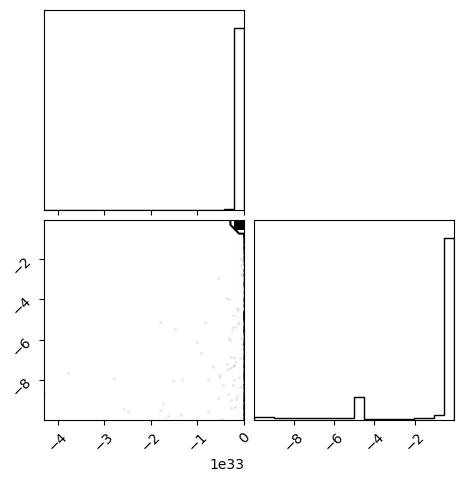

In [99]:
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)
print(flat_samples.shape)
fig = corner.corner(flat_samples)

In [100]:
np.median(samples[:,0]), np.median(samples[:,1]) #wants way too small mass?

(-18.034123710954244, -0.028106986670782895)

(array([2.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 5.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 4.0000e+00,
        1.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+01,
        0.0000e+00, 3.0000e+00, 3.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 2.0000e+00, 4.0000e+00, 2.0000e+00,
        2.0000e+00, 0.0000e+00, 9.0000e+00, 3.0000e+00, 0.0000e+00,
        0.0000e+00, 7.0000e+00, 2.0000e+00, 0.0000e+00, 6.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 3.0000e+00,
        1.0000e+00, 1.0000e+00, 6.0000e+00, 2.0000e+00, 6.0000e+00,
        4.0000e+00, 1.1000e+01, 1.3000e+01, 1.1000e+01, 7.0000e+00,
        5.0000e+00, 6.0000e+00, 8.0000e+00, 4.00

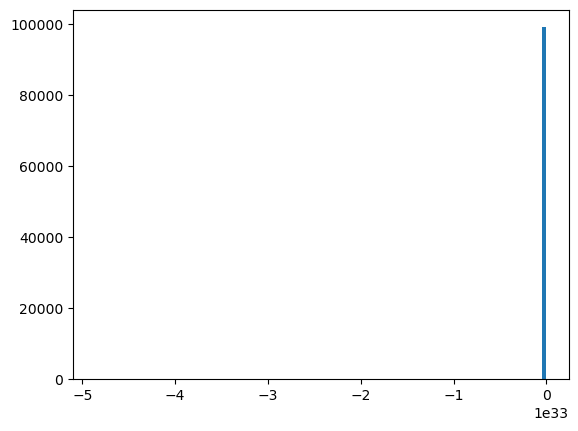

In [101]:
bins=100
plt.hist(samples[:,0], bins=bins)

(array([2.0800e+02, 2.2500e+02, 1.6300e+02, 2.0900e+02, 1.6400e+02,
        2.5700e+02, 2.2500e+02, 2.6300e+02, 2.2600e+02, 2.6000e+02,
        2.2400e+02, 1.7700e+02, 1.8800e+02, 1.9400e+02, 1.3900e+02,
        1.5300e+02, 1.3200e+02, 2.1300e+02, 1.2400e+02, 1.6500e+02,
        1.9900e+02, 1.9500e+02, 2.1000e+02, 1.9400e+02, 1.5600e+02,
        1.7900e+02, 1.7400e+02, 1.4300e+02, 1.4400e+02, 1.4100e+02,
        1.4000e+02, 1.3600e+02, 1.4700e+02, 1.2900e+02, 1.5400e+02,
        1.1700e+02, 1.2800e+02, 1.5500e+02, 1.7900e+02, 1.2300e+02,
        1.3400e+02, 1.1700e+02, 1.5300e+02, 1.3900e+02, 2.9200e+02,
        1.5100e+02, 1.2400e+02, 1.2700e+02, 1.8700e+02, 1.4100e+02,
        4.6000e+02, 1.2080e+03, 6.2270e+03, 1.6950e+03, 1.0400e+02,
        9.3000e+01, 8.4000e+01, 1.0100e+02, 7.7000e+01, 9.9000e+01,
        1.4000e+02, 8.5000e+01, 7.0000e+01, 7.9000e+01, 8.2000e+01,
        8.6000e+01, 1.0900e+02, 1.1400e+02, 1.3600e+02, 9.9000e+01,
        1.1000e+02, 7.1000e+01, 7.5000e+01, 6.50

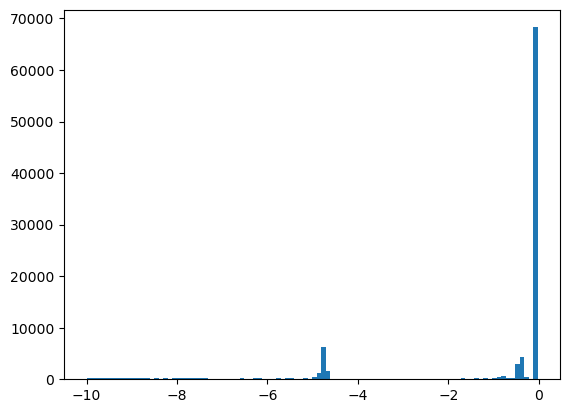

In [102]:
bins=100
plt.hist(samples[:,1], bins=bins)